## ***Librerías utilizadas***

### **Núcleo y utilidades**
**re:** limpieza de texto con expresiones regulares (normalización, patrones, filtros).  
**numpy (np):** operaciones numéricas y vectorizadas.  
**pandas (pd):** carga, manipulación y tabulación de datos.  
**copy.deepcopy:** clonado seguro de estructuras (evitar efectos colaterales en tuning/experimentos).  
**itertools.product:** generación de grids/cartesianos para búsqueda de hiperparámetros.  
**warnings / logging:** silenciar advertencias e integrar logs (p. ej. de transformers).  

### **Visualización**
**matplotlib.pyplot (plt):** gráficas (curvas PR/ROC, distribución de probabilidades, errores).  
**ConfusionMatrixDisplay:** visualización de matriz de confusión.  

### **NLP / Embeddings**
**sentence_transformers.SentenceTransformer:** generación de *embeddings* (p. ej. EMB_MODEL) a partir de texto de llamadas.  
**transformers.AutoTokenizer:** tokenizer asociado a modelos HF cuando se requiere tokenizar texto.  
**sklearn.feature_extraction.text.TfidfVectorizer:** alternativa clásica de features (TF-IDF) sobre texto.  

### **Modelos clásicos (scikit-learn)**
**sklearn.linear_model.LogisticRegression:** clasificador lineal baseline (rápido, interpretable).  
**sklearn.svm.LinearSVC:** SVM lineal eficiente en texto denso/TF-IDF.  
**sklearn.ensemble.RandomForestClassifier / ExtraTreesClassifier:** *ensembles* de árboles para no linealidades y variables mixtas.  
**sklearn.ensemble.StackingClassifier:** *stacking* de múltiples modelos (meta-aprendiz).  
**sklearn.calibration.CalibratedClassifierCV:** calibración de probabilidades (Platt/Isotonic) para umbrales fiables.  
**sklearn.pipeline.Pipeline, FeatureUnion:** encadenar *preprocessing* + modelo; combinar *features* heterogéneas.  

### **Modelos gradiente boosting externos**
**xgboost.XGBClassifier:** *gradient boosting* en árboles muy competitivo en tabular.  
**lightgbm.LGBMClassifier (opcional):** alternativa rápida y precisa; se intenta importar y, si falla, se omite.  

### **Métricas y evaluación**
**sklearn.metrics:**  
- **accuracy_score, precision_score, recall_score, f1_score:** métricas básicas y por clase.  
- **precision_recall_curve:** curva PR y selección de umbral por *precision/recall*.  
- **confusion_matrix, ConfusionMatrixDisplay:** conteos y visualización de errores.  
- **classification_report:** resumen por clase y macro/weighted.  

**sklearn.model_selection:**  
- **train_test_split:** partición (estratificada) *hold-out*.  
- **StratifiedKFold:** *CV* estratificada en clases desbalanceadas.  
- **cross_val_predict:** obtener predicciones *out-of-fold* para evaluación honesta.  

### **Preprocesamiento**
**sklearn.preprocessing.normalize:** normalización L1/L2 de vectores (p. ej. embeddings/TF-IDF).  

### **Imbalanced Learning (imblearn)**
**imblearn.pipeline.Pipeline (ImbPipeline):** *pipeline* compatible con *samplers*.  

**Sobremuestreo:**  
- **ADASYN:** sintetiza ejemplos cerca de fronteras complejas (foco en casos difíciles).  
- **SMOTE:** genera sintéticos por interpolación de la minoritaria.  
- **BorderlineSMOTE:** variante de SMOTE centrada en la frontera de decisión (más agresiva).  

**Submuestreo / Combinados:**  
- **TomekLinks:** limpia pares ambiguos (ruido/frontera).  
- **SMOTETomek:** SMOTE + limpieza Tomek (mejor separación).  
- **SMOTEENN:** SMOTE + ENN (edición más fuerte que Tomek).  

**Ensembles balanceados:**  
- **EasyEnsembleClassifier:** *bagging* con submuestreo de la mayoritaria (varios subconjuntos).  
- **BalancedBaggingClassifier:** *bagging* que rebalancea cada *bootstrap*.  
- **BalancedRandomForestClassifier:** RF con balanceo interno de clases.  
- **RUSBoostClassifier:** *AdaBoost* con *Random UnderSampling* en cada iteración (combina *reweighting* + submuestreo).  


In [1]:
# --- Config. básica ---
import warnings, logging, re
warnings.filterwarnings("ignore")

# --- Core ---
import numpy as np
import pandas as pd
from copy import deepcopy
from itertools import product

# --- Visualización ---
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# --- NLP / Embeddings ---
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer

# --- Features de texto (opcional) ---
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Modelado clásico (sklearn) ---
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import normalize

# --- Boosting externos ---
from xgboost import XGBClassifier
try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

# --- Métricas / evaluación ---
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, confusion_matrix, classification_report
)

# --- Imbalanced learning ---
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import (
    EasyEnsembleClassifier, BalancedBaggingClassifier,
    BalancedRandomForestClassifier, RUSBoostClassifier
)

# --- Modelo de embeddings  ---
EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
embedder = SentenceTransformer(EMB_MODEL)
tokenizer = AutoTokenizer.from_pretrained(EMB_MODEL)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bootcamp Llamadas Cobranza/Dataset/Transcripciones_Variables.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bootcamp Llamadas Cobranza/Dataset/Transcripciones_Variables_Adicionales.xlsx")

df2_filtrado = df2[df2["4.2 Explica medios de pago"] == 1]

# Pegar (concatenar) df con esas filas
df = pd.concat([df, df2_filtrado], ignore_index=True)

print(df.shape)
#print(df.tail())


(686, 10)


## Configuración inicial (variable a predecir)

In [5]:
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
CHUNK_TOKENS = 480
CHUNK_STRIDE = 64

### Pruebas enfocandose en la variable con más casos y la de menos casos (Target)

In [6]:
# ===============================================
# Embeddings + (ADASYN / RF / EasyEnsemble)
# Enfocado en maximizar RECALL de la clase NEGATIVA (label=0)
# ===============================================

# --- 0) Imports y Config ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

# === Config ===
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
CHUNK_TOKENS = 480
CHUNK_STRIDE = 64

# === Clase objetivo para maximizar recall ===
NEG_CLASS = 0
TARGET_RECALL_NEG = 0.90         # <<-- umbral deseado de recall para la clase elegida

# --- 1) Helpers de limpieza y embeddings con chunking seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
embedder = SentenceTransformer(EMB_MODEL)
embedder.max_seq_length = 510  # seguridad para ST
tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def embed_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE) -> np.ndarray:
    """Chunking con doble seguridad + mean-pooling + renormalización final."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc["input_ids"]
    if isinstance(ids[0], list):  # por si devuelve batch
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        # 1) cortar sin especiales
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

        # 2) re-tokenizar con especiales y truncación a 510
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        piece_safe = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)

        if piece_safe.strip():
            chunks.append(piece_safe)

        if j == len(ids): break
        i = max(j - stride, 0)

    if not chunks:
        chunks = [text]

    E = embedder.encode(chunks, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    em = E.mean(axis=0, keepdims=True)
    em = normalize(em, norm="l2").ravel()  # renormaliza el promedio
    return em

# --- 2) Funciones de evaluación/umbral centradas ---
def predict_with_threshold_for_class(y_score_label1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    """
    Aplica un umbral a la probabilidad de la clase target (target_class).
    Para target_class=0 usamos p0 = 1 - p1; para target_class=1 usamos p1.
    Retorna yhat en {0,1} (etiquetas originales).
    """
    if target_class == 1:
        p_target = y_score_label1
    else:
        p_target = 1.0 - y_score_label1
    yhat_target = (p_target >= thr).astype(int)
    # mapear: 1 -> target_class, 0 -> clase contraria
    return np.where(yhat_target == 1, target_class, 1 - target_class)

def best_threshold_max_f1_of_class(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int) -> float:
    """
    Busca el umbral que maximiza F1 para la 'target_class' (0 o 1).
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2 * prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
    k = f1.argmax()
    return float(thr[k])

def best_threshold_for_target_recall(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int, target_recall: float) -> float:
    """
    Busca un umbral que logre al menos 'target_recall' para la 'target_class'
    y, entre los que lo logran, maximiza la precisión.
    Si ninguno lo logra, elige el umbral que mayor recall consigue.
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)

    # candidatos con recall >= objetivo
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx) > 0:
        # elige el que tenga mayor precisión
        best_i = idx[np.argmax(prec[idx])]
        return float(thr[best_i])
    else:
        # no se alcanza el recall objetivo: elige el de mayor recall posible
        best_i = np.argmax(rec[:-1])
        return float(thr[best_i])

def evaluate(y_true: np.ndarray, y_pred: np.ndarray, title: str = ""):
    """Imprime matriz + métricas, con foco en NEG_CLASS y también reporte completo."""
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de confusión - {title}")
    plt.show()

    # Métricas tomando POS_LABEL=0 (negativa) y POS_LABEL=1 (estándar)
    for pos_lab in [NEG_CLASS, 1]:
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        tag = "NEGATIVA(0)" if pos_lab == 0 else "POSITIVA(1)"
        print(f"[pos={tag}]  Acc={acc:.4f} | Prec={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

    print("\nReporte detallado por clase:")
    print(classification_report(y_true, y_pred, digits=4))

## Modelo inicial

Distribución train: {0: 364, 1: 105}
Distribución test : {0: 91, 1: 27}

=== LogReg (class_weight=balanced) | thr=0.5 (target=neg) ===


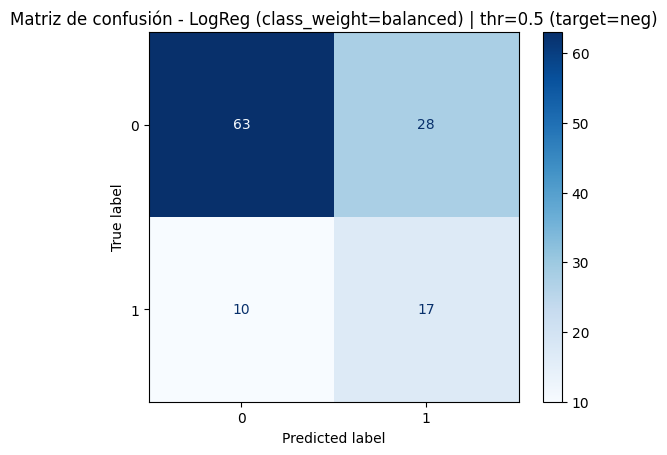

[pos=NEGATIVA(0)]  Acc=0.6780 | Prec=0.8630 | Recall=0.6923 | F1=0.7683
[pos=POSITIVA(1)]  Acc=0.6780 | Prec=0.3778 | Recall=0.6296 | F1=0.4722

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8630    0.6923    0.7683        91
           1     0.3778    0.6296    0.4722        27

    accuracy                         0.6780       118
   macro avg     0.6204    0.6610    0.6203       118
weighted avg     0.7520    0.6780    0.7005       118


=== LogReg (class_weight=balanced) | thr=F1_neg=0.355 ===


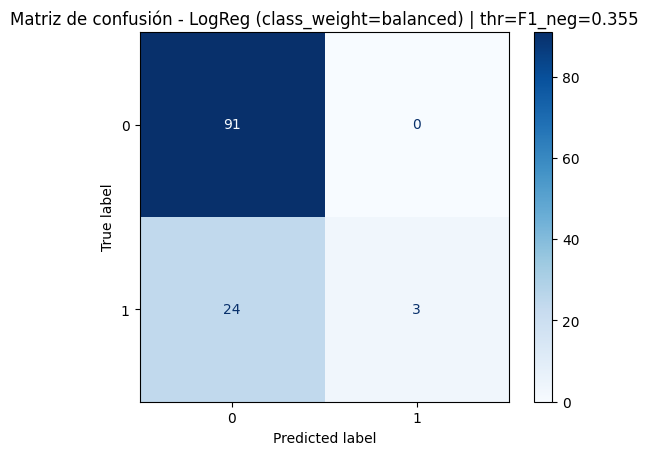

[pos=NEGATIVA(0)]  Acc=0.7966 | Prec=0.7913 | Recall=1.0000 | F1=0.8835
[pos=POSITIVA(1)]  Acc=0.7966 | Prec=1.0000 | Recall=0.1111 | F1=0.2000

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7913    1.0000    0.8835        91
           1     1.0000    0.1111    0.2000        27

    accuracy                         0.7966       118
   macro avg     0.8957    0.5556    0.5417       118
weighted avg     0.8391    0.7966    0.7271       118


=== LogReg (class_weight=balanced) | thr=RecallNeg≥0.90 -> 0.433 ===


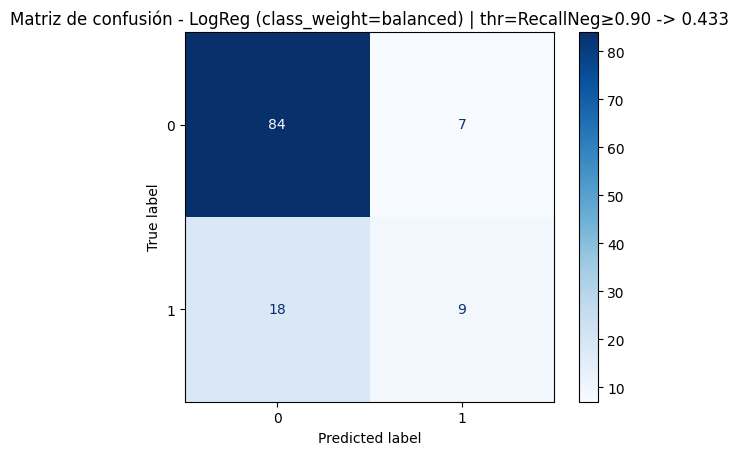

[pos=NEGATIVA(0)]  Acc=0.7881 | Prec=0.8235 | Recall=0.9231 | F1=0.8705
[pos=POSITIVA(1)]  Acc=0.7881 | Prec=0.5625 | Recall=0.3333 | F1=0.4186

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8235    0.9231    0.8705        91
           1     0.5625    0.3333    0.4186        27

    accuracy                         0.7881       118
   macro avg     0.6930    0.6282    0.6445       118
weighted avg     0.7638    0.7881    0.7671       118


=== LogReg + ADASYN | thr=0.5 (target=neg) ===


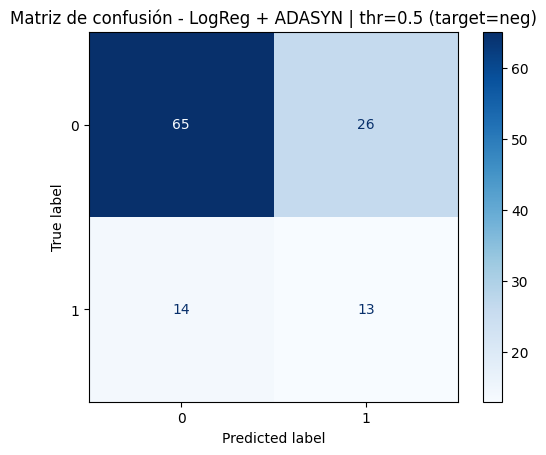

[pos=NEGATIVA(0)]  Acc=0.6610 | Prec=0.8228 | Recall=0.7143 | F1=0.7647
[pos=POSITIVA(1)]  Acc=0.6610 | Prec=0.3333 | Recall=0.4815 | F1=0.3939

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8228    0.7143    0.7647        91
           1     0.3333    0.4815    0.3939        27

    accuracy                         0.6610       118
   macro avg     0.5781    0.5979    0.5793       118
weighted avg     0.7108    0.6610    0.6799       118


=== LogReg + ADASYN | thr=F1_neg=0.341 ===


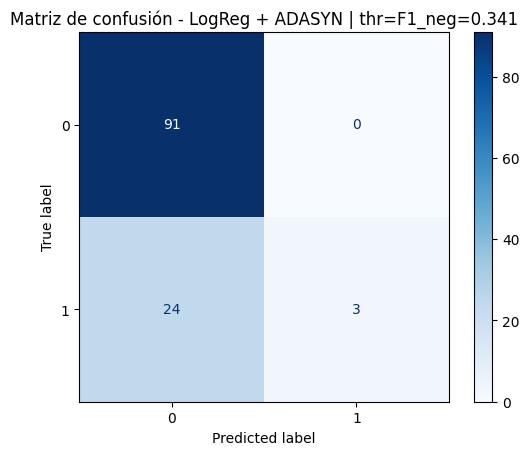

[pos=NEGATIVA(0)]  Acc=0.7966 | Prec=0.7913 | Recall=1.0000 | F1=0.8835
[pos=POSITIVA(1)]  Acc=0.7966 | Prec=1.0000 | Recall=0.1111 | F1=0.2000

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7913    1.0000    0.8835        91
           1     1.0000    0.1111    0.2000        27

    accuracy                         0.7966       118
   macro avg     0.8957    0.5556    0.5417       118
weighted avg     0.8391    0.7966    0.7271       118


=== LogReg + ADASYN | thr=RecallNeg≥0.90 -> 0.370 ===


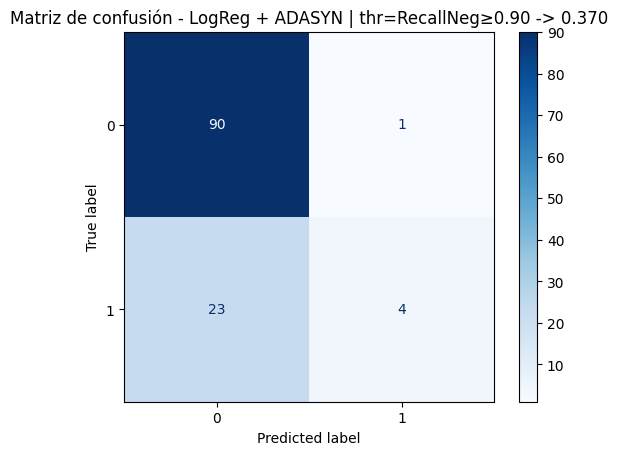

[pos=NEGATIVA(0)]  Acc=0.7966 | Prec=0.7965 | Recall=0.9890 | F1=0.8824
[pos=POSITIVA(1)]  Acc=0.7966 | Prec=0.8000 | Recall=0.1481 | F1=0.2500

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7965    0.9890    0.8824        91
           1     0.8000    0.1481    0.2500        27

    accuracy                         0.7966       118
   macro avg     0.7982    0.5686    0.5662       118
weighted avg     0.7973    0.7966    0.7377       118


=== RandomForest (balanced_subsample) | thr=0.5 (target=neg) ===


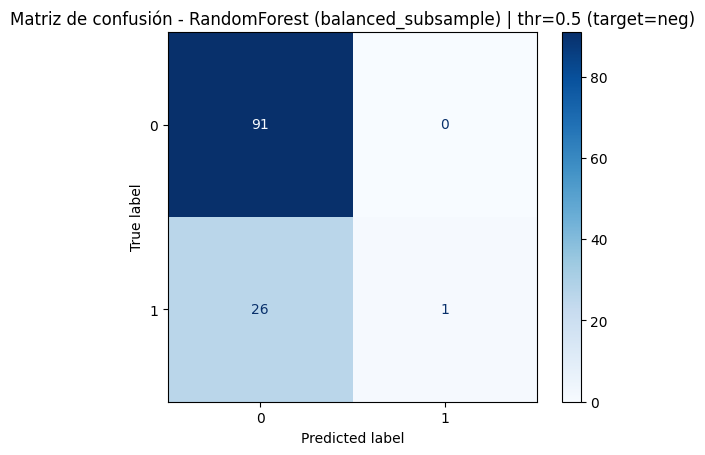

[pos=NEGATIVA(0)]  Acc=0.7797 | Prec=0.7778 | Recall=1.0000 | F1=0.8750
[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118


=== RandomForest (balanced_subsample) | thr=F1_neg=0.535 ===


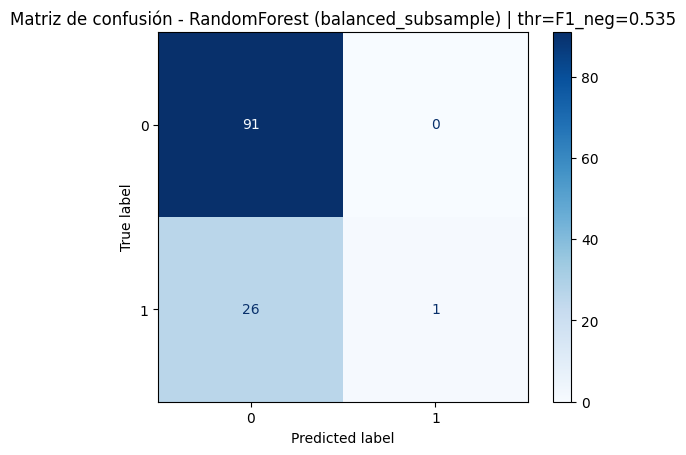

[pos=NEGATIVA(0)]  Acc=0.7797 | Prec=0.7778 | Recall=1.0000 | F1=0.8750
[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118


=== RandomForest (balanced_subsample) | thr=RecallNeg≥0.90 -> 0.670 ===


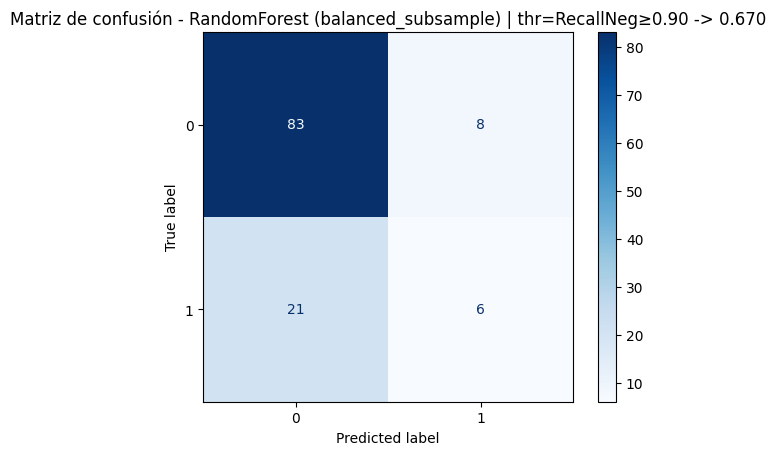

[pos=NEGATIVA(0)]  Acc=0.7542 | Prec=0.7981 | Recall=0.9121 | F1=0.8513
[pos=POSITIVA(1)]  Acc=0.7542 | Prec=0.4286 | Recall=0.2222 | F1=0.2927

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7981    0.9121    0.8513        91
           1     0.4286    0.2222    0.2927        27

    accuracy                         0.7542       118
   macro avg     0.6133    0.5672    0.5720       118
weighted avg     0.7135    0.7542    0.7235       118


=== RandomForest + ADASYN | thr=0.5 (target=neg) ===


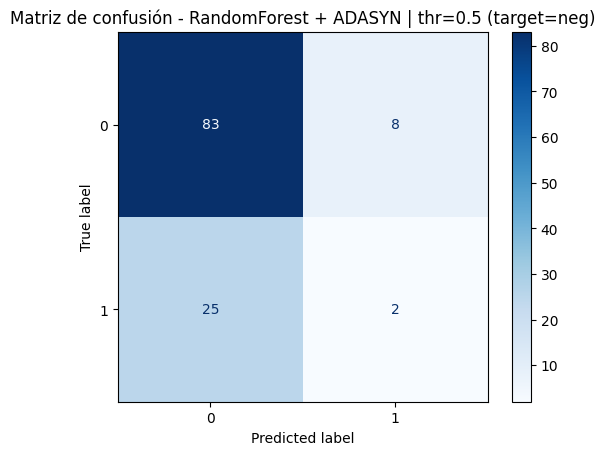

[pos=NEGATIVA(0)]  Acc=0.7203 | Prec=0.7685 | Recall=0.9121 | F1=0.8342
[pos=POSITIVA(1)]  Acc=0.7203 | Prec=0.2000 | Recall=0.0741 | F1=0.1081

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7685    0.9121    0.8342        91
           1     0.2000    0.0741    0.1081        27

    accuracy                         0.7203       118
   macro avg     0.4843    0.4931    0.4711       118
weighted avg     0.6384    0.7203    0.6680       118


=== RandomForest + ADASYN | thr=F1_neg=0.360 ===


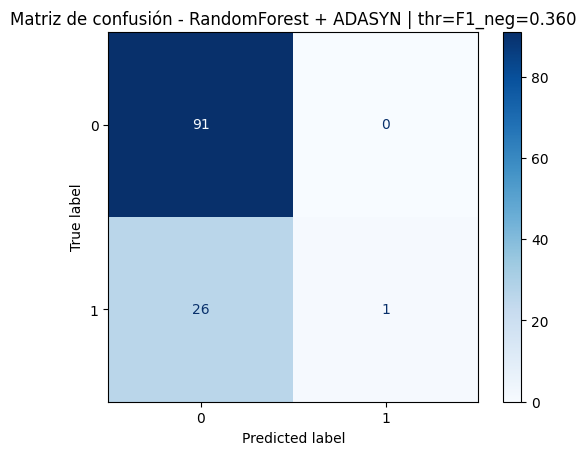

[pos=NEGATIVA(0)]  Acc=0.7797 | Prec=0.7778 | Recall=1.0000 | F1=0.8750
[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118


=== RandomForest + ADASYN | thr=RecallNeg≥0.90 -> 0.360 ===


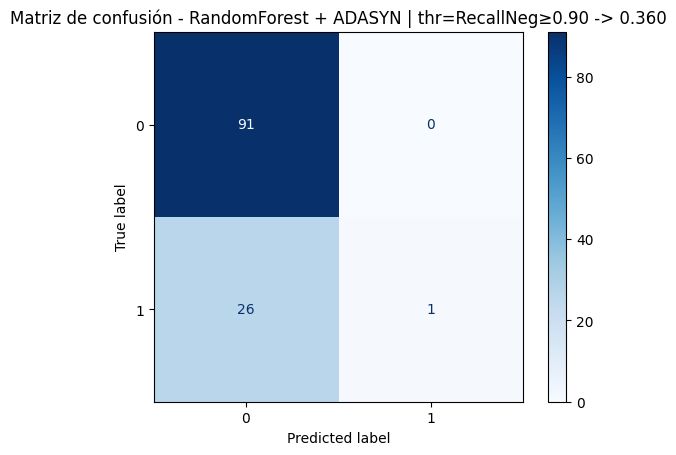

[pos=NEGATIVA(0)]  Acc=0.7797 | Prec=0.7778 | Recall=1.0000 | F1=0.8750
[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118


=== EasyEnsembleClassifier | thr=0.5 (target=neg) ===


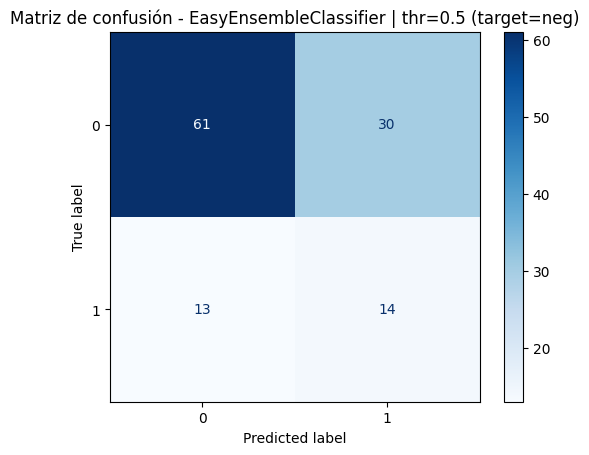

[pos=NEGATIVA(0)]  Acc=0.6356 | Prec=0.8243 | Recall=0.6703 | F1=0.7394
[pos=POSITIVA(1)]  Acc=0.6356 | Prec=0.3182 | Recall=0.5185 | F1=0.3944

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8243    0.6703    0.7394        91
           1     0.3182    0.5185    0.3944        27

    accuracy                         0.6356       118
   macro avg     0.5713    0.5944    0.5669       118
weighted avg     0.7085    0.6356    0.6604       118


=== EasyEnsembleClassifier | thr=F1_neg=0.429 ===


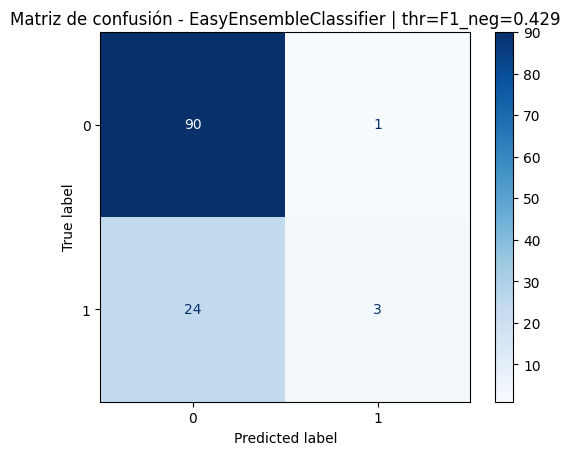

[pos=NEGATIVA(0)]  Acc=0.7881 | Prec=0.7895 | Recall=0.9890 | F1=0.8780
[pos=POSITIVA(1)]  Acc=0.7881 | Prec=0.7500 | Recall=0.1111 | F1=0.1935

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7895    0.9890    0.8780        91
           1     0.7500    0.1111    0.1935        27

    accuracy                         0.7881       118
   macro avg     0.7697    0.5501    0.5358       118
weighted avg     0.7804    0.7881    0.7214       118


=== EasyEnsembleClassifier | thr=RecallNeg≥0.90 -> 0.466 ===


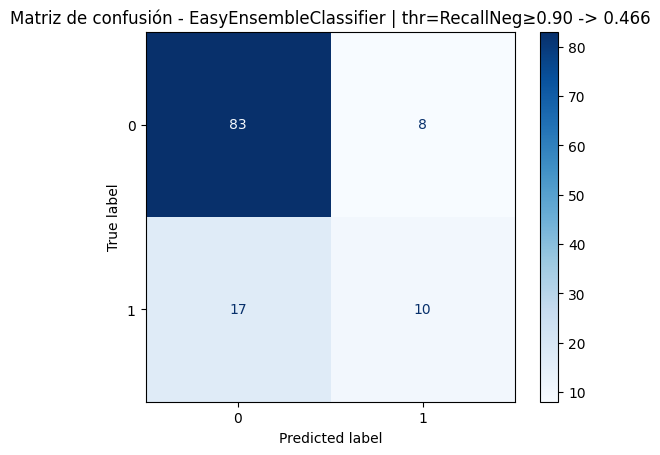

[pos=NEGATIVA(0)]  Acc=0.7881 | Prec=0.8300 | Recall=0.9121 | F1=0.8691
[pos=POSITIVA(1)]  Acc=0.7881 | Prec=0.5556 | Recall=0.3704 | F1=0.4444

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8300    0.9121    0.8691        91
           1     0.5556    0.3704    0.4444        27

    accuracy                         0.7881       118
   macro avg     0.6928    0.6412    0.6568       118
weighted avg     0.7672    0.7881    0.7719       118


=== Resumen (pos_label=NEG_CLASS) ===


,modelo,thr_0.5,acc_0.5,prec_0.5,rec_0.5,f1_0.5,thr_f1neg,acc_f1neg,prec_f1neg,rec_f1neg,f1_f1neg,thr_rec90,acc_rec90,prec_rec90,rec_rec90,f1_rec90
0,LogReg + ADASYN,0.5,0.661017,0.822785,0.714286,0.764706,0.341019,0.796610,0.791304,1.000000,0.883495,0.370262,0.796610,0.796460,0.989011,0.882353
1,RandomForest + ADASYN,0.5,0.720339,0.768519,0.912088,0.834171,0.360000,0.779661,0.777778,1.000000,0.875000,0.360000,0.779661,0.777778,1.000000,0.875000
2,LogReg (class_weight=balanced),0.5,0.677966,0.863014,0.692308,0.768293,0.355296,0.796610,0.791304,1.000000,0.883495,0.433177,0.788136,0.823529,0.923077,0.870466
3,EasyEnsembleClassifier,0.5,0.635593,0.824324,0.670330,0.739394,0.429497,0.788136,0.789474,0.989011,0.878049,0.466465,0.788136,0.830000,0.912088,0.869110
4,RandomForest (balanced_subsample),0.5,0.779661,0.777778,1.000000,0.875000,0.535000,0.779661,0.777778,1.000000,0.875000,0.670000,0.754237,0.798077,0.912088,0.851282


In [18]:
# ===============================================
# Embeddings + (ADASYN / RF / EasyEnsemble)
# Enfocado en maximizar RECALL de la clase NEGATIVA (label=0)
# ===============================================

# --- 0) Imports y Config ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

# === Config ===
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
CHUNK_TOKENS = 480
CHUNK_STRIDE = 64

# === Clase objetivo para maximizar recall ===
NEG_CLASS = 0
TARGET_RECALL_NEG = 0.90         # <<-- umbral deseado de recall para la clase

# --- 1) Helpers de limpieza y embeddings con chunking seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
embedder = SentenceTransformer(EMB_MODEL)
embedder.max_seq_length = 510  # seguridad para ST
tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def embed_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE) -> np.ndarray:
    """Chunking con doble seguridad + mean-pooling + renormalización final."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc["input_ids"]
    if isinstance(ids[0], list):  # por si devuelve batch
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        # 1) cortar sin especiales
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

        # 2) re-tokenizar con especiales y truncación a 510
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        piece_safe = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)

        if piece_safe.strip():
            chunks.append(piece_safe)

        if j == len(ids): break
        i = max(j - stride, 0)

    if not chunks:
        chunks = [text]

    E = embedder.encode(chunks, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    em = E.mean(axis=0, keepdims=True)
    em = normalize(em, norm="l2").ravel()  # renormaliza el promedio
    return em

# --- 2) Funciones de evaluación/umbral centradas ---
def predict_with_threshold_for_class(y_score_label1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    """
    Aplica un umbral a la probabilidad de la clase target (target_class).
    Para target_class=0 usamos p0 = 1 - p1; para target_class=1 usamos p1.
    Retorna yhat en {0,1} (etiquetas originales).
    """
    if target_class == 1:
        p_target = y_score_label1
    else:
        p_target = 1.0 - y_score_label1
    yhat_target = (p_target >= thr).astype(int)
    # mapear: 1 -> target_class, 0 -> clase contraria
    return np.where(yhat_target == 1, target_class, 1 - target_class)

def best_threshold_max_f1_of_class(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int) -> float:
    """
    Busca el umbral que maximiza F1 para la 'target_class' (0 o 1).
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2 * prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
    k = f1.argmax()
    return float(thr[k])

def best_threshold_for_target_recall(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int, target_recall: float) -> float:
    """
    Busca un umbral que logre al menos 'target_recall' para la 'target_class'
    y, entre los que lo logran, maximiza la precisión.
    Si ninguno lo logra, elige el umbral que mayor recall consigue.
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)

    # candidatos con recall >= objetivo
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx) > 0:
        # elige el que tenga mayor precisión
        best_i = idx[np.argmax(prec[idx])]
        return float(thr[best_i])
    else:
        # no se alcanza el recall objetivo: elige el de mayor recall posible
        best_i = np.argmax(rec[:-1])
        return float(thr[best_i])

def evaluate(y_true: np.ndarray, y_pred: np.ndarray, title: str = ""):
    """Imprime matriz + métricas, con foco en la clase y también reporte completo."""
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de confusión - {title}")
    plt.show()

    # Métricas tomando POS_LABEL=0 (negativa) y POS_LABEL=1 (estándar)
    for pos_lab in [NEG_CLASS, 1]:
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        tag = "NEGATIVA(0)" if pos_lab == 0 else "POSITIVA(1)"
        print(f"[pos={tag}]  Acc={acc:.4f} | Prec={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

    print("\nReporte detallado por clase:")
    print(classification_report(y_true, y_pred, digits=4))

# --- 3) Cargar/limpiar datos, split estratificado ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr = train[TARGET].values
y_te = test[TARGET].values
print("Distribución train:", pd.Series(y_tr).value_counts().sort_index().to_dict())
print("Distribución test :", pd.Series(y_te).value_counts().sort_index().to_dict())

# --- 4) Embeddings (chunking seguro) ---
X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# --- 5) Experimentos ---
resultados = []

def run_and_record(name, clf, Xtr, ytr, Xval, yval, tune_mode="f1_neg"):
    """
    Entrena clf, obtiene proba de clase 1, y evalúa:
    - thr=0.5
    - thr que maximiza F1 de la NEG_CLASS
    - thr para alcanzar TARGET_RECALL_NEG
    Retorna una fila de resultados y muestra matrices.
    """
    clf.fit(Xtr, ytr)
    if hasattr(clf, "predict_proba"):
        p1 = clf.predict_proba(Xval)[:,1]
    else:
        # fallback para modelos sin predict_proba: usar decision_function -> minmax a [0,1]
        if hasattr(clf, "decision_function"):
            s = clf.decision_function(Xval)
            s = (s - s.min()) / (s.max() - s.min() + 1e-12)
            p1 = s
        else:
            # sin scores: usamos predicción directa (no recomendable)
            yhat = clf.predict(Xval)
            p1 = (yhat == 1).astype(float)

    # 0) Umbral 0.5 tomando NEG_CLASS como target al evaluar
    yhat_05 = predict_with_threshold_for_class(p1, thr=0.5, target_class=NEG_CLASS)
    evaluate(yval, yhat_05, title=f"{name} | thr=0.5 (target=neg)")

    # 1) Umbral que maximiza F1 de la negativa
    thr_f1neg = best_threshold_max_f1_of_class(yval, p1, target_class=NEG_CLASS)
    yhat_f1neg = predict_with_threshold_for_class(p1, thr=thr_f1neg, target_class=NEG_CLASS)
    evaluate(yval, yhat_f1neg, title=f"{name} | thr=F1_neg={thr_f1neg:.3f}")

    # 2) Umbral para alcanzar recall objetivo de la negativa
    thr_recneg = best_threshold_for_target_recall(yval, p1, target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG)
    yhat_recneg = predict_with_threshold_for_class(p1, thr=thr_recneg, target_class=NEG_CLASS)
    evaluate(yval, yhat_recneg, title=f"{name} | thr=RecallNeg≥{TARGET_RECALL_NEG:.2f} -> {thr_recneg:.3f}")

    # Métricas resumidas (con pos_label=NEG_CLASS) para tabla
    def metrics(ytrue, ypred):
        return dict(
            acc=accuracy_score(ytrue, ypred),
            prec=precision_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
            rec=recall_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
            f1=f1_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
        )

    m05   = metrics(yval, yhat_05)
    mf1   = metrics(yval, yhat_f1neg)
    mr90  = metrics(yval, yhat_recneg)

    resultados.append({
        "modelo": name,
        "thr_0.5": 0.5, **{f"{k}_0.5": v for k,v in m05.items()},
        "thr_f1neg": thr_f1neg, **{f"{k}_f1neg": v for k,v in mf1.items()},
        f"thr_rec{int(TARGET_RECALL_NEG*100)}": thr_recneg, **{f"{k}_rec{int(TARGET_RECALL_NEG*100)}": v for k,v in mr90.items()},
    })

# --- 5.1) Baseline: LogReg con pesos (sin oversampling) ---
logreg_bal = LogisticRegression(max_iter=2000, solver="lbfgs", class_weight="balanced", random_state=SEED)
run_and_record("LogReg (class_weight=balanced)", logreg_bal, X_tr, y_tr, X_te, y_te)

# --- 5.2) LogReg + ADASYN (oversampling minoritaria) ---
adasyn = ADASYN(random_state=SEED, n_neighbors=3)  # n_neighbors pequeño por dataset
Xtr_ad, ytr_ad = adasyn.fit_resample(X_tr, y_tr)
logreg_adasyn = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=SEED)
run_and_record("LogReg + ADASYN", logreg_adasyn, Xtr_ad, ytr_ad, X_te, y_te)

# --- 5.3) RandomForest (ponderación) ---
rf_bal = RandomForestClassifier(
    n_estimators=400, max_depth=None, n_jobs=-1,
    class_weight="balanced_subsample", random_state=SEED
)
run_and_record("RandomForest (balanced_subsample)", rf_bal, X_tr, y_tr, X_te, y_te)

# --- 5.4) RandomForest + ADASYN ---
rf_adasyn = RandomForestClassifier(
    n_estimators=400, max_depth=None, n_jobs=-1,
    random_state=SEED
)
run_and_record("RandomForest + ADASYN", rf_adasyn, Xtr_ad, ytr_ad, X_te, y_te)

# --- 5.5) EasyEnsemble (submuestreo mayoritaria + boosting por bolsa) ---
# Nota: EasyEnsembleClassifier ya balancea internamente (no uses class_weight ni ADASYN aquí)
eec = EasyEnsembleClassifier(
    n_estimators=10,   # número de bolsas balanceadas
    random_state=SEED
)
run_and_record("EasyEnsembleClassifier", eec, X_tr, y_tr, X_te, y_te)

# (Opcional) BalancedRandomForestClassifier:
# from imblearn.ensemble import BalancedRandomForestClassifier
# brf = BalancedRandomForestClassifier(n_estimators=400, random_state=SEED, n_jobs=-1)
# run_and_record("BalancedRandomForest", brf, X_tr, y_tr, X_te, y_te)

# --- 6) Tabla comparativa ---
df_res = pd.DataFrame(resultados)

# Ordena por el escenario de recall objetivo (o por F1_neg, como prefieras)
rec_pct = int(TARGET_RECALL_NEG * 100)   # p.ej. 80
# Las columnas generadas son acc_rec80, prec_rec80, rec_rec80, f1_rec80 (SIN guion bajo final)
sort_col = f"f1_rec{rec_pct}"

if sort_col not in df_res.columns:
    # fallback: ordena por F1 de la clase negativa (max F1_neg)
    sort_col = "f1_f1neg" if "f1_f1neg" in df_res.columns else None

if sort_col is not None:
    df_res.sort_values(by=sort_col, ascending=False, inplace=True, ignore_index=True)
else:
    # si por alguna razón no están esas columnas, no ordenamos
    pass

print("\n=== Resumen (pos_label=NEG_CLASS) ===")
display(df_res)



Distribución train: {0: 364, 1: 105}
Distribución test : {0: 91, 1: 27}

>>> Evaluando: RF_balanced


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.784580,0.025280,0.818950,0.020919,0.928501,0.026814,0.869931,0.015309,0.599932
1,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.784580,0.025280,0.818950,0.020919,0.928501,0.026814,0.869931,0.015309,0.599932
2,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.776115,0.017827,0.812879,0.020579,0.925761,0.022525,0.865237,0.009774,0.658000
3,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.776115,0.017827,0.812879,0.020579,0.925761,0.022525,0.865237,0.009774,0.658000
4,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.795241,0.026984,0.832103,0.022602,0.923059,0.014067,0.875072,0.015640,0.610019
5,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.795241,0.026984,0.832103,0.022602,0.923059,0.014067,0.875072,0.015640,0.610019
6,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.784603,0.024117,0.824306,0.029436,0.920358,0.010053,0.869243,0.012113,0.681000
7,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.784603,0.024117,0.824306,0.029436,0.920358,0.010053,0.869243,0.012113,0.681002
8,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.790986,0.021478,0.829966,0.022802,0.920282,0.020356,0.872429,0.012326,0.618508
9,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.790986,0.021478,0.829966,0.022802,0.920282,0.020356,0.872429,0.012326,0.618508



>>> Evaluando: ADASYN+RF


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.793159,0.031377,0.810422,0.035933,0.961606,0.036114,0.878453,0.017320,0.484000
1,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.793159,0.031377,0.810422,0.035933,0.961606,0.036114,0.878453,0.017320,0.483340
2,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.808076,0.024464,0.824798,0.030912,0.958904,0.033555,0.885880,0.013648,0.520087
3,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.808076,0.024464,0.824798,0.030912,0.958904,0.033555,0.885880,0.013648,0.520087
4,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.786776,0.035614,0.811214,0.041556,0.950685,0.041187,0.873977,0.019919,0.450066
5,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.786754,0.018112,0.810342,0.030425,0.950609,0.035252,0.873793,0.009148,0.467017
6,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.786754,0.018112,0.810342,0.030425,0.950609,0.035252,0.873793,0.009148,0.467239
7,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.782453,0.038219,0.805507,0.029070,0.950495,0.033216,0.871528,0.022574,0.499000
8,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.782453,0.038219,0.805507,0.029070,0.950495,0.033216,0.871528,0.022574,0.499333
9,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.784649,0.031826,0.810926,0.040987,0.947945,0.043664,0.872488,0.017664,0.452000



>>> Evaluando: EasyEnsemble


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,EasyEnsemble,{'n_estimators': 5},0.788858,0.025123,0.816649,0.019029,0.939460,0.024284,0.873500,0.015126,0.439636
1,EasyEnsemble,{'n_estimators': 10},0.782498,0.023069,0.821238,0.016715,0.920358,0.013271,0.867916,0.013591,0.443727
2,EasyEnsemble,{'n_estimators': 20},0.788881,0.020946,0.829108,0.018148,0.917580,0.012261,0.870978,0.012075,0.450541



=== Top 15 combinaciones (todas las familias) ===


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean,familia
0,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.784580,0.025280,0.818950,0.020919,0.928501,0.026814,0.869931,0.015309,0.599932,RF_balanced
1,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.784580,0.025280,0.818950,0.020919,0.928501,0.026814,0.869931,0.015309,0.599932,RF_balanced
2,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.776115,0.017827,0.812879,0.020579,0.925761,0.022525,0.865237,0.009774,0.658000,RF_balanced
3,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.776115,0.017827,0.812879,0.020579,0.925761,0.022525,0.865237,0.009774,0.658000,RF_balanced
4,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.795241,0.026984,0.832103,0.022602,0.923059,0.014067,0.875072,0.015640,0.610019,RF_balanced
5,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.795241,0.026984,0.832103,0.022602,0.923059,0.014067,0.875072,0.015640,0.610019,RF_balanced
6,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.784603,0.024117,0.824306,0.029436,0.920358,0.010053,0.869243,0.012113,0.681000,RF_balanced
7,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.784603,0.024117,0.824306,0.029436,0.920358,0.010053,0.869243,0.012113,0.681002,RF_balanced
8,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.790986,0.021478,0.829966,0.022802,0.920282,0.020356,0.872429,0.012326,0.618508,RF_balanced
9,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.790986,0.021478,0.829966,0.022802,0.920282,0.020356,0.872429,0.012326,0.618508,RF_balanced



Mejor combinación global:
 - Modelo: RF_balanced
 - Params: {'clf__n_estimators': 300, 'clf__max_depth': None, 'clf__min_samples_leaf': 3, 'clf__max_features': 'sqrt'}
 - thr_promedio_CV: 0.600

=== Evaluación en TEST (umbral = thr_promedio_CV) ===


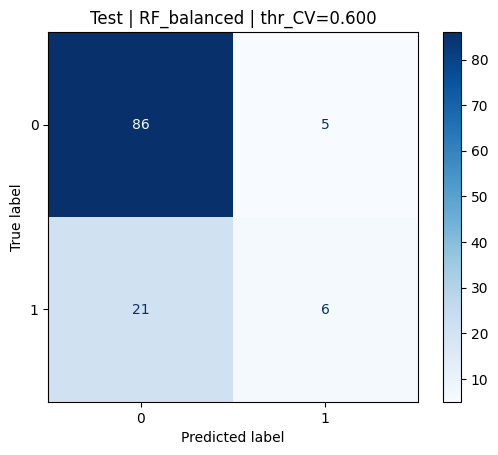

[pos=NEGATIVA(0)] Acc=0.7797 | Prec=0.8037 | Rec=0.9451 | F1=0.8687
[pos=POSITIVA(1)] Acc=0.7797 | Prec=0.5455 | Rec=0.2222 | F1=0.3158

Reporte detallado:
              precision    recall  f1-score   support

           0     0.8037    0.9451    0.8687        91
           1     0.5455    0.2222    0.3158        27

    accuracy                         0.7797       118
   macro avg     0.6746    0.5836    0.5922       118
weighted avg     0.7446    0.7797    0.7422       118


=== Evaluación en TEST (umbral recalculado para alcanzar recall_neg ≥ 0.90) ===


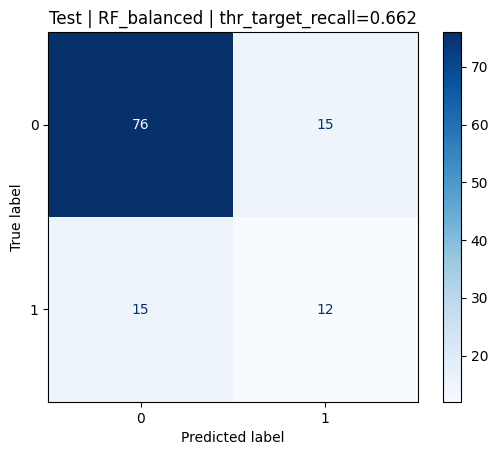

[pos=NEGATIVA(0)] Acc=0.7458 | Prec=0.8352 | Rec=0.8352 | F1=0.8352
[pos=POSITIVA(1)] Acc=0.7458 | Prec=0.4444 | Rec=0.4444 | F1=0.4444

Reporte detallado:
              precision    recall  f1-score   support

           0     0.8352    0.8352    0.8352        91
           1     0.4444    0.4444    0.4444        27

    accuracy                         0.7458       118
   macro avg     0.6398    0.6398    0.6398       118
weighted avg     0.7458    0.7458    0.7458       118



In [21]:
# ============================================================
# Evaluación de parámetros (ADASYN + RF, RF balanceado, EasyEnsemble)
# Objetivo: Maximizar RECALL de la clase NEGATIVA
# - CV estratificada
# - Umbral para lograr un recall objetivo y maximizar precisión
# - Selección por "precision_neg @ recall_neg >= TARGET_RECALL_NEG"
# ============================================================

# --- 0) Imports y Config ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from copy import deepcopy
from itertools import product

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve
)
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

# === Config del experimento ===
NEG_CLASS = 0                    # clase de interés
TARGET_RECALL_NEG = 0.90         # objetivo de recall para la clase de interés
CV_FOLDS = 5

# --- 1) Helpers de limpieza y embeddings con chunking seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
embedder = SentenceTransformer(EMB_MODEL)
embedder.max_seq_length = 510  # seguridad
tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def embed_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE) -> np.ndarray:
    """Chunking con doble seguridad + mean-pooling + renormalización final."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc["input_ids"]
    if len(ids) == 0:
        return np.zeros(embedder.get_sentence_embedding_dimension(), dtype=np.float32)
    if isinstance(ids[0], list):
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        safe_txt = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)
        if safe_txt.strip():
            chunks.append(safe_txt)
        if j == len(ids): break
        i = max(j - stride, 0)

    if not chunks:
        chunks = [text]

    E = embedder.encode(chunks, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    em = E.mean(axis=0, keepdims=True)
    em = normalize(em, norm="l2").ravel()
    return em

# --- 2) Umbrales centrados en NEG_CLASS ---
def predict_with_threshold_for_class(p1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    """p1 = P(label=1). Para target_class=0 se usa p0 = 1-p1; para 1, p1."""
    p_target = p1 if target_class == 1 else (1.0 - p1)
    yhat_target = (p_target >= thr).astype(int)
    return np.where(yhat_target == 1, target_class, 1 - target_class)

def best_threshold_for_target_recall(y_true: np.ndarray, p1: np.ndarray, target_class: int, target_recall: float) -> float:
    """
    Umbral que logra >= target_recall para 'target_class' y, entre esos, la mayor precisión.
    Si no se alcanza, devuelve el umbral con mayor recall posible.
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = p1 if target_class == 1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx) > 0:
        best_i = idx[np.argmax(prec[idx])]
        return float(thr[best_i])
    else:
        best_i = np.argmax(rec[:-1])
        return float(thr[best_i])

def fold_metrics(y_true: np.ndarray, y_pred: np.ndarray, pos_label: int) -> dict:
    return dict(
        acc  = accuracy_score(y_true, y_pred),
        prec = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        rec  = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        f1   = f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
    )

# --- 3) Datos (split estratificado) ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa los nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr = train[TARGET].values
y_te = test[TARGET].values
print("Distribución train:", pd.Series(y_tr).value_counts().sort_index().to_dict())
print("Distribución test :", pd.Series(y_te).value_counts().sort_index().to_dict())

# --- 4) Embeddings una sola vez (cacheable) ---
X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# --- 5) Definición de modelos y grids ---
experimentos = []

# 5.1) RandomForest balanceado (sin sampler) - pondera clases internamente
rf_bal = ImbPipeline(steps=[
    ("clf", RandomForestClassifier(class_weight="balanced_subsample", random_state=SEED, n_jobs=-1))
])
grid_rf_bal = {
    "clf__n_estimators":   [300, 600],
    "clf__max_depth":      [None, 20],
    "clf__min_samples_leaf":[1, 3],
    "clf__max_features":   ["sqrt", "log2"],
}
experimentos.append(("RF_balanced", rf_bal, grid_rf_bal))

# 5.2) ADASYN + RandomForest
rf_adasyn = ImbPipeline(steps=[
    ("sampler", ADASYN(random_state=SEED)),
    ("clf", RandomForestClassifier(random_state=SEED, n_jobs=-1))
])
grid_rf_adasyn = {
    "sampler__n_neighbors":       [3, 5],
    "sampler__sampling_strategy": [0.5, 1.0],  # 0.5 => minoritaria = 0.5 * mayoritaria; 1.0 => balance total
    "clf__n_estimators":          [300, 600],
    "clf__max_depth":             [None, 20],
    "clf__min_samples_leaf":      [1, 3],
    "clf__max_features":          ["sqrt"],
}
experimentos.append(("ADASYN+RF", rf_adasyn, grid_rf_adasyn))

# 5.3) EasyEnsemble (ensamble de AdaBoost sobre subconjuntos balanceados)
eec = EasyEnsembleClassifier(random_state=SEED)
grid_eec = {
    "n_estimators": [5, 10, 20],  # # de bolsas balanceadas
    # "sampling_strategy": [1.0], # opcional, default 1.0 (balance total)
}
experimentos.append(("EasyEnsemble", eec, grid_eec))

# --- 6) Cross-Validation con ajuste de umbral por fold ---
def cv_eval_model(name, base_estimator, param_grid, X, y, cv_folds=CV_FOLDS):
    """
    Para cada combinación de hiperparámetros:
      - CV estratificada
      - Obtiene p1 en cada fold
      - Calcula umbral para lograr TARGET_RECALL_NEG y maximizar precisión_neg
      - Mide métricas con pos_label=NEG_CLASS
    Retorna un DataFrame con promedios y desvíos.
    """
    if isinstance(param_grid, dict):
        keys, values = zip(*param_grid.items()) if len(param_grid)>0 else ([], [])
        combos = [dict(zip(keys, v)) for v in product(*values)] if keys else [{}]
    else:
        raise ValueError("param_grid debe ser dict")

    results = []
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=SEED)

    for params in combos:
        est = deepcopy(base_estimator)
        # set_params soporta pipelines y estimadores simples
        est.set_params(**params)

        folds_prec, folds_rec, folds_f1, folds_acc, folds_thr = [], [], [], [], []

        for tr_idx, va_idx in skf.split(X, y):
            Xtr, Xva = X[tr_idx], X[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]

            # Entrena (si es pipeline con sampler, el resample se hace solo dentro del fit)
            est.fit(Xtr, ytr)

            # Prob de la etiqueta 1
            if hasattr(est, "predict_proba"):
                p1 = est.predict_proba(Xva)[:, 1]
            else:
                # fallback: decision_function -> escala a [0,1]
                s = est.decision_function(Xva)
                p1 = (s - s.min()) / (s.max() - s.min() + 1e-12)

            # Umbral que logra recall_neg >= TARGET_RECALL_NEG y maximiza precisión_neg
            thr = best_threshold_for_target_recall(yva, p1, target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG)
            yhat = predict_with_threshold_for_class(p1, thr=thr, target_class=NEG_CLASS)

            m = fold_metrics(yva, yhat, pos_label=NEG_CLASS)
            folds_acc.append(m["acc"])
            folds_prec.append(m["prec"])
            folds_rec.append(m["rec"])
            folds_f1.append(m["f1"])
            folds_thr.append(thr)

        results.append({
            "modelo": name,
            "params": params,
            "acc_mean":  np.mean(folds_acc),  "acc_std":  np.std(folds_acc),
            "prec_mean": np.mean(folds_prec), "prec_std": np.std(folds_prec),
            "rec_mean":  np.mean(folds_rec),  "rec_std":  np.std(folds_rec),
            "f1_mean":   np.mean(folds_f1),   "f1_std":   np.std(folds_f1),
            "thr_mean":  float(np.mean(folds_thr)),
        })

    df_res = pd.DataFrame(results)
    # Selección primaria: mayor precisión_neg sujeto a alto recall_neg
    # (prioridad → recall, luego precisión)
    df_res = df_res.sort_values(
        by=["rec_mean", "prec_mean", "f1_mean"],
        ascending=[False, False, False],
        ignore_index=True
    )
    return df_res

# --- 7) Ejecutar CV para cada familia de modelos ---
all_tables = []
for name, est, grid in experimentos:
    print(f"\n>>> Evaluando: {name}")
    df_cv = cv_eval_model(name, est, grid, X_tr, y_tr, cv_folds=CV_FOLDS)
    display(df_cv.head(10))
    all_tables.append(df_cv.assign(familia=name))

# Consolidado
cv_summary = pd.concat(all_tables, ignore_index=True)
print("\n=== Top 15 combinaciones (todas las familias) ===")
display(cv_summary.head(15))

# Elegimos la mejor combinación global (por el ordenado anterior)
best_row = cv_summary.iloc[0]
best_name  = best_row["modelo"]
best_params = best_row["params"]
best_thr_cv = best_row["thr_mean"]
print(f"\nMejor combinación global:\n - Modelo: {best_name}\n - Params: {best_params}\n - thr_promedio_CV: {best_thr_cv:.3f}")
# Reconstruimos el estimador con esos params
best_estimator = None
for name, est, grid in experimentos:
    if name == best_name:
        best_estimator = deepcopy(est)
        break
best_estimator.set_params(**best_params)

# --- 8) Reajuste en todo el train y evaluación final en TEST ---
best_estimator.fit(X_tr, y_tr)

# Probabilidad etiqueta=1 en test
if hasattr(best_estimator, "predict_proba"):
    p1_test = best_estimator.predict_proba(X_te)[:, 1]
else:
    s = best_estimator.decision_function(X_te)
    p1_test = (s - s.min()) / (s.max() - s.min() + 1e-12)

# Dos políticas de umbral para test:
# (a) usar el thr promedio de CV (estable)
yhat_cvthr = predict_with_threshold_for_class(p1_test, thr=float(best_thr_cv), target_class=NEG_CLASS)

# (b) recalcular un thr para alcanzar TARGET_RECALL_NEG usando SOLO el train
# (Opcional) lo más correcto sería calibrarlo con un dev set; aquí lo mostramos:
thr_test_target = best_threshold_for_target_recall(y_tr,
    best_estimator.predict_proba(X_tr)[:,1] if hasattr(best_estimator,"predict_proba")
    else (best_estimator.decision_function(X_tr) - best_estimator.decision_function(X_tr).min()) /
         (best_estimator.decision_function(X_tr).max() - best_estimator.decision_function(X_tr).min() + 1e-12),
    target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG
)
yhat_recal = predict_with_threshold_for_class(p1_test, thr=float(thr_test_target), target_class=NEG_CLASS)

def evaluate_and_plot(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    for pos_lab in [NEG_CLASS, 1]:
        tag = "NEGATIVA(0)" if pos_lab==0 else "POSITIVA(1)"
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        print(f"[pos={tag}] Acc={acc:.4f} | Prec={prec:.4f} | Rec={rec:.4f} | F1={f1:.4f}")
    print("\nReporte detallado:")
    print(classification_report(y_true, y_pred, digits=4))

print("\n=== Evaluación en TEST (umbral = thr_promedio_CV) ===")
evaluate_and_plot(y_te, yhat_cvthr, f"Test | {best_name} | thr_CV={best_thr_cv:.3f}")

print(f"\n=== Evaluación en TEST (umbral recalculado para alcanzar recall_neg ≥ {TARGET_RECALL_NEG:.2f}) ===")
evaluate_and_plot(y_te, yhat_recal, f"Test | {best_name} | thr_target_recall={thr_test_target:.3f}")


Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors


Distribución train: {0: 364, 1: 105}
Distribución test : {0: 91, 1: 27}

>>> Evaluando: RF_balanced


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.426470,0.061119,0.276213,0.016769,0.952381,0.042592,0.427615,0.019171,0.163220
1,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.426470,0.061119,0.276213,0.016769,0.952381,0.042592,0.427615,0.019171,0.163220
2,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.445802,0.062142,0.282464,0.021321,0.942857,0.046657,0.433827,0.023242,0.190504
3,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.445802,0.062142,0.282464,0.021321,0.942857,0.046657,0.433827,0.023242,0.190504
4,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.432899,0.048888,0.276765,0.016451,0.942857,0.035635,0.427569,0.020652,0.172281
5,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.432899,0.048888,0.276765,0.016451,0.942857,0.035635,0.427569,0.020652,0.172281
6,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.469229,0.053124,0.291041,0.020077,0.942857,0.035635,0.444192,0.022818,0.194840
7,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.469229,0.053124,0.291041,0.020077,0.942857,0.035635,0.444192,0.022818,0.194840
8,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.469275,0.074193,0.289004,0.030449,0.914286,0.019048,0.438176,0.034439,0.146333
9,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.469275,0.074193,0.289004,0.030449,0.914286,0.019048,0.438176,0.034439,0.146665



>>> Evaluando: ADASYN+RF


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.473370,0.081293,0.296354,0.033009,0.952381,0.030117,0.450676,0.036161,0.256505
1,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.473370,0.081293,0.296354,0.033009,0.952381,0.030117,0.450676,0.036161,0.256505
2,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.460718,0.073449,0.289184,0.026528,0.942857,0.035635,0.441459,0.028378,0.210667
3,ADASYN+RF,"{'sampler__n_neighbors': 5, 'sampler__sampling...",0.460718,0.073449,0.289184,0.026528,0.942857,0.035635,0.441459,0.028378,0.210667
4,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.443514,0.043009,0.280599,0.014270,0.942857,0.035635,0.432040,0.015166,0.207667
5,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.443514,0.043009,0.280599,0.014270,0.942857,0.035635,0.432040,0.015166,0.207667
6,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.503180,0.070536,0.306193,0.034184,0.933333,0.038095,0.459683,0.035754,0.226525
7,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.503180,0.070536,0.306193,0.034184,0.933333,0.038095,0.459683,0.035754,0.226525
8,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.496751,0.056477,0.301697,0.023383,0.933333,0.038095,0.455217,0.025639,0.264667
9,ADASYN+RF,"{'sampler__n_neighbors': 3, 'sampler__sampling...",0.456257,0.053270,0.284792,0.019379,0.933333,0.038095,0.435739,0.020547,0.209333



>>> Evaluando: EasyEnsemble


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean
0,EasyEnsemble,{'n_estimators': 20},0.437200,0.077894,0.277425,0.021211,0.923810,0.038095,0.425721,0.022523,0.450799
1,EasyEnsemble,{'n_estimators': 5},0.454061,0.057402,0.281753,0.023483,0.914286,0.019048,0.430135,0.026218,0.451316
2,EasyEnsemble,{'n_estimators': 10},0.434912,0.028800,0.273061,0.011190,0.914286,0.019048,0.420441,0.014534,0.451737



=== Top 15 combinaciones (todas las familias) ===


,modelo,params,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,thr_mean,familia
0,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.426470,0.061119,0.276213,0.016769,0.952381,0.042592,0.427615,0.019171,0.163220,RF_balanced
1,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.426470,0.061119,0.276213,0.016769,0.952381,0.042592,0.427615,0.019171,0.163220,RF_balanced
2,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': N...",0.445802,0.062142,0.282464,0.021321,0.942857,0.046657,0.433827,0.023242,0.190504,RF_balanced
3,RF_balanced,"{'clf__n_estimators': 300, 'clf__max_depth': 2...",0.445802,0.062142,0.282464,0.021321,0.942857,0.046657,0.433827,0.023242,0.190504,RF_balanced
4,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.432899,0.048888,0.276765,0.016451,0.942857,0.035635,0.427569,0.020652,0.172281,RF_balanced
5,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.432899,0.048888,0.276765,0.016451,0.942857,0.035635,0.427569,0.020652,0.172281,RF_balanced
6,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.469229,0.053124,0.291041,0.020077,0.942857,0.035635,0.444192,0.022818,0.194840,RF_balanced
7,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.469229,0.053124,0.291041,0.020077,0.942857,0.035635,0.444192,0.022818,0.194840,RF_balanced
8,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': N...",0.469275,0.074193,0.289004,0.030449,0.914286,0.019048,0.438176,0.034439,0.146333,RF_balanced
9,RF_balanced,"{'clf__n_estimators': 600, 'clf__max_depth': 2...",0.469275,0.074193,0.289004,0.030449,0.914286,0.019048,0.438176,0.034439,0.146665,RF_balanced



Mejor combinación global:
 - Modelo: RF_balanced
 - Params: {'clf__n_estimators': 300, 'clf__max_depth': None, 'clf__min_samples_leaf': 3, 'clf__max_features': 'sqrt'}
 - thr_promedio_CV: 0.163

=== Evaluación en TEST (umbral = thr_promedio_CV) ===


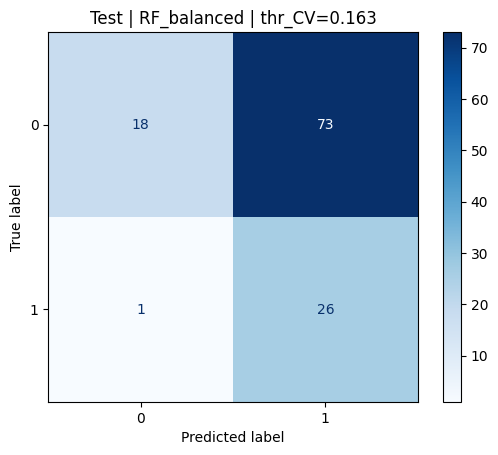

[pos=POSITIVA(1)] Acc=0.3729 | Prec=0.2626 | Rec=0.9630 | F1=0.4127
[pos=POSITIVA(1)] Acc=0.3729 | Prec=0.2626 | Rec=0.9630 | F1=0.4127

Reporte detallado:
              precision    recall  f1-score   support

           0     0.9474    0.1978    0.3273        91
           1     0.2626    0.9630    0.4127        27

    accuracy                         0.3729       118
   macro avg     0.6050    0.5804    0.3700       118
weighted avg     0.7907    0.3729    0.3468       118


=== Evaluación en TEST (umbral recalculado para alcanzar recall_neg ≥ 0.90) ===


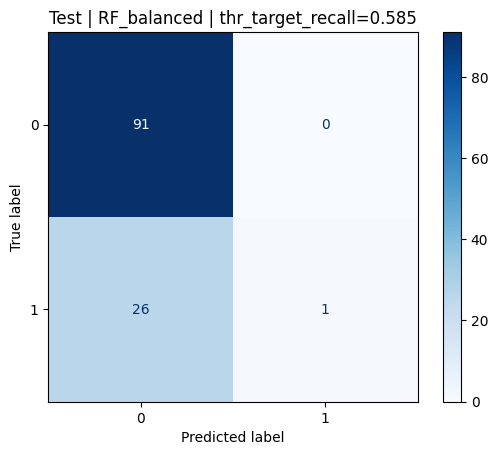

[pos=POSITIVA(1)] Acc=0.7797 | Prec=1.0000 | Rec=0.0370 | F1=0.0714
[pos=POSITIVA(1)] Acc=0.7797 | Prec=1.0000 | Rec=0.0370 | F1=0.0714

Reporte detallado:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118



In [6]:
# ============================================================
# Evaluación de parámetros (ADASYN + RF, RF balanceado, EasyEnsemble)
# Objetivo: Maximizar RECALL de la clase NEGATIVA
# - CV estratificada
# - Umbral para lograr un recall objetivo y maximizar precisión
# - Selección por "precision_neg @ recall_neg >= TARGET_RECALL_NEG"
# ============================================================

# --- 0) Imports y Config ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from copy import deepcopy
from itertools import product

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve
)
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier

# === Config del experimento ===
NEG_CLASS = 1                    # clase de interés
TARGET_RECALL_NEG = 0.90         # objetivo de recall para la clase de interés
CV_FOLDS = 5

# --- 1) Helpers de limpieza y embeddings con chunking seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
embedder = SentenceTransformer(EMB_MODEL)
embedder.max_seq_length = 510  # seguridad
tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def embed_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE) -> np.ndarray:
    """Chunking con doble seguridad + mean-pooling + renormalización final."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc["input_ids"]
    if len(ids) == 0:
        return np.zeros(embedder.get_sentence_embedding_dimension(), dtype=np.float32)
    if isinstance(ids[0], list):
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        safe_txt = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)
        if safe_txt.strip():
            chunks.append(safe_txt)
        if j == len(ids): break
        i = max(j - stride, 0)

    if not chunks:
        chunks = [text]

    E = embedder.encode(chunks, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    em = E.mean(axis=0, keepdims=True)
    em = normalize(em, norm="l2").ravel()
    return em

# --- 2) Umbrales centrados en NEG_CLASS ---
def predict_with_threshold_for_class(p1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    """p1 = P(label=1). Para target_class=0 se usa p0 = 1-p1; para 1, p1."""
    p_target = p1 if target_class == 1 else (1.0 - p1)
    yhat_target = (p_target >= thr).astype(int)
    return np.where(yhat_target == 1, target_class, 1 - target_class)

def best_threshold_for_target_recall(y_true: np.ndarray, p1: np.ndarray, target_class: int, target_recall: float) -> float:
    """
    Umbral que logra >= target_recall para 'target_class' y, entre esos, la mayor precisión.
    Si no se alcanza, devuelve el umbral con mayor recall posible.
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = p1 if target_class == 1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx) > 0:
        best_i = idx[np.argmax(prec[idx])]
        return float(thr[best_i])
    else:
        best_i = np.argmax(rec[:-1])
        return float(thr[best_i])

def fold_metrics(y_true: np.ndarray, y_pred: np.ndarray, pos_label: int) -> dict:
    return dict(
        acc  = accuracy_score(y_true, y_pred),
        prec = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        rec  = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        f1   = f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
    )

# --- 3) Datos (split estratificado) ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa los nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr = train[TARGET].values
y_te = test[TARGET].values
print("Distribución train:", pd.Series(y_tr).value_counts().sort_index().to_dict())
print("Distribución test :", pd.Series(y_te).value_counts().sort_index().to_dict())

# --- 4) Embeddings una sola vez (cacheable) ---
X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# --- 5) Definición de modelos y grids ---
experimentos = []

# 5.1) RandomForest balanceado (sin sampler) - pondera clases internamente
rf_bal = ImbPipeline(steps=[
    ("clf", RandomForestClassifier(class_weight="balanced_subsample", random_state=SEED, n_jobs=-1))
])
grid_rf_bal = {
    "clf__n_estimators":   [300, 600],
    "clf__max_depth":      [None, 20],
    "clf__min_samples_leaf":[1, 3],
    "clf__max_features":   ["sqrt", "log2"],
}
experimentos.append(("RF_balanced", rf_bal, grid_rf_bal))

# 5.2) ADASYN + RandomForest
rf_adasyn = ImbPipeline(steps=[
    ("sampler", ADASYN(random_state=SEED)),
    ("clf", RandomForestClassifier(random_state=SEED, n_jobs=-1))
])
grid_rf_adasyn = {
    "sampler__n_neighbors":       [3, 5],
    "sampler__sampling_strategy": [0.5, 1.0],  # 0.5 => minoritaria = 0.5 * mayoritaria; 1.0 => balance total
    "clf__n_estimators":          [300, 600],
    "clf__max_depth":             [None, 20],
    "clf__min_samples_leaf":      [1, 3],
    "clf__max_features":          ["sqrt"],
}
experimentos.append(("ADASYN+RF", rf_adasyn, grid_rf_adasyn))

# 5.3) EasyEnsemble (ensamble de AdaBoost sobre subconjuntos balanceados)
eec = EasyEnsembleClassifier(random_state=SEED)
grid_eec = {
    "n_estimators": [5, 10, 20],  # # de bolsas balanceadas
    # "sampling_strategy": [1.0], # opcional, default 1.0 (balance total)
}
experimentos.append(("EasyEnsemble", eec, grid_eec))

# --- 6) Cross-Validation con ajuste de umbral por fold ---
def cv_eval_model(name, base_estimator, param_grid, X, y, cv_folds=CV_FOLDS):
    """
    Para cada combinación de hiperparámetros:
      - CV estratificada
      - Obtiene p1 en cada fold
      - Calcula umbral para lograr TARGET_RECALL_NEG y maximizar precisión_neg
      - Mide métricas con pos_label=NEG_CLASS
    Retorna un DataFrame con promedios y desvíos.
    """
    if isinstance(param_grid, dict):
        keys, values = zip(*param_grid.items()) if len(param_grid)>0 else ([], [])
        combos = [dict(zip(keys, v)) for v in product(*values)] if keys else [{}]
    else:
        raise ValueError("param_grid debe ser dict")

    results = []
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=SEED)

    for params in combos:
        est = deepcopy(base_estimator)
        # set_params soporta pipelines y estimadores simples
        est.set_params(**params)

        folds_prec, folds_rec, folds_f1, folds_acc, folds_thr = [], [], [], [], []

        for tr_idx, va_idx in skf.split(X, y):
            Xtr, Xva = X[tr_idx], X[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]

            # Entrena (si es pipeline con sampler, el resample se hace solo dentro del fit)
            est.fit(Xtr, ytr)

            # Prob de la etiqueta 1
            if hasattr(est, "predict_proba"):
                p1 = est.predict_proba(Xva)[:, 1]
            else:
                # fallback: decision_function -> escala a [0,1]
                s = est.decision_function(Xva)
                p1 = (s - s.min()) / (s.max() - s.min() + 1e-12)

            # Umbral que logra recall_neg >= TARGET_RECALL_NEG y maximiza precisión_neg
            thr = best_threshold_for_target_recall(yva, p1, target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG)
            yhat = predict_with_threshold_for_class(p1, thr=thr, target_class=NEG_CLASS)

            m = fold_metrics(yva, yhat, pos_label=NEG_CLASS)
            folds_acc.append(m["acc"])
            folds_prec.append(m["prec"])
            folds_rec.append(m["rec"])
            folds_f1.append(m["f1"])
            folds_thr.append(thr)

        results.append({
            "modelo": name,
            "params": params,
            "acc_mean":  np.mean(folds_acc),  "acc_std":  np.std(folds_acc),
            "prec_mean": np.mean(folds_prec), "prec_std": np.std(folds_prec),
            "rec_mean":  np.mean(folds_rec),  "rec_std":  np.std(folds_rec),
            "f1_mean":   np.mean(folds_f1),   "f1_std":   np.std(folds_f1),
            "thr_mean":  float(np.mean(folds_thr)),
        })

    df_res = pd.DataFrame(results)
    # Selección primaria: mayor precisión_neg sujeto a alto recall_neg
    # (prioridad → recall, luego precisión)
    df_res = df_res.sort_values(
        by=["rec_mean", "prec_mean", "f1_mean"],
        ascending=[False, False, False],
        ignore_index=True
    )
    return df_res

# --- 7) Ejecutar CV para cada familia de modelos ---
all_tables = []
for name, est, grid in experimentos:
    print(f"\n>>> Evaluando: {name}")
    df_cv = cv_eval_model(name, est, grid, X_tr, y_tr, cv_folds=CV_FOLDS)
    display(df_cv.head(10))
    all_tables.append(df_cv.assign(familia=name))

# Consolidado
cv_summary = pd.concat(all_tables, ignore_index=True)
print("\n=== Top 15 combinaciones (todas las familias) ===")
display(cv_summary.head(15))

# Elegimos la mejor combinación global (por el ordenado anterior)
best_row = cv_summary.iloc[0]
best_name  = best_row["modelo"]
best_params = best_row["params"]
best_thr_cv = best_row["thr_mean"]
print(f"\nMejor combinación global:\n - Modelo: {best_name}\n - Params: {best_params}\n - thr_promedio_CV: {best_thr_cv:.3f}")
# Reconstruimos el estimador con esos params
best_estimator = None
for name, est, grid in experimentos:
    if name == best_name:
        best_estimator = deepcopy(est)
        break
best_estimator.set_params(**best_params)

# --- 8) Reajuste en todo el train y evaluación final en TEST ---
best_estimator.fit(X_tr, y_tr)

# Probabilidad etiqueta=1 en test
if hasattr(best_estimator, "predict_proba"):
    p1_test = best_estimator.predict_proba(X_te)[:, 1]
else:
    s = best_estimator.decision_function(X_te)
    p1_test = (s - s.min()) / (s.max() - s.min() + 1e-12)

# Dos políticas de umbral para test:
# (a) usar el thr promedio de CV (estable)
yhat_cvthr = predict_with_threshold_for_class(p1_test, thr=float(best_thr_cv), target_class=NEG_CLASS)

# (b) recalcular un thr para alcanzar TARGET_RECALL_NEG usando SOLO el train
# (Opcional) lo más correcto sería calibrarlo con un dev set; aquí lo mostramos:
thr_test_target = best_threshold_for_target_recall(y_tr,
    best_estimator.predict_proba(X_tr)[:,1] if hasattr(best_estimator,"predict_proba")
    else (best_estimator.decision_function(X_tr) - best_estimator.decision_function(X_tr).min()) /
         (best_estimator.decision_function(X_tr).max() - best_estimator.decision_function(X_tr).min() + 1e-12),
    target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG
)
yhat_recal = predict_with_threshold_for_class(p1_test, thr=float(thr_test_target), target_class=NEG_CLASS)

def evaluate_and_plot(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    for pos_lab in [NEG_CLASS, 1]:
        tag = "NEGATIVA(0)" if pos_lab==0 else "POSITIVA(1)"
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        print(f"[pos={tag}] Acc={acc:.4f} | Prec={prec:.4f} | Rec={rec:.4f} | F1={f1:.4f}")
    print("\nReporte detallado:")
    print(classification_report(y_true, y_pred, digits=4))

print("\n=== Evaluación en TEST (umbral = thr_promedio_CV) ===")
evaluate_and_plot(y_te, yhat_cvthr, f"Test | {best_name} | thr_CV={best_thr_cv:.3f}")

print(f"\n=== Evaluación en TEST (umbral recalculado para alcanzar recall_neg ≥ {TARGET_RECALL_NEG:.2f}) ===")
evaluate_and_plot(y_te, yhat_recal, f"Test | {best_name} | thr_target_recall={thr_test_target:.3f}")


In [19]:

# ========= Config experimento =========
TARGET_CLASS = 1          # <--- ahora optimizamos la minoritaria (1)
CV_FOLDS = 5

# --- 6) Cross-Validation con ajuste de umbral por fold ---
def cv_eval_model(name, base_estimator, param_grid, X, y, cv_folds=CV_FOLDS):
    """
    Para cada combinación de hiperparámetros:
      - CV estratificada
      - Obtiene p1 en cada fold
      - Calcula umbral para lograr TARGET_RECALL_NEG y maximizar precisión_neg
      - Mide métricas con pos_label=NEG_CLASS
    Retorna un DataFrame con promedios y desvíos.
    """
    if isinstance(param_grid, dict):
        keys, values = zip(*param_grid.items()) if len(param_grid)>0 else ([], [])
        combos = [dict(zip(keys, v)) for v in product(*values)] if keys else [{}]
    else:
        raise ValueError("param_grid debe ser dict")

    results = []
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=SEED)

    for params in combos:
        est = deepcopy(base_estimator)
        # set_params soporta pipelines y estimadores simples
        est.set_params(**params)

        folds_prec, folds_rec, folds_f1, folds_acc, folds_thr = [], [], [], [], []

        for tr_idx, va_idx in skf.split(X, y):
            Xtr, Xva = X[tr_idx], X[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]

            # Entrena (si es pipeline con sampler, el resample se hace solo dentro del fit)
            est.fit(Xtr, ytr)

            # Prob de la etiqueta 1
            if hasattr(est, "predict_proba"):
                p1 = est.predict_proba(Xva)[:, 1]
            else:
                # fallback: decision_function -> escala a [0,1]
                s = est.decision_function(Xva)
                p1 = (s - s.min()) / (s.max() - s.min() + 1e-12)

            # Umbral que logra recall_neg >= TARGET_RECALL_NEG y maximiza precisión_neg
            thr = best_threshold_for_target_recall(yva, p1, target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG)
            yhat = predict_with_threshold_for_class(p1, thr=thr, target_class=NEG_CLASS)

            m = fold_metrics(yva, yhat, pos_label=NEG_CLASS)
            folds_acc.append(m["acc"])
            folds_prec.append(m["prec"])
            folds_rec.append(m["rec"])
            folds_f1.append(m["f1"])
            folds_thr.append(thr)

        results.append({
            "modelo": name,
            "params": params,
            "acc_mean":  np.mean(folds_acc),  "acc_std":  np.std(folds_acc),
            "prec_mean": np.mean(folds_prec), "prec_std": np.std(folds_prec),
            "rec_mean":  np.mean(folds_rec),  "rec_std":  np.std(folds_rec),
            "f1_mean":   np.mean(folds_f1),   "f1_std":   np.std(folds_f1),
            "thr_mean":  float(np.mean(folds_thr)),
        })

    df_res = pd.DataFrame(results)
    # Selección primaria: mayor precisión_neg sujeto a alto recall_neg
    # (prioridad → recall, luego precisión)
    df_res = df_res.sort_values(
        by=["rec_mean", "prec_mean", "f1_mean"],
        ascending=[False, False, False],
        ignore_index=True
    )
    return df_res

def evaluate_and_plot(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    for pos_lab in [NEG_CLASS, 1]:
        tag = "NEGATIVA(0)" if pos_lab==0 else "POSITIVA(1)"
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        print(f"[pos={tag}] Acc={acc:.4f} | Prec={prec:.4f} | Rec={rec:.4f} | F1={f1:.4f}")
    print("\nReporte detallado:")
    print(classification_report(y_true, y_pred, digits=4))


Distribución train: {0: np.int64(364), 1: np.int64(105)}
Distribución test : {0: np.int64(91), 1: np.int64(27)}

=== Ranking CV (optimizado para clase 1) ===


,modelo,F1_1_mean,F1_1_std,recall_1_mean,precision_1_mean,acc_mean,thr_mean
0,RF_weighted+Calibrated,0.542839,0.032606,0.676190,0.467324,0.742050,0.252644
1,BalancedRF,0.534879,0.047865,0.695238,0.445852,0.725006,0.444667
2,RF_weighted,0.524659,0.029599,0.666667,0.437637,0.727065,0.248333
3,ADASYN+RF,0.513986,0.045631,0.819048,0.381343,0.644063,0.325333
4,EasyEnsemble,0.502461,0.036617,0.542857,0.497250,0.759071,0.525728
5,BorderlineSMOTE+RF,0.498607,0.050274,0.752381,0.383392,0.652482,0.333333
6,SMOTEENN+RF,0.454056,0.051880,0.723810,0.352614,0.600961,0.651667



Mejor: RF_weighted+Calibrated | thr_CV≈0.253


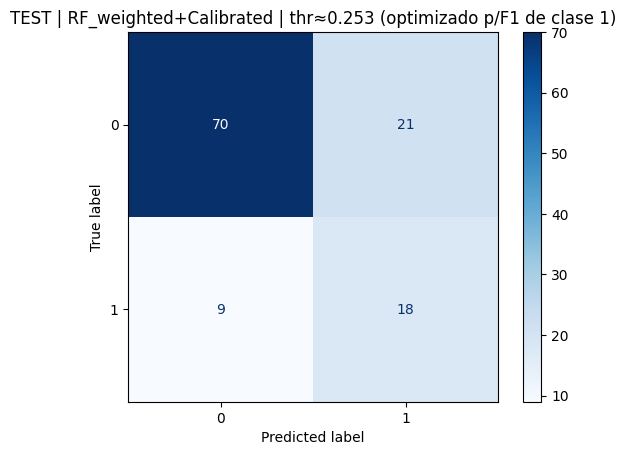


=== Métricas en TEST (pos_label=1) ===
              precision    recall  f1-score   support

           0     0.8861    0.7692    0.8235        91
           1     0.4615    0.6667    0.5455        27

    accuracy                         0.7458       118
   macro avg     0.6738    0.7179    0.6845       118
weighted avg     0.7889    0.7458    0.7599       118



In [20]:
# =========================================
# Objetivo ahora: MAXIMIZAR F1 de la CLASE 1 (minoritaria)
# Incluye: ADASYN, Borderline-SMOTE, SMOTEENN, RF balanceado,
# BalancedRandomForest, EasyEnsemble, calibración de probabilidades.
# =========================================
import warnings, logging
warnings.filterwarnings("ignore")
logging.getLogger("transformers").setLevel(logging.ERROR)

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier

# ========= Config experimento =========
TARGET_CLASS = 1          # <--- ahora optimizamos la minoritaria (1)
CV_FOLDS = 5

def predict_with_threshold_for_class(p1, thr, target_class):
    p_target = p1 if target_class == 1 else (1.0 - p1)
    yhat_t = (p_target >= thr).astype(int)
    return np.where(yhat_t == 1, target_class, 1 - target_class)

def best_thr_maximize_f1(y_true, p1, target_class):
    y_bin = (y_true == target_class).astype(int)
    p_target = p1 if target_class == 1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k])

def fold_metrics(y_true, y_pred, pos_label):
    return dict(
        acc  = accuracy_score(y_true, y_pred),
        prec = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        rec  = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        f1   = f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
    )

# ========= Datos =========
assert TARGET in df.columns and TEXT in df.columns
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr, y_te = train[TARGET].values, test[TARGET].values

# Embeddings (usa tu embed_ultrasafe con chunking + mean + normalización)
X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))

# ========= Definimos modelos =========
experimentos = []

# (1) RF con class_weight fuertemente sesgado a la 1
rf_heavy = RandomForestClassifier(
    n_estimators=600, max_depth=None, n_jobs=-1,
    class_weight={0:1.0, 1: min(10.0, (y_tr==0).sum() / max(1,(y_tr==1).sum()) )},  # peso≈ratio o cap=10
    random_state=SEED
)
experimentos.append(("RF_weighted", rf_heavy))

# (2) ADASYN + RF
rf_adasyn = ImbPipeline(steps=[
    ("sampler", ADASYN(random_state=SEED, n_neighbors=3, sampling_strategy=1.0)),
    ("clf", RandomForestClassifier(n_estimators=600, n_jobs=-1, random_state=SEED))
])
experimentos.append(("ADASYN+RF", rf_adasyn))

# (3) Borderline-SMOTE + RF (genera sintéticos cerca de la frontera)
rf_blsmote = ImbPipeline(steps=[
    ("sampler", BorderlineSMOTE(kind="borderline-1", random_state=SEED, k_neighbors=3, sampling_strategy=1.0)),
    ("clf", RandomForestClassifier(n_estimators=600, n_jobs=-1, random_state=SEED))
])
experimentos.append(("BorderlineSMOTE+RF", rf_blsmote))

# (4) SMOTEENN + RF (over + limpieza por ENN)
rf_smoteenn = ImbPipeline(steps=[
    ("sampler", SMOTEENN(random_state=SEED, sampling_strategy=1.0)),
    ("clf", RandomForestClassifier(n_estimators=600, n_jobs=-1, random_state=SEED))
])
experimentos.append(("SMOTEENN+RF", rf_smoteenn))

# (5) BalancedRandomForest (submuestreo en cada bootstrap)
brf = BalancedRandomForestClassifier(
    n_estimators=600, max_depth=None, random_state=SEED, n_jobs=-1
)
experimentos.append(("BalancedRF", brf))

# (6) EasyEnsemble
eec = EasyEnsembleClassifier(n_estimators=20, random_state=SEED)  # más bolsas suele ayudar a minoritaria
experimentos.append(("EasyEnsemble", eec))

# (7) Calibración de probabilidades (Platt) encima de RF_weighted
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold

cal_rf = CalibratedClassifierCV(
    estimator=RandomForestClassifier(
        n_estimators=600, max_depth=None, n_jobs=-1,
        class_weight={0: 1.0, 1: min(10.0, (y_tr==0).sum() / max(1,(y_tr==1).sum()))},
        random_state=SEED
    ),
    method="sigmoid",  # o "isotonic" si tienes suficientes datos
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED),
)
experimentos.append(("RF_weighted+Calibrated", cal_rf))

# ========= CV y selección por F1 de la CLASE 1 =========
skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
tabla = []

for name, est in experimentos:
    f1s, recs, precs, accs, thrs = [], [], [], [], []
    for tr_idx, va_idx in skf.split(X_tr, y_tr):
        Xtr, Xva = X_tr[tr_idx], X_tr[va_idx]
        ytr, yva = y_tr[tr_idx], y_tr[va_idx]

        est.fit(Xtr, ytr)

        # Probabilidades de la etiqueta 1 (o score escalado)
        if hasattr(est, "predict_proba"):
            p1 = est.predict_proba(Xva)[:,1]
        elif hasattr(est, "decision_function"):
            s = est.decision_function(Xva)
            p1 = (s - s.min())/(s.max()-s.min()+1e-12)
        else:
            # fallback malo, pero evita romper el loop
            p1 = (est.predict(Xva) == 1).astype(float)

        thr = best_thr_maximize_f1(yva, p1, target_class=TARGET_CLASS)
        yhat = predict_with_threshold_for_class(p1, thr, target_class=TARGET_CLASS)

        m = fold_metrics(yva, yhat, pos_label=TARGET_CLASS)
        f1s.append(m["f1"]); recs.append(m["rec"]); precs.append(m["prec"]); accs.append(m["acc"]); thrs.append(thr)

    tabla.append({
        "modelo": name,
        "F1_1_mean": np.mean(f1s), "F1_1_std": np.std(f1s),
        "recall_1_mean": np.mean(recs), "precision_1_mean": np.mean(precs),
        "acc_mean": np.mean(accs), "thr_mean": float(np.mean(thrs)),
    })

df_cv = pd.DataFrame(tabla).sort_values(
    by=["F1_1_mean","recall_1_mean","precision_1_mean"], ascending=[False, False, False], ignore_index=True
)
print("\n=== Ranking CV (optimizado para clase 1) ===")
display(df_cv.head(10))

# Mejor estimador
best_name = df_cv.iloc[0]["modelo"]
best_thr  = float(df_cv.iloc[0]["thr_mean"])
best_est  = [est for (n,est) in experimentos if n==best_name][0]
print(f"\nMejor: {best_name} | thr_CV≈{best_thr:.3f}")

# ========= Reajuste en todo el train y evaluación en TEST =========
best_est.fit(X_tr, y_tr)
if hasattr(best_est, "predict_proba"):
    p1_test = best_est.predict_proba(X_te)[:,1]
elif hasattr(best_est, "decision_function"):
    s = best_est.decision_function(X_te)
    p1_test = (s - s.min())/(s.max()-s.min()+1e-12)
else:
    p1_test = (best_est.predict(X_te) == 1).astype(float)

# (a) Umbral promedio de CV que maximizó F1_1
yhat_test = predict_with_threshold_for_class(p1_test, best_thr, target_class=TARGET_CLASS)

cm = confusion_matrix(y_te, yhat_test, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
plt.title(f"TEST | {best_name} | thr≈{best_thr:.3f} (optimizado p/F1 de clase 1)"); plt.show()

print("\n=== Métricas en TEST (pos_label=1) ===")
print(classification_report(y_te, yhat_test, digits=4))


# Mejor modelo


Distribución train: {0: np.int64(364), 1: np.int64(105)}
Distribución test : {0: np.int64(91), 1: np.int64(27)}

=== Ranking CV (TF-IDF, optimizado para clase 1) ===


,modelo,F1_1_mean,F1_1_std,recall_1_mean,precision_1_mean,acc_mean,thr_mean
0,LinearSVC+Calibrated,0.662296,0.061254,0.647619,0.680616,0.852917,0.347812
1,LogReg(balanced),0.646320,0.052840,0.695238,0.649688,0.825235,0.444572
2,BalancedBagging(LogReg),0.625746,0.040670,0.638095,0.637647,0.827294,0.487601



Mejor: LinearSVC+Calibrated | thr_CV≈0.348


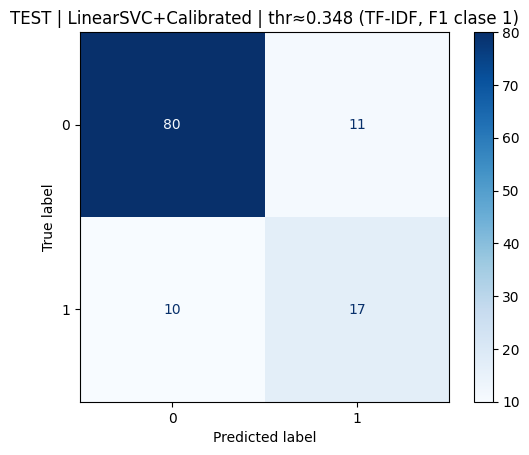


=== Métricas en TEST (pos_label=1) ===
              precision    recall  f1-score   support

           0     0.8889    0.8791    0.8840        91
           1     0.6071    0.6296    0.6182        27

    accuracy                         0.8220       118
   macro avg     0.7480    0.7544    0.7511       118
weighted avg     0.8244    0.8220    0.8232       118

✅ Modelo exportado a 'modelo_cobranza_tfidf.joblib'


In [7]:
# ============================================================
# ALTERNATIVA: TF-IDF (word + char) + modelos lineales
# Optimización: MAX F1 de la CLASE 1 (minoritaria)
# Versiones asumidas: scikit-learn==1.2.2, imbalanced-learn==0.10.1
# ============================================================

# --- Config existentes ---
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

# --- Imports ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay,
    classification_report
)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier

# --- Helpers ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

def predict_with_threshold_for_class(p1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    p_target = p1 if target_class == 1 else (1.0 - p1)
    yhat_t = (p_target >= thr).astype(int)
    return np.where(yhat_t == 1, target_class, 1 - target_class)

def best_thr_maximize_f1(y_true: np.ndarray, p1: np.ndarray, target_class: int) -> float:
    y_bin = (y_true == target_class).astype(int)
    p_target = p1 if target_class == 1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k])

def fold_metrics(y_true: np.ndarray, y_pred: np.ndarray, pos_label: int) -> dict:
    return dict(
        acc  = accuracy_score(y_true, y_pred),
        prec = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        rec  = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
        f1   = f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0),
    )

# --- Datos ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr = train[TARGET].values
y_te = test[TARGET].values
print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))

# --- Vectorizadores: palabras + caracteres ---
word_tfidf = ("w_tfidf", TfidfVectorizer(
    analyzer="word", ngram_range=(1,2), min_df=2, max_df=0.95,
    lowercase=True, strip_accents="unicode"
))
char_tfidf = ("c_tfidf", TfidfVectorizer(
    analyzer="char", ngram_range=(3,5), min_df=2, max_df=0.95,
    lowercase=True, strip_accents="unicode"
))
feats = FeatureUnion([word_tfidf, char_tfidf])

# --- Modelos a comparar (todos optimizan F1 de clase 1) ---
TARGET_CLASS = 1
CV_FOLDS = 5
experimentos = []

# 1) LinearSVC (balanced) + calibración Platt para tener probas y afinar umbral
lin_svc = Pipeline([
    ("feats", feats),
    ("clf", CalibratedClassifierCV(
        estimator=LinearSVC(class_weight="balanced", random_state=SEED),
        method="sigmoid",
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
    ))
])
experimentos.append(("LinearSVC+Calibrated", lin_svc))

# 2) LogisticRegression (balanced)
logreg = Pipeline([
    ("feats", feats),
    ("clf", LogisticRegression(
        max_iter=5000, solver="liblinear",  # liblinear va bien con sparse alta-dim
        class_weight="balanced", random_state=SEED
    ))
])
experimentos.append(("LogReg(balanced)", logreg))

# 3) BalancedBagging + LogReg (más robustez con bolsas balanceadas)
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression

bb_logreg = Pipeline([
    ("feats", feats),
    ("clf", BalancedBaggingClassifier(
        estimator=LogisticRegression(
            max_iter=5000, solver="liblinear", class_weight=None, random_state=SEED
        ),
        n_estimators=15,
        random_state=SEED,
        n_jobs=-1,
        replacement=False
    ))
])
experimentos.append(("BalancedBagging(LogReg)", bb_logreg))


# --- CV estratificada + selección de umbral por F1(1) ---
skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
tabla = []

for name, est in experimentos:
    f1s, recs, precs, accs, thrs = [], [], [], [], []
    for tr_idx, va_idx in skf.split(train[TEXT], y_tr):
        Xtr_txt, Xva_txt = train[TEXT].iloc[tr_idx], train[TEXT].iloc[va_idx]
        ytr, yva = y_tr[tr_idx], y_tr[va_idx]

        est.fit(Xtr_txt, ytr)

        # Obtener probas de clase 1 (o score escalado)
        if hasattr(est.named_steps["clf"], "predict_proba"):
            p1 = est.predict_proba(Xva_txt)[:,1]
        elif hasattr(est.named_steps["clf"], "decision_function"):
            s = est.decision_function(Xva_txt)
            p1 = (s - s.min())/(s.max()-s.min()+1e-12)
        else:
            # si el paso final es el CalibratedClassifierCV, usamos predict_proba arriba
            p1 = (est.predict(Xva_txt) == 1).astype(float)

        thr = best_thr_maximize_f1(yva, p1, target_class=TARGET_CLASS)
        yhat = predict_with_threshold_for_class(p1, thr, target_class=TARGET_CLASS)

        m = fold_metrics(yva, yhat, pos_label=TARGET_CLASS)
        f1s.append(m["f1"]); recs.append(m["rec"]); precs.append(m["prec"]); accs.append(m["acc"]); thrs.append(thr)

    tabla.append({
        "modelo": name,
        "F1_1_mean": np.mean(f1s), "F1_1_std": np.std(f1s),
        "recall_1_mean": np.mean(recs), "precision_1_mean": np.mean(precs),
        "acc_mean": np.mean(accs), "thr_mean": float(np.mean(thrs)),
    })

df_cv = pd.DataFrame(tabla).sort_values(
    by=["F1_1_mean","recall_1_mean","precision_1_mean"], ascending=[False, False, False], ignore_index=True
)
print("\n=== Ranking CV (TF-IDF, optimizado para clase 1) ===")
display(df_cv)

# --- Mejor estimador y evaluación en TEST ---
best_name = df_cv.iloc[0]["modelo"]
best_thr  = float(df_cv.iloc[0]["thr_mean"])
best_est  = [est for (n, est) in experimentos if n == best_name][0]
print(f"\nMejor: {best_name} | thr_CV≈{best_thr:.3f}")

best_est.fit(train[TEXT], y_tr)

# proba clase 1 en test
if hasattr(best_est.named_steps["clf"], "predict_proba"):
    p1_test = best_est.predict_proba(test[TEXT])[:,1]
elif hasattr(best_est.named_steps["clf"], "decision_function"):
    s = best_est.decision_function(test[TEXT])
    p1_test = (s - s.min())/(s.max()-s.min()+1e-12)
else:
    p1_test = (best_est.predict(test[TEXT]) == 1).astype(float)

yhat_test = predict_with_threshold_for_class(p1_test, best_thr, target_class=TARGET_CLASS)

cm = confusion_matrix(y_te, yhat_test, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
plt.title(f"TEST | {best_name} | thr≈{best_thr:.3f} (TF-IDF, F1 clase 1)"); plt.show()

print("\n=== Métricas en TEST (pos_label=1) ===")
print(classification_report(y_te, yhat_test, digits=4))

# ===== Exportar el mejor modelo para inferencia en Streamlit =====
import joblib, time, platform, sklearn, imblearn

ARTIFACT = {
    "pipeline": best_est,
    "threshold": float(best_thr),
    "target_class": int(TARGET_CLASS),
    "text_col": TEXT,
    "label_col": TARGET,
    "task": "binary_text_classification",
    "decision": "p1 >= threshold -> target_class, else -> 1-target_class",
    "meta": {
        "best_model_name": str(best_name),
        "trained_at": time.strftime("%Y-%m-%d %H:%M:%S"),
        "seed": SEED,
        "cv_folds": int(CV_FOLDS),
        "sklearn_version": sklearn.__version__,
        "imblearn_version": imblearn.__version__,
        "python_version": platform.python_version(),
    }
}
joblib.dump(ARTIFACT, "modelo_cobranza_tfidf.joblib")
print("✅ Modelo exportado a 'modelo_cobranza_tfidf.joblib'")


In [10]:
from joblib import load
modelo= load("/content/modelo_cobranza_tfidf.joblib")

print("modelo:/n", modelo)

modelo:/n {'pipeline': Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('w_tfidf',
                                                 TfidfVectorizer(max_df=0.95,
                                                                 min_df=2,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 strip_accents='unicode')),
                                                ('c_tfidf',
                                                 TfidfVectorizer(analyzer='char',
                                                                 max_df=0.95,
                                                                 min_df=2,
                                                                 ngram_range=(3,
                                                                              5),
                         

In [9]:
# ===== Exportar el mejor modelo para inferencia en Streamlit =====
import joblib, time, platform, sklearn, imblearn

ARTIFACT = {
    "pipeline": best_est,
    "threshold": float(best_thr),
    "target_class": int(TARGET_CLASS),
    "text_col": TEXT,
    "label_col": TARGET,
    "task": "binary_text_classification",
    "decision": "p1 >= threshold -> target_class, else -> 1-target_class",
    "meta": {
        "best_model_name": str(best_name),
        "trained_at": time.strftime("%Y-%m-%d %H:%M:%S"),
        "seed": SEED,
        "cv_folds": int(CV_FOLDS),
        "sklearn_version": sklearn.__version__,
        "imblearn_version": imblearn.__version__,
        "python_version": platform.python_version(),
    }
}
joblib.dump(ARTIFACT, "modelo_cobranza_tfidf.joblib")
print("✅ Modelo exportado a 'modelo_cobranza_tfidf.joblib'")

✅ Modelo exportado a 'modelo_cobranza_tfidf.joblib'


Umbral OOF (max F1_1): 0.450 | F1_1=0.504 | Prec_1=0.416 | Rec_1=0.638

=== BalancedRF | Umbral OOF=0.450 (max F1_1) ===


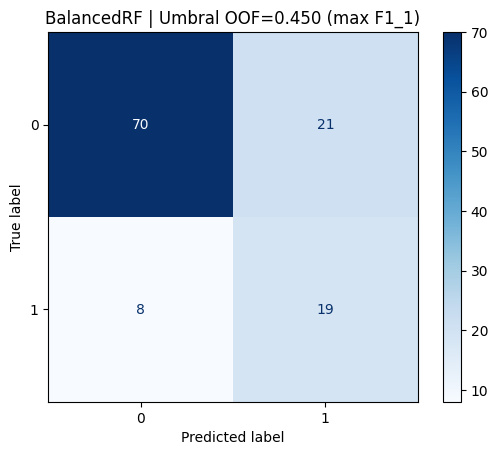

              precision    recall  f1-score   support

           0     0.8974    0.7692    0.8284        91
           1     0.4750    0.7037    0.5672        27

    accuracy                         0.7542       118
   macro avg     0.6862    0.7365    0.6978       118
weighted avg     0.8008    0.7542    0.7686       118

(pos_label=1)  Acc=0.7542 | Prec=0.4750 | Rec=0.7037 | F1=0.5672


In [16]:
# ============================================================
# BalancedRandomForest con UMBRAL GLOBAL obtenido en OOF (CV)
# Objetivo: maximizar F1 de la clase 1
# ============================================================
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict

TARGET_CLASS = 1
SEED = 42
K = 5  # folds CV para OOF

def best_thr_maximize_f1(y_true, p1, target_class=1):
    import numpy as np
    from sklearn.metrics import precision_recall_curve
    y_bin = (y_true == target_class).astype(int)
    p_target = p1 if target_class == 1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (prec[k], rec[k])

def predict_with_threshold_for_class(p1, thr, target_class=1):
    import numpy as np
    p_target = p1 if target_class == 1 else (1.0 - p1)
    yhat_t = (p_target >= thr).astype(int)
    return np.where(yhat_t == 1, target_class, 1 - target_class)

def report_all(y_true, y_pred, title=""):
    from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                                 classification_report, accuracy_score,
                                 precision_score, recall_score, f1_score)
    import matplotlib.pyplot as plt
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

# --- 1) Modelo base
brf = BalancedRandomForestClassifier(
    n_estimators=600, max_depth=None, random_state=SEED, n_jobs=-1
)

# --- 2) OOF: predicciones por CV en train (probas de la clase 1)
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)
# cross_val_predict con method="predict_proba" nos da p(label=1) OOF
p1_oof = cross_val_predict(
    brf, X_tr, y_tr, cv=skf, method="predict_proba", n_jobs=-1
)[:,1]

# --- 3) Elegimos UMBRAL GLOBAL para maximizar F1_1 en OOF
thr_oof, f1_oof, (prec_oof, rec_oof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=1)
print(f"Umbral OOF (max F1_1): {thr_oof:.3f} | F1_1={f1_oof:.3f} | Prec_1={prec_oof:.3f} | Rec_1={rec_oof:.3f}")

# --- 4) Reentrena en TODO el train y evalúa en TEST con ese umbral global
brf.fit(X_tr, y_tr)
p1_test = brf.predict_proba(X_te)[:,1]
yhat_test = predict_with_threshold_for_class(p1_test, thr_oof, target_class=1)
report_all(y_te, yhat_test, title=f"BalancedRF | Umbral OOF={thr_oof:.3f} (max F1_1)")


In [ ]:
pip install "xgboost==1.7.6"


In [ ]:
def best_thr_target_recall(y_true, p1, target_recall=0.6, target_class=1):
    y_bin = (y_true==target_class).astype(int)
    prec, rec, thr = precision_recall_curve(y_bin, p1 if target_class==1 else (1-p1))
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx)==0:
        k = np.argmax(rec[:-1]); return float(thr[k])
    # entre los que cumplen, maximiza F1
    f1 = (2*prec[idx]*rec[idx])/(prec[idx]+rec[idx]+1e-12)
    k = idx[np.argmax(f1)]
    return float(thr[k])

thr_oof = best_thr_target_recall(y_tr, p1_oof, target_recall=0.6, target_class=1)


Umbral OOF (max F1_1) = 0.085 | F1_1_OOF=0.489 | Prec_1=0.393 | Rec_1=0.648

=== XGBoost | Umbral OOF=0.085 (max F1 clase 1) ===


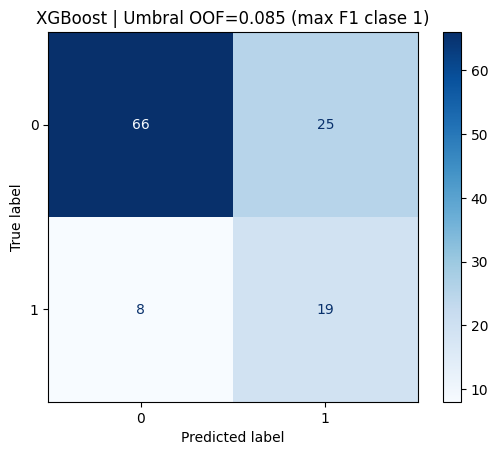

              precision    recall  f1-score   support

           0     0.8919    0.7253    0.8000        91
           1     0.4318    0.7037    0.5352        27

    accuracy                         0.7203       118
   macro avg     0.6619    0.7145    0.6676       118
weighted avg     0.7866    0.7203    0.7394       118

(pos_label=1)  Acc=0.7203 | Prec=0.4318 | Rec=0.7037 | F1=0.5352


In [15]:
# ============================================================
# XGBoost sobre EMBEDDINGS + OOF MANUAL (max F1 clase 1)
# ============================================================
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (precision_recall_curve, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score)
from xgboost import XGBClassifier

TARGET_CLASS = 1
K_FOLDS = 5
SEED = 42

def best_thr_maximize_f1(y_true, p1, target_class=1):
    y_bin = (y_true == target_class).astype(int)
    # p1 ya es prob de clase 1 (si target_class==0 usarías 1-p1)
    prec, rec, thr = precision_recall_curve(y_bin, p1 if target_class==1 else (1-p1))
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (float(prec[k]), float(rec[k]))

def predict_with_threshold_for_class(p1, thr, target_class=1):
    p_target = p1 if target_class==1 else (1.0-p1)
    yhat_t = (p_target >= thr).astype(int)
    return np.where(yhat_t==1, target_class, 1-target_class)

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

# --- Parámetros XGBoost (idénticos a los propuestos) ---
neg, pos = (y_tr==0).sum(), (y_tr==1).sum()
scale_pos_weight = max(1.0, neg / max(1, pos))

xgb_params = dict(
    n_estimators=800,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1.0,
    gamma=0.0,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    tree_method='hist',   # usa 'gpu_hist' si tienes GPU NVIDIA
    n_jobs=-1,
    random_state=SEED,
)

# --- OOF manual: probas para cada muestra de train sin usar su fold ---
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED)
p1_oof = np.zeros(len(y_tr), dtype=float)

for tr_idx, va_idx in skf.split(X_tr, y_tr):
    Xtr, Xva = X_tr[tr_idx], X_tr[va_idx]
    ytr      = y_tr[tr_idx]

    clf = XGBClassifier(**xgb_params)
    clf.fit(Xtr, ytr)
    p1_oof[va_idx] = clf.predict_proba(Xva)[:,1]

thr_oof, f1_oof, (prec_oof, rec_oof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=TARGET_CLASS)
print(f"Umbral OOF (max F1_1) = {thr_oof:.3f} | F1_1_OOF={f1_oof:.3f} | Prec_1={prec_oof:.3f} | Rec_1={rec_oof:.3f}")

# --- Reentrena en TODO el train y evalúa en TEST con ese umbral global ---
final_xgb = XGBClassifier(**xgb_params).fit(X_tr, y_tr)
p1_test = final_xgb.predict_proba(X_te)[:,1]
yhat_test = predict_with_threshold_for_class(p1_test, thr_oof, target_class=TARGET_CLASS)

report_all(y_te, yhat_test, title=f"XGBoost | Umbral OOF={thr_oof:.3f} (max F1 clase 1)")



>>> Entrenando OOF con sampler: ADASYN_0.5_k3
Umbral OOF (max F1_1)=0.105 | F1_1_OOF=0.463 | Prec_1=0.390 | Rec_1=0.571

>>> Entrenando OOF con sampler: ADASYN_1.0_k3
Umbral OOF (max F1_1)=0.135 | F1_1_OOF=0.459 | Prec_1=0.368 | Rec_1=0.610

>>> Entrenando OOF con sampler: ADASYN_1.0_k5
Umbral OOF (max F1_1)=0.226 | F1_1_OOF=0.459 | Prec_1=0.403 | Rec_1=0.533

>>> Entrenando OOF con sampler: BLSMOTE_1.0_k3
Umbral OOF (max F1_1)=0.135 | F1_1_OOF=0.463 | Prec_1=0.377 | Rec_1=0.600

>>> Entrenando OOF con sampler: SMOTEENN_1.0
Umbral OOF (max F1_1)=0.930 | F1_1_OOF=0.432 | Prec_1=0.324 | Rec_1=0.648

=== Resultados XGBoost + Oversampling (ordenado por F1_1_test) ===


,sampler,thr_oof,F1_1_OOF,Prec_1_OOF,Rec_1_OOF,acc_test,prec1_test,recall1_test,f1_1_test
0,ADASYN_0.5_k3,0.105400,0.463320,0.389610,0.571429,0.720339,0.425000,0.629630,0.507463
3,BLSMOTE_1.0_k3,0.134540,0.463235,0.377246,0.600000,0.686441,0.386364,0.629630,0.478873
1,ADASYN_1.0_k3,0.135171,0.458781,0.367816,0.609524,0.686441,0.361111,0.481481,0.412698
2,ADASYN_1.0_k5,0.226358,0.459016,0.402878,0.533333,0.703390,0.366667,0.407407,0.385965
4,SMOTEENN_1.0,0.929672,0.431746,0.323810,0.647619,0.559322,0.254902,0.481481,0.333333



Mejor sampler en TEST: ADASYN_0.5_k3 | F1_1_test=0.507 | Rec_1=0.630 | Prec_1=0.425 | thr=0.105

=== XGBoost + ADASYN_0.5_k3 | thr_OOF=0.105 ===


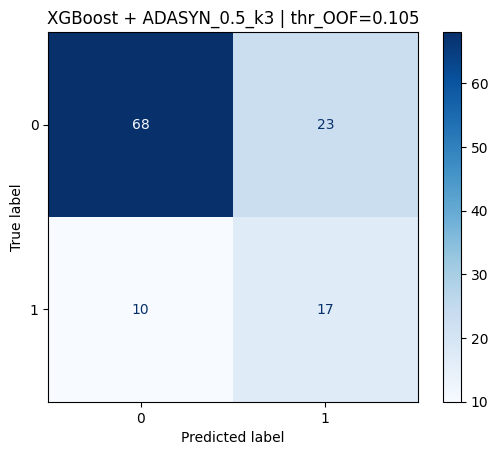

              precision    recall  f1-score   support

           0     0.8718    0.7473    0.8047        91
           1     0.4250    0.6296    0.5075        27

    accuracy                         0.7203       118
   macro avg     0.6484    0.6884    0.6561       118
weighted avg     0.7696    0.7203    0.7367       118

(pos_label=1)  Acc=0.7203 | Prec=0.4250 | Rec=0.6296 | F1=0.5075


In [14]:
# ============================================================
# XGBoost + OVERSAMPLING (ADASYN / BorderlineSMOTE / SMOTEENN)
# - OOF para umbral global (max F1 clase 1)
# - Reentrena en todo el train con el mismo sampler
# ============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (precision_recall_curve, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score)
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN

# -------- Config --------
TARGET_CLASS = 1
SEED = 42
K_FOLDS = 5

# -------- Helpers umbral / reporte --------
def best_thr_maximize_f1(y_true, p1, target_class=1):
    y_bin = (y_true == target_class).astype(int)
    s = p1 if target_class==1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, s)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (float(prec[k]), float(rec[k]))

def predict_with_threshold_for_class(p1, thr, target_class=1):
    s = p1 if target_class==1 else (1.0 - p1)
    yhat_t = (s >= thr).astype(int)
    return np.where(yhat_t==1, target_class, 1-target_class)

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

# -------- Datos / embeddings (se calculan si faltan) --------
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

if 'X_tr' not in globals() or 'X_te' not in globals() or 'y_tr' not in globals() or 'y_te' not in globals():
    train, test = train_test_split(
        data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
    )
    y_tr = train[TARGET].values
    y_te = test[TARGET].values
    print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
    print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))
    X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
    X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# -------- Parámetros XGBoost base --------
# Con oversampling NO usamos scale_pos_weight (lo dejamos en 1.0)
xgb_base = dict(
    n_estimators=900,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1.0,
    gamma=0.0,
    reg_lambda=1.0,
    scale_pos_weight=1.0,    # <- clave con oversampling
    eval_metric='logloss',
    tree_method='hist',      # usa 'gpu_hist' si tienes GPU NVIDIA
    n_jobs=-1,
    random_state=SEED
)

# -------- Samplers a probar (híbrido) --------
candidatos = [
    ("ADASYN_0.5_k3", ADASYN(random_state=SEED, n_neighbors=3, sampling_strategy=0.5)),
    ("ADASYN_1.0_k3", ADASYN(random_state=SEED, n_neighbors=3, sampling_strategy=1.0)),
    ("ADASYN_1.0_k5", ADASYN(random_state=SEED, n_neighbors=5, sampling_strategy=1.0)),
    ("BLSMOTE_1.0_k3", BorderlineSMOTE(kind="borderline-1", random_state=SEED, k_neighbors=3, sampling_strategy=1.0)),
    ("SMOTEENN_1.0", SMOTEENN(random_state=SEED, sampling_strategy=1.0)),
]

def oof_with_sampler(X, y, sampler, model_params, k_folds=5, seed=42):
    """Devuelve p1_oof y modelos por fold entrenados (opcional)"""
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
    p1_oof = np.zeros(len(y), dtype=float)
    for tr_idx, va_idx in skf.split(X, y):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr      = y[tr_idx]
        # Fit sampler SOLO en train del fold
        Xtr_res, ytr_res = sampler.fit_resample(Xtr, ytr)
        clf = XGBClassifier(**model_params)
        clf.fit(Xtr_res, ytr_res)
        p1_oof[va_idx] = clf.predict_proba(Xva)[:,1]
    return p1_oof

resumen = []

for name, sampler in candidatos:
    print(f"\n>>> Entrenando OOF con sampler: {name}")
    p1_oof = oof_with_sampler(X_tr, y_tr, sampler, xgb_base, k_folds=K_FOLDS, seed=SEED)
    thr, f1_oof, (prec_oof, rec_oof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=TARGET_CLASS)
    print(f"Umbral OOF (max F1_1)={thr:.3f} | F1_1_OOF={f1_oof:.3f} | Prec_1={prec_oof:.3f} | Rec_1={rec_oof:.3f}")

    # Reentrena en TODO el train con el mismo sampler y evalúa en test
    Xtr_full, ytr_full = sampler.fit_resample(X_tr, y_tr)
    final_xgb = XGBClassifier(**xgb_base).fit(Xtr_full, ytr_full)
    p1_test = final_xgb.predict_proba(X_te)[:,1]
    yhat_test = predict_with_threshold_for_class(p1_test, thr, target_class=TARGET_CLASS)

    acc  = accuracy_score(y_te, yhat_test)
    prec = precision_score(y_te, yhat_test, pos_label=1, zero_division=0)
    rec  = recall_score(y_te, yhat_test, pos_label=1, zero_division=0)
    f1   = f1_score(y_te, yhat_test, pos_label=1, zero_division=0)

    resumen.append({
        "sampler": name,
        "thr_oof": thr,
        "F1_1_OOF": f1_oof,
        "Prec_1_OOF": prec_oof,
        "Rec_1_OOF": rec_oof,
        "acc_test": acc,
        "prec1_test": prec,
        "recall1_test": rec,
        "f1_1_test": f1
    })

# -------- Tabla comparativa y mejor resultado --------
df_res = pd.DataFrame(resumen).sort_values(["f1_1_test","recall1_test","prec1_test"], ascending=[False, False, False])
print("\n=== Resultados XGBoost + Oversampling (ordenado por F1_1_test) ===")
display(df_res)

best = df_res.iloc[0]
print(f"\nMejor sampler en TEST: {best['sampler']} | F1_1_test={best['f1_1_test']:.3f} | Rec_1={best['recall1_test']:.3f} | Prec_1={best['prec1_test']:.3f} | thr={best['thr_oof']:.3f}")

# -------- Matriz de confusión del mejor --------
best_name = best["sampler"]
sampler_best = [s for (n,s) in candidatos if n==best_name][0]
# Reentrenar y mostrar matriz
Xtr_full, ytr_full = sampler_best.fit_resample(X_tr, y_tr)
best_model = XGBClassifier(**xgb_base).fit(Xtr_full, ytr_full)
p1_test = best_model.predict_proba(X_te)[:,1]
yhat_best = predict_with_threshold_for_class(p1_test, float(best["thr_oof"]), target_class=TARGET_CLASS)
report_all(y_te, yhat_best, title=f"XGBoost + {best_name} | thr_OOF={best['thr_oof']:.3f}")


Distribución train: {0: np.int64(364), 1: np.int64(105)}
Distribución test : {0: np.int64(91), 1: np.int64(27)}

=== Selección de umbral por estrategia (OOF por llamada) ===
mean           thr=0.181 | OOF Prec_1=0.531 Rec_1=0.495 F1_1=0.512
max            thr=0.260 | OOF Prec_1=0.406 Rec_1=0.514 F1_1=0.454
topk_mean_k3   thr=0.196 | OOF Prec_1=0.472 Rec_1=0.486 F1_1=0.479
topk_mean_k5   thr=0.181 | OOF Prec_1=0.525 Rec_1=0.495 F1_1=0.510
topk_mean_k10  thr=0.181 | OOF Prec_1=0.531 Rec_1=0.495 F1_1=0.512
any_vote_thr0.3 thr=0.300 | OOF Prec_1=0.410 Rec_1=0.457 F1_1=0.432

=== Ranking OOF por estrategia (clase 1) ===


,estrategia,thr,prec_oof,rec_oof,f1_oof
0,mean,0.181382,0.530612,0.495238,0.512315
4,topk_mean_k10,0.181382,0.530612,0.495238,0.512315
3,topk_mean_k5,0.181382,0.525253,0.495238,0.509804
2,topk_mean_k3,0.196229,0.472222,0.485714,0.478873
1,max,0.260061,0.406015,0.514286,0.453782
5,any_vote_thr0.3,0.300000,0.410256,0.457143,0.432432



>>> mean | thr=0.181 | Acc=0.703 Prec=0.375 Rec=0.444 F1=0.407


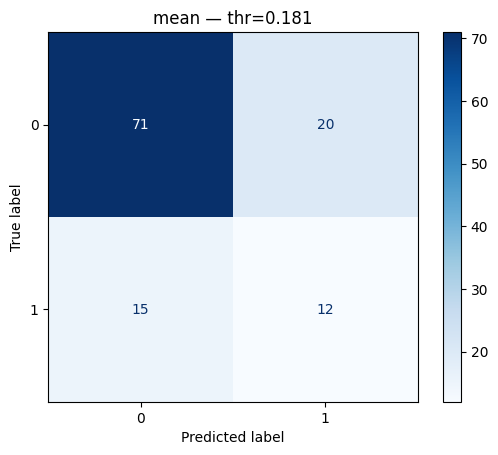


>>> max | thr=0.260 | Acc=0.627 Prec=0.302 Rec=0.481 F1=0.371


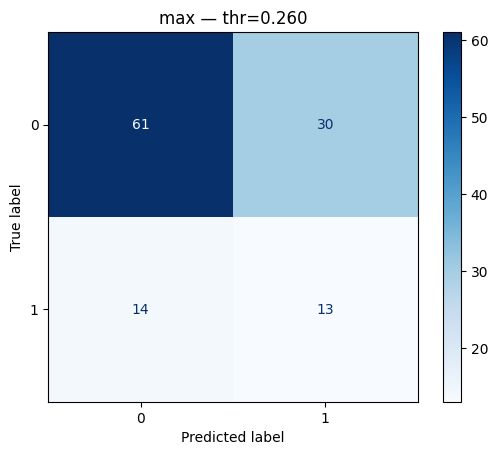


>>> topk_mean_k3 | thr=0.196 | Acc=0.686 Prec=0.361 Rec=0.481 F1=0.413


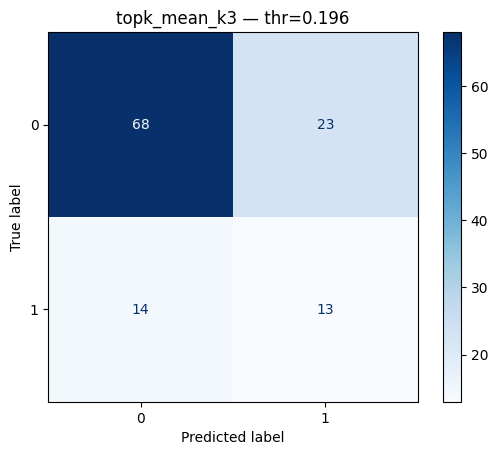


>>> topk_mean_k5 | thr=0.181 | Acc=0.686 Prec=0.353 Rec=0.444 F1=0.393


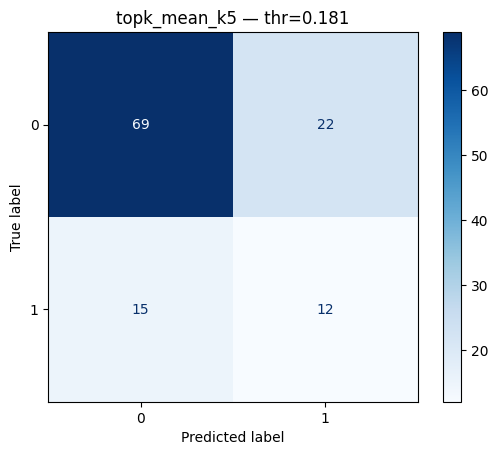


>>> topk_mean_k10 | thr=0.181 | Acc=0.703 Prec=0.375 Rec=0.444 F1=0.407


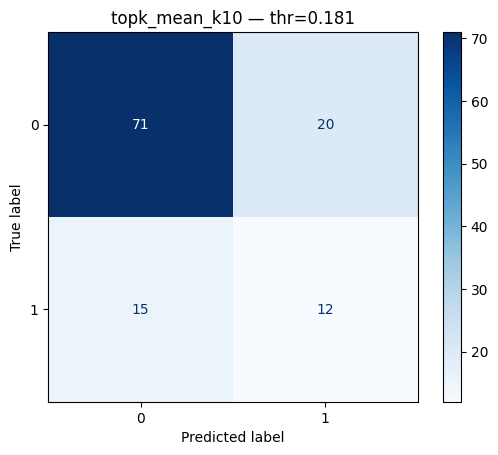


>>> any_vote_thr0.3 | thr=0.300 | Acc=0.661 Prec=0.324 Rec=0.444 F1=0.375


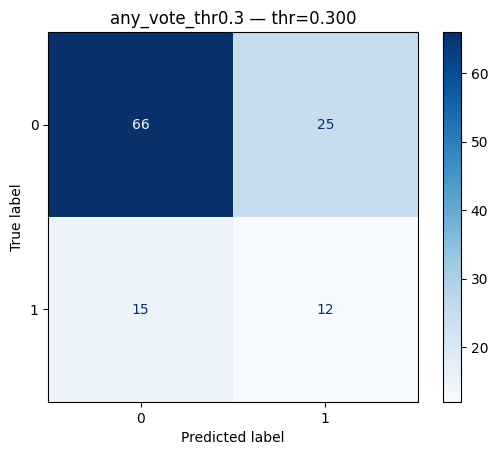


=== Resumen TEST (ordenado por F1 y luego Recall) ===


,estrategia,thr,acc,prec,rec,f1
2,topk_mean_k3,0.196229,0.686441,0.361111,0.481481,0.412698
0,mean,0.181382,0.703390,0.375000,0.444444,0.406780
4,topk_mean_k10,0.181382,0.703390,0.375000,0.444444,0.406780
3,topk_mean_k5,0.181382,0.686441,0.352941,0.444444,0.393443
5,any_vote_thr0.3,0.300000,0.661017,0.324324,0.444444,0.375000
1,max,0.260061,0.627119,0.302326,0.481481,0.371429


In [9]:
# ============================================================
# XGBoost (chunk-level) + Agregación por llamada (mean/max/topk_mean/any_vote)
# - Split por llamada (sin fuga)
# - OOF por llamada (umbral global por estrategia: max F1 clase 1)
# - Evaluación en TEST
# ============================================================

# --- Config del usuario ---
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
CHUNK_TOKENS = 480
CHUNK_STRIDE = 64

# --- Imports ---
import warnings, logging, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay,
    classification_report
)
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
logging.getLogger("transformers").setLevel(logging.ERROR)

# --- Helpers: limpieza y chunking ultra-seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer

# Crea embedder/tok una sola vez
if 'embedder' not in globals():
    embedder = SentenceTransformer(EMB_MODEL)
    embedder.max_seq_length = 510
if 'tok' not in globals():
    tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def chunk_texts_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE):
    """Devuelve lista de CHUNKS (texto) seguros para >512 tokens."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc.get("input_ids", [])
    if len(ids) == 0:
        return []
    if isinstance(ids[0], list):
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        # re-tokenizar con especiales + trunc a 510
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        safe_txt = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)
        if safe_txt.strip():
            chunks.append(safe_txt)
        if j == len(ids): break
        i = max(j - stride, 0)
    return chunks

def embed_texts(text_list):
    """Embeddings L2-normalizados para una lista de textos."""
    if len(text_list) == 0:
        dim = embedder.get_sentence_embedding_dimension()
        return np.zeros((0, dim), dtype=np.float32)
    E = embedder.encode(text_list, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    E = normalize(E, norm="l2")
    return E

# --- Agregación a nivel llamada ---
def aggregate(df_pred_chunks, how="topk_mean", k=5, chunk_thr=0.3):
    """
    df_pred_chunks: columnas ['call_id','p_chunk']
    Devuelve Serie index=call_id con p_call (o 0/1 para any_vote).
    """
    g = df_pred_chunks.groupby("call_id")["p_chunk"]
    if how == "mean":
        return g.mean()
    elif how == "max":
        return g.max()
    elif how == "topk_mean":
        def topk_mean(x, k=k):
            k = min(k, len(x))
            return np.mean(np.sort(x.values)[-k:])
        return g.apply(lambda s: topk_mean(s, k=k))
    elif how == "any_vote":
        # 1 si algún chunk supera chunk_thr
        return (g.max() >= chunk_thr).astype(int)
    else:
        raise ValueError(f"Estrategia desconocida: {how}")

# --- Selectores de umbral y reporte ---
def best_thr_f1_pos(y_true_bin, p_score):
    prec, rec, thr = precision_recall_curve(y_true_bin, p_score)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k])

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

# --- Datos base ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

# Split por llamada
train_df, test_df = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr_call = train_df[TARGET].values
y_te_call = test_df[TARGET].values
print("Distribución train:", dict(pd.Series(y_tr_call).value_counts().sort_index()))
print("Distribución test :", dict(pd.Series(y_te_call).value_counts().sort_index()))

# --- Construir dataset de CHUNKS para train/test ---
def build_chunk_table(split_df, start_call_id=0):
    """
    Devuelve:
      - X_chunks: np.array [N_chunks, dim]
      - df_chunks: DataFrame con columnas:
            call_id (int), chunk_idx (int), y_call (0/1), p_chunk (placeholder)
    """
    rows = []
    embs = []
    for i, (txt, y) in enumerate(zip(split_df[TEXT].tolist(), split_df[TARGET].tolist())):
        call_id = start_call_id + i
        chunks = chunk_texts_ultrasafe(txt)
        if len(chunks) == 0:  # texto vacío
            chunks = [""]  # un chunk vacío para que no se pierda la llamada
        E = embed_texts(chunks)
        embs.append(E)
        for j in range(E.shape[0]):
            rows.append((call_id, j, int(y)))
    X = np.vstack(embs) if len(embs)>0 else np.zeros((0, embedder.get_sentence_embedding_dimension()), dtype=np.float32)
    dfc = pd.DataFrame(rows, columns=["call_id","chunk_idx","y_call"])
    dfc["p_chunk"] = np.nan
    return X, dfc

X_tr_chunks, df_tr_chunks = build_chunk_table(train_df, start_call_id=0)
X_te_chunks, df_te_chunks = build_chunk_table(test_df,  start_call_id=len(train_df))

# --- Modelo XGBoost a nivel chunk (baseline robusto) ---
xgb_params = dict(
    n_estimators=800,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1.0,
    gamma=0.0,
    reg_lambda=1.0,
    # Nota: como entrenamos por CHUNK y no hacemos oversampling aquí,
    # el desbalance se hereda; se puedeactivar scale_pos_weight
    scale_pos_weight = max(1.0, (df_tr_chunks["y_call"]==0).sum() / max(1,(df_tr_chunks["y_call"]==1).sum())),
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1,
    random_state=SEED
)

# --- OOF a nivel llamada (CV por llamada, predicción por chunk) ---
K = 5
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

# Guardaremos OOF de p_chunk y luego agregamos por llamada
p_chunk_oof = np.full(len(df_tr_chunks), np.nan, dtype=float)

# Mapeo de indices de chunks por call para separar por fold SIN fuga
calls = train_df.reset_index(drop=True)
call_ids_tr = calls.index.values  # 0..n_train-1
call_y_tr = calls[TARGET].values

# Para poder indexar chunks por call_id:
chunk_indices_by_call = df_tr_chunks.groupby("call_id").indices

for tr_call_idx, va_call_idx in skf.split(call_ids_tr, call_y_tr):
    # calls en train/valid
    train_call_ids = set(call_ids_tr[tr_call_idx])
    valid_call_ids = set(call_ids_tr[va_call_idx])

    # Chunks de train/valid
    tr_chunk_idx = np.concatenate([chunk_indices_by_call[cid] for cid in train_call_ids]) if len(train_call_ids)>0 else np.array([], dtype=int)
    va_chunk_idx = np.concatenate([chunk_indices_by_call[cid] for cid in valid_call_ids]) if len(valid_call_ids)>0 else np.array([], dtype=int)

    Xtr, ytr = X_tr_chunks[tr_chunk_idx], df_tr_chunks.loc[tr_chunk_idx, "y_call"].values
    Xva      = X_tr_chunks[va_chunk_idx]

    clf = XGBClassifier(**xgb_params)
    clf.fit(Xtr, ytr)

    p_chunk_oof[va_chunk_idx] = clf.predict_proba(Xva)[:,1]

# Verifica que llenamos todo
assert np.isfinite(p_chunk_oof).all(), "OOF incompleto; revisa el split por llamadas."
df_tr_chunks_oof = df_tr_chunks.copy()
df_tr_chunks_oof["p_chunk"] = p_chunk_oof

# --- Agregación por llamada en OOF y selección de umbral por estrategia ---
strategies = [
    ("mean", {"k": None, "chunk_thr": None}),
    ("max", {"k": None, "chunk_thr": None}),
    ("topk_mean_k3", {"k": 3, "chunk_thr": None}),
    ("topk_mean_k5", {"k": 5, "chunk_thr": None}),
    ("topk_mean_k10", {"k": 10, "chunk_thr": None}),
    ("any_vote_thr0.3", {"k": None, "chunk_thr": 0.3}),
]

# y_true_call (OOF) es el de train_df
y_true_call_tr = train_df[TARGET].values
call_ids_tr_full = train_df.reset_index(drop=True).index.values  # 0..n_train-1

def df_chunks_to_call_probs(df_chunks_pred, how, k=None, chunk_thr=None):
    # df_chunks_pred tiene call_id relativos a train (0..n_train-1)
    p_call = aggregate(df_chunks_pred[["call_id","p_chunk"]], how=how, k=k, chunk_thr=chunk_thr)
    # Asegurar alineación con todos los calls (si alguno quedó sin chunks, lo llenamos con 0)
    p_call = p_call.reindex(call_ids_tr_full).fillna(0.0)
    return p_call.values

res_oof = []
best_by_strategy = {}

print("\n=== Selección de umbral por estrategia (OOF por llamada) ===")
for name, cfg in strategies:
    k = cfg.get("k", None)
    thr_c = cfg.get("chunk_thr", None)

    if name.startswith("any_vote"):
        # any_vote devuelve 0/1 ya binario, no se optimiza umbral
        p_call_tr = aggregate(df_tr_chunks_oof[["call_id","p_chunk"]], how="any_vote", chunk_thr=thr_c)
        p_call_tr = p_call_tr.reindex(call_ids_tr_full).fillna(0.0).values
        yhat_tr = p_call_tr.astype(int)
        thr_opt = float(thr_c)
        # Métricas OOF (no F1 binario con umbral, ya viene binario)
        prec = precision_score(y_true_call_tr, yhat_tr, zero_division=0)
        rec  = recall_score(y_true_call_tr, yhat_tr, zero_division=0)
        f1   = f1_score(y_true_call_tr, yhat_tr, zero_division=0)
    else:
        # estrategias continuas: buscamos umbral óptimo por F1
        how = "max" if name=="max" else ("mean" if name=="mean" else "topk_mean")
        p_call_tr = df_chunks_to_call_probs(df_tr_chunks_oof, how=how, k=k, chunk_thr=None)
        thr_opt, f1 = best_thr_f1_pos((y_true_call_tr==1).astype(int), p_call_tr)
        yhat_tr = (p_call_tr >= thr_opt).astype(int)
        prec = precision_score(y_true_call_tr, yhat_tr, zero_division=0)
        rec  = recall_score(y_true_call_tr, yhat_tr, zero_division=0)

    print(f"{name:14s} thr={thr_opt:.3f} | OOF Prec_1={prec:.3f} Rec_1={rec:.3f} F1_1={f1:.3f}")
    res_oof.append({"estrategia": name, "thr": thr_opt, "prec_oof": prec, "rec_oof": rec, "f1_oof": f1})
    best_by_strategy[name] = dict(thr=thr_opt, k=k, chunk_thr=thr_c)

df_oof = pd.DataFrame(res_oof).sort_values(["f1_oof","rec_oof"], ascending=[False, False])
print("\n=== Ranking OOF por estrategia (clase 1) ===")
display(df_oof)

# --- Entrenar modelo FINAL en TODOS los chunks de train y predecir en chunks de test ---
clf_final = XGBClassifier(**xgb_params).fit(X_tr_chunks, df_tr_chunks["y_call"].values)
df_te_chunks_pred = df_te_chunks.copy()
df_te_chunks_pred["p_chunk"] = clf_final.predict_proba(X_te_chunks)[:,1]

# --- Evaluación en TEST por estrategia ---
y_true_call_te = test_df[TARGET].values
call_ids_te = test_df.reset_index(drop=True).index.values  # 0..n_test-1 (pero en df_te_chunks, los call_id arrancan en len(train_df))

# Normalizamos call_id de test a 0..n_test-1 para agrupar fácil
df_te_chunks_pred_norm = df_te_chunks_pred.copy()
df_te_chunks_pred_norm["call_id"] = df_te_chunks_pred_norm["call_id"] - len(train_df)

res_test = []
for name, cfg in strategies:
    k = cfg.get("k", None)
    thr_c = cfg.get("chunk_thr", None)
    thr_use = best_by_strategy[name]["thr"]

    if name.startswith("any_vote"):
        p_call_te = aggregate(df_te_chunks_pred_norm[["call_id","p_chunk"]], how="any_vote", chunk_thr=thr_c)
        p_call_te = p_call_te.reindex(range(len(test_df))).fillna(0.0).values
        yhat_te = p_call_te.astype(int)
    else:
        how = "max" if name=="max" else ("mean" if name=="mean" else "topk_mean")
        p_call_te = aggregate(df_te_chunks_pred_norm[["call_id","p_chunk"]], how=how, k=k)
        p_call_te = p_call_te.reindex(range(len(test_df))).fillna(0.0).values
        yhat_te = (p_call_te >= thr_use).astype(int)

    acc  = accuracy_score(y_true_call_te, yhat_te)
    prec = precision_score(y_true_call_te, yhat_te, zero_division=0)
    rec  = recall_score(y_true_call_te, yhat_te, zero_division=0)
    f1   = f1_score(y_true_call_te, yhat_te, zero_division=0)

    print(f"\n>>> {name} | thr={thr_use:.3f} | Acc={acc:.3f} Prec={prec:.3f} Rec={rec:.3f} F1={f1:.3f}")
    cm = confusion_matrix(y_true_call_te, yhat_te)
    ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d"); plt.title(f"{name} — thr={thr_use:.3f}"); plt.show()

    res_test.append({"estrategia": name, "thr": thr_use, "acc": acc, "prec": prec, "rec": rec, "f1": f1})

df_comp = pd.DataFrame(res_test).sort_values(["f1","rec"], ascending=[False, False])
print("\n=== Resumen TEST (ordenado por F1 y luego Recall) ===")
display(df_comp)


Distribución train: {0: 364, 1: 105}
Distribución test : {0: 91, 1: 27}

=== LogReg (class_weight=balanced) | thr=0.5 (target=neg) ===


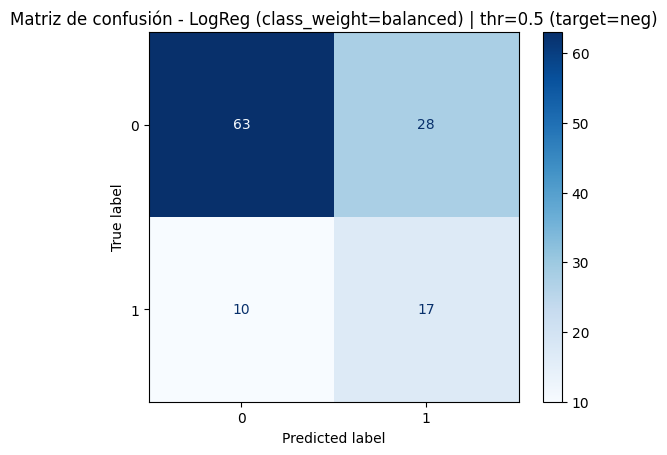

[pos=POSITIVA(1)]  Acc=0.6780 | Prec=0.3778 | Recall=0.6296 | F1=0.4722
[pos=POSITIVA(1)]  Acc=0.6780 | Prec=0.3778 | Recall=0.6296 | F1=0.4722

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8630    0.6923    0.7683        91
           1     0.3778    0.6296    0.4722        27

    accuracy                         0.6780       118
   macro avg     0.6204    0.6610    0.6203       118
weighted avg     0.7520    0.6780    0.7005       118


=== LogReg (class_weight=balanced) | thr=F1_neg=0.498 ===


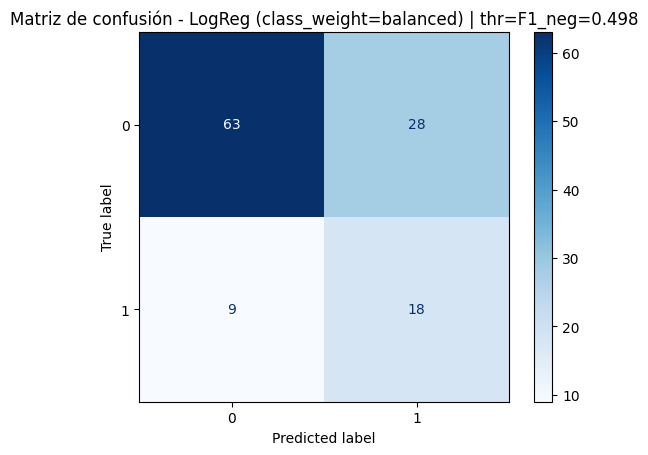

[pos=POSITIVA(1)]  Acc=0.6864 | Prec=0.3913 | Recall=0.6667 | F1=0.4932
[pos=POSITIVA(1)]  Acc=0.6864 | Prec=0.3913 | Recall=0.6667 | F1=0.4932

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8750    0.6923    0.7730        91
           1     0.3913    0.6667    0.4932        27

    accuracy                         0.6864       118
   macro avg     0.6332    0.6795    0.6331       118
weighted avg     0.7643    0.6864    0.7090       118


=== LogReg (class_weight=balanced) | thr=RecallNeg≥0.80 -> 0.423 ===


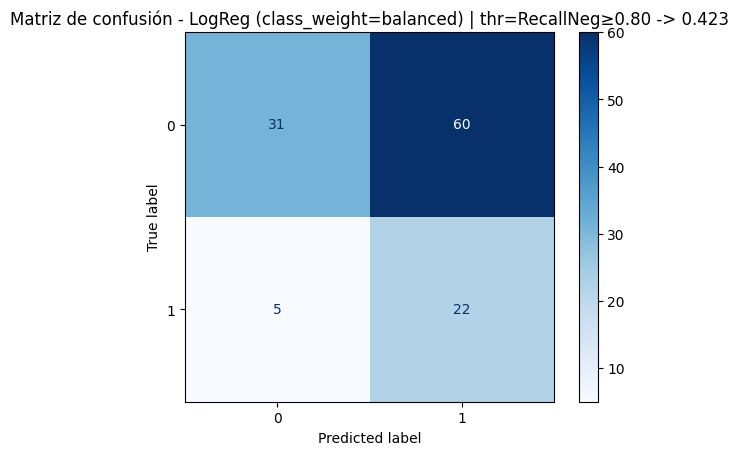

[pos=POSITIVA(1)]  Acc=0.4492 | Prec=0.2683 | Recall=0.8148 | F1=0.4037
[pos=POSITIVA(1)]  Acc=0.4492 | Prec=0.2683 | Recall=0.8148 | F1=0.4037

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8611    0.3407    0.4882        91
           1     0.2683    0.8148    0.4037        27

    accuracy                         0.4492       118
   macro avg     0.5647    0.5777    0.4459       118
weighted avg     0.7255    0.4492    0.4688       118


=== LogReg + ADASYN | thr=0.5 (target=neg) ===


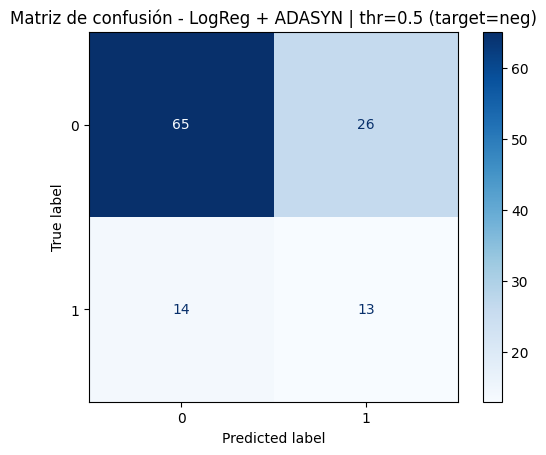

[pos=POSITIVA(1)]  Acc=0.6610 | Prec=0.3333 | Recall=0.4815 | F1=0.3939
[pos=POSITIVA(1)]  Acc=0.6610 | Prec=0.3333 | Recall=0.4815 | F1=0.3939

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8228    0.7143    0.7647        91
           1     0.3333    0.4815    0.3939        27

    accuracy                         0.6610       118
   macro avg     0.5781    0.5979    0.5793       118
weighted avg     0.7108    0.6610    0.6799       118


=== LogReg + ADASYN | thr=F1_neg=0.436 ===


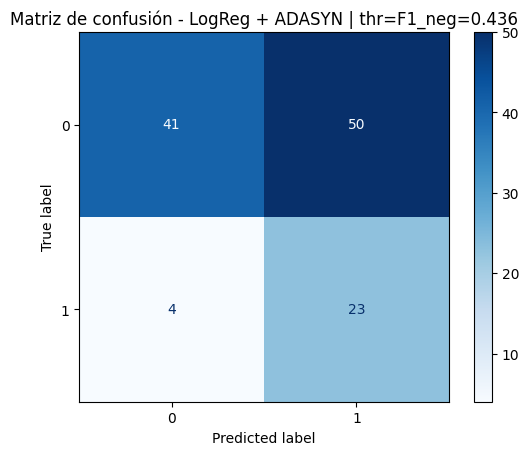

[pos=POSITIVA(1)]  Acc=0.5424 | Prec=0.3151 | Recall=0.8519 | F1=0.4600
[pos=POSITIVA(1)]  Acc=0.5424 | Prec=0.3151 | Recall=0.8519 | F1=0.4600

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9111    0.4505    0.6029        91
           1     0.3151    0.8519    0.4600        27

    accuracy                         0.5424       118
   macro avg     0.6131    0.6512    0.5315       118
weighted avg     0.7747    0.5424    0.5702       118


=== LogReg + ADASYN | thr=RecallNeg≥0.80 -> 0.436 ===


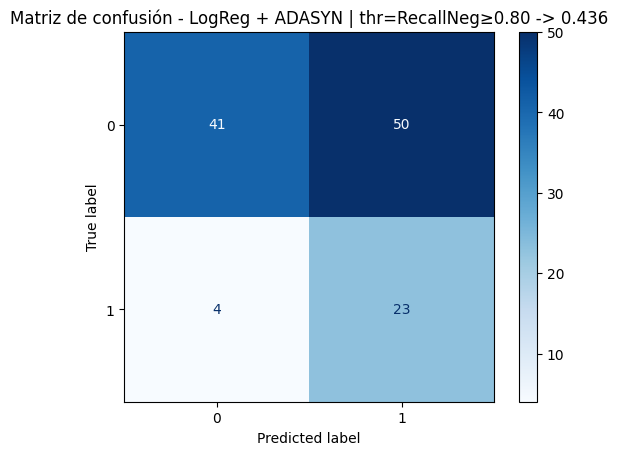

[pos=POSITIVA(1)]  Acc=0.5424 | Prec=0.3151 | Recall=0.8519 | F1=0.4600
[pos=POSITIVA(1)]  Acc=0.5424 | Prec=0.3151 | Recall=0.8519 | F1=0.4600

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9111    0.4505    0.6029        91
           1     0.3151    0.8519    0.4600        27

    accuracy                         0.5424       118
   macro avg     0.6131    0.6512    0.5315       118
weighted avg     0.7747    0.5424    0.5702       118


=== RandomForest (balanced_subsample) | thr=0.5 (target=neg) ===


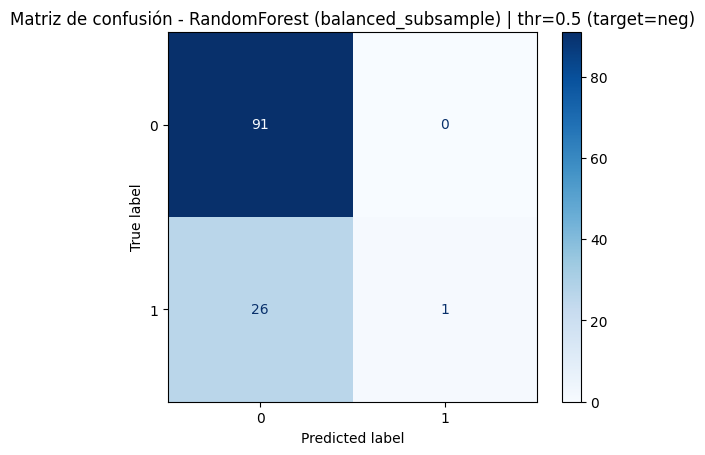

[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714
[pos=POSITIVA(1)]  Acc=0.7797 | Prec=1.0000 | Recall=0.0370 | F1=0.0714

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7778    1.0000    0.8750        91
           1     1.0000    0.0370    0.0714        27

    accuracy                         0.7797       118
   macro avg     0.8889    0.5185    0.4732       118
weighted avg     0.8286    0.7797    0.6911       118


=== RandomForest (balanced_subsample) | thr=F1_neg=0.235 ===


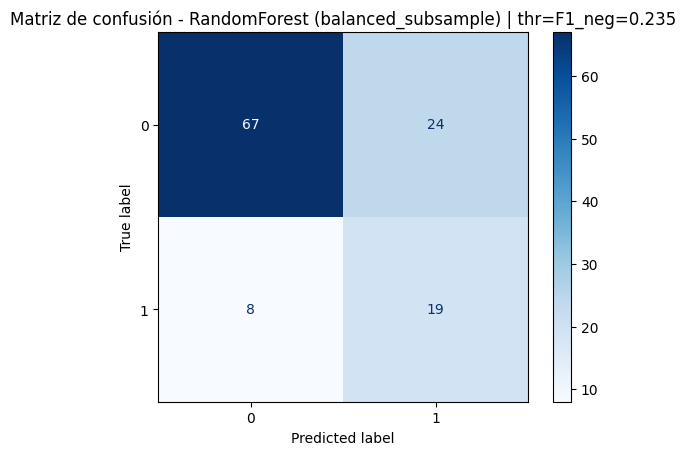

[pos=POSITIVA(1)]  Acc=0.7288 | Prec=0.4419 | Recall=0.7037 | F1=0.5429
[pos=POSITIVA(1)]  Acc=0.7288 | Prec=0.4419 | Recall=0.7037 | F1=0.5429

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8933    0.7363    0.8072        91
           1     0.4419    0.7037    0.5429        27

    accuracy                         0.7288       118
   macro avg     0.6676    0.7200    0.6750       118
weighted avg     0.7900    0.7288    0.7467       118


=== RandomForest (balanced_subsample) | thr=RecallNeg≥0.80 -> 0.190 ===


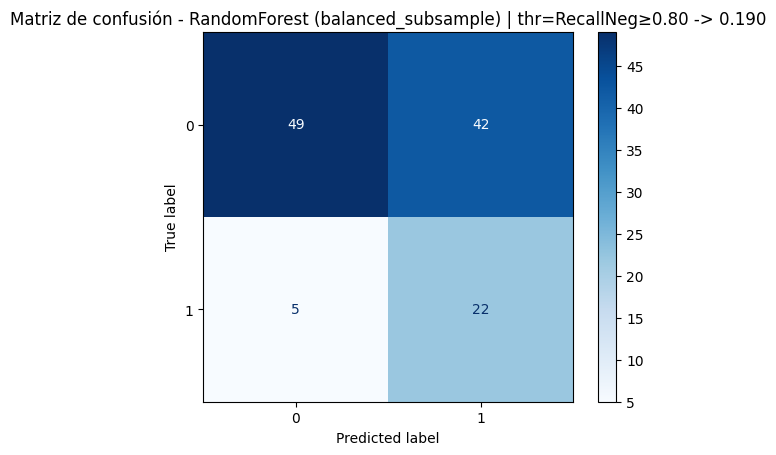

[pos=POSITIVA(1)]  Acc=0.6017 | Prec=0.3438 | Recall=0.8148 | F1=0.4835
[pos=POSITIVA(1)]  Acc=0.6017 | Prec=0.3438 | Recall=0.8148 | F1=0.4835

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9074    0.5385    0.6759        91
           1     0.3438    0.8148    0.4835        27

    accuracy                         0.6017       118
   macro avg     0.6256    0.6766    0.5797       118
weighted avg     0.7784    0.6017    0.6319       118


=== RandomForest + ADASYN | thr=0.5 (target=neg) ===


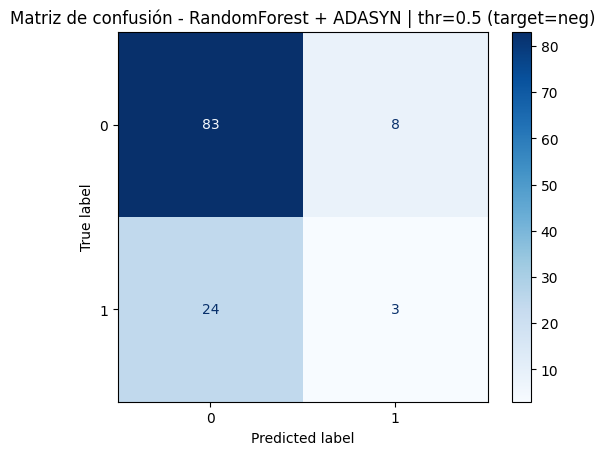

[pos=POSITIVA(1)]  Acc=0.7288 | Prec=0.2727 | Recall=0.1111 | F1=0.1579
[pos=POSITIVA(1)]  Acc=0.7288 | Prec=0.2727 | Recall=0.1111 | F1=0.1579

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.7757    0.9121    0.8384        91
           1     0.2727    0.1111    0.1579        27

    accuracy                         0.7288       118
   macro avg     0.5242    0.5116    0.4981       118
weighted avg     0.6606    0.7288    0.6827       118


=== RandomForest + ADASYN | thr=F1_neg=0.357 ===


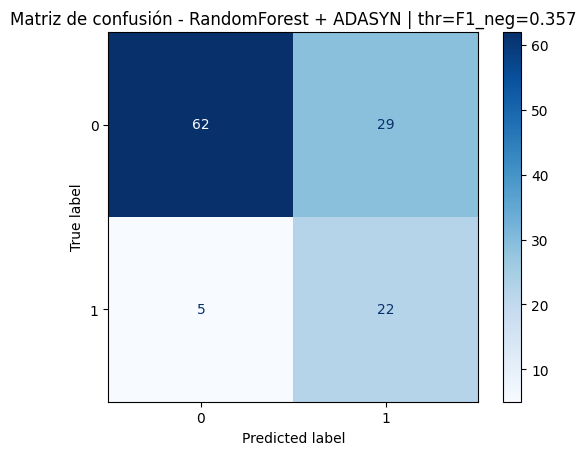

[pos=POSITIVA(1)]  Acc=0.7119 | Prec=0.4314 | Recall=0.8148 | F1=0.5641
[pos=POSITIVA(1)]  Acc=0.7119 | Prec=0.4314 | Recall=0.8148 | F1=0.5641

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9254    0.6813    0.7848        91
           1     0.4314    0.8148    0.5641        27

    accuracy                         0.7119       118
   macro avg     0.6784    0.7481    0.6745       118
weighted avg     0.8123    0.7119    0.7343       118


=== RandomForest + ADASYN | thr=RecallNeg≥0.80 -> 0.357 ===


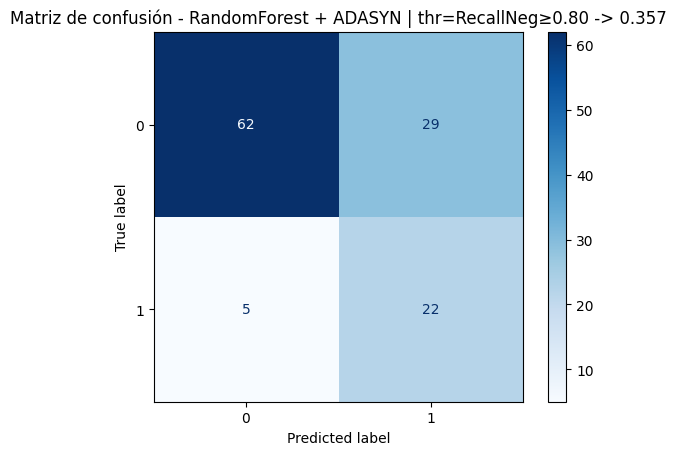

[pos=POSITIVA(1)]  Acc=0.7119 | Prec=0.4314 | Recall=0.8148 | F1=0.5641
[pos=POSITIVA(1)]  Acc=0.7119 | Prec=0.4314 | Recall=0.8148 | F1=0.5641

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9254    0.6813    0.7848        91
           1     0.4314    0.8148    0.5641        27

    accuracy                         0.7119       118
   macro avg     0.6784    0.7481    0.6745       118
weighted avg     0.8123    0.7119    0.7343       118


=== EasyEnsembleClassifier | thr=0.5 (target=neg) ===


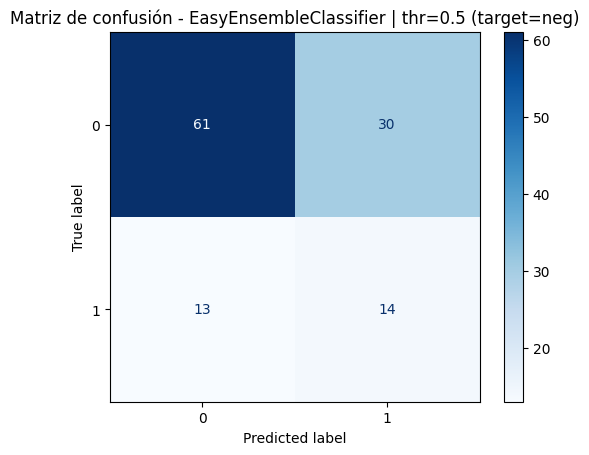

[pos=POSITIVA(1)]  Acc=0.6356 | Prec=0.3182 | Recall=0.5185 | F1=0.3944
[pos=POSITIVA(1)]  Acc=0.6356 | Prec=0.3182 | Recall=0.5185 | F1=0.3944

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.8243    0.6703    0.7394        91
           1     0.3182    0.5185    0.3944        27

    accuracy                         0.6356       118
   macro avg     0.5713    0.5944    0.5669       118
weighted avg     0.7085    0.6356    0.6604       118


=== EasyEnsembleClassifier | thr=F1_neg=0.465 ===


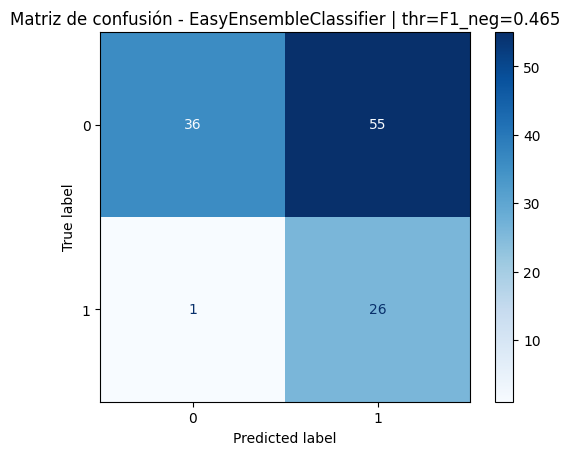

[pos=POSITIVA(1)]  Acc=0.5254 | Prec=0.3210 | Recall=0.9630 | F1=0.4815
[pos=POSITIVA(1)]  Acc=0.5254 | Prec=0.3210 | Recall=0.9630 | F1=0.4815

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9730    0.3956    0.5625        91
           1     0.3210    0.9630    0.4815        27

    accuracy                         0.5254       118
   macro avg     0.6470    0.6793    0.5220       118
weighted avg     0.8238    0.5254    0.5440       118


=== EasyEnsembleClassifier | thr=RecallNeg≥0.80 -> 0.479 ===


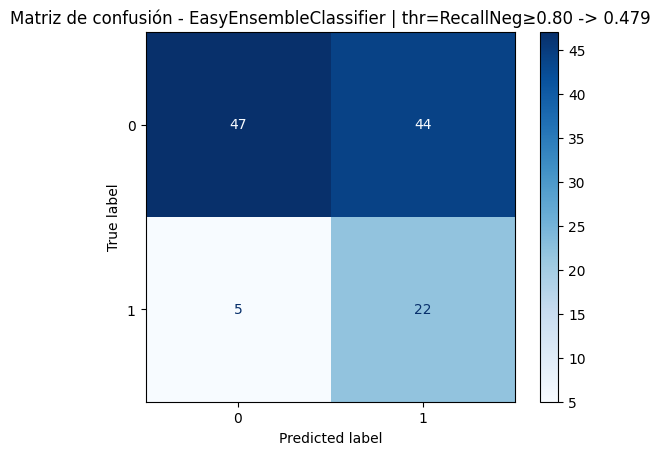

[pos=POSITIVA(1)]  Acc=0.5847 | Prec=0.3333 | Recall=0.8148 | F1=0.4731
[pos=POSITIVA(1)]  Acc=0.5847 | Prec=0.3333 | Recall=0.8148 | F1=0.4731

Reporte detallado por clase:
              precision    recall  f1-score   support

           0     0.9038    0.5165    0.6573        91
           1     0.3333    0.8148    0.4731        27

    accuracy                         0.5847       118
   macro avg     0.6186    0.6656    0.5652       118
weighted avg     0.7733    0.5847    0.6152       118


=== Resumen (pos_label=NEG_CLASS) ===


,modelo,thr_0.5,acc_0.5,prec_0.5,rec_0.5,f1_0.5,thr_f1neg,acc_f1neg,prec_f1neg,rec_f1neg,f1_f1neg,thr_rec80,acc_rec80,prec_rec80,rec_rec80,f1_rec80
0,RandomForest + ADASYN,0.5,0.728814,0.272727,0.111111,0.157895,0.357500,0.711864,0.431373,0.814815,0.564103,0.357500,0.711864,0.431373,0.814815,0.564103
1,RandomForest (balanced_subsample),0.5,0.779661,1.000000,0.037037,0.071429,0.235000,0.728814,0.441860,0.703704,0.542857,0.190000,0.601695,0.343750,0.814815,0.483516
2,EasyEnsembleClassifier,0.5,0.635593,0.318182,0.518519,0.394366,0.464560,0.525424,0.320988,0.962963,0.481481,0.479185,0.584746,0.333333,0.814815,0.473118
3,LogReg + ADASYN,0.5,0.661017,0.333333,0.481481,0.393939,0.436085,0.542373,0.315068,0.851852,0.460000,0.436085,0.542373,0.315068,0.851852,0.460000
4,LogReg (class_weight=balanced),0.5,0.677966,0.377778,0.629630,0.472222,0.498164,0.686441,0.391304,0.666667,0.493151,0.422968,0.449153,0.268293,0.814815,0.403670


In [10]:
# ===============================================
# Embeddings + (ADASYN / RF / EasyEnsemble)
# Enfocado en maximizar RECALL de la clase NEGATIVA (label=0)
# ===============================================

# --- 0) Imports y Config ---
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier  # también puedes probar BalancedRandomForestClassifier

# === Config del usuario ===
TARGET = "4.2 Explica medios de pago"
TEXT   = "transcripcion"
TEST_SIZE = 0.2
SEED = 42

EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
CHUNK_TOKENS = 480
CHUNK_STRIDE = 64

# === Clase objetivo para maximizar recall ===
NEG_CLASS = 1                    # <<-- negativos
TARGET_RECALL_NEG = 0.80         # <<-- umbral deseado de recall para la clase

# --- 1) Helpers de limpieza y embeddings con chunking seguro ---
def clean(t: str) -> str:
    return re.sub(r"\s+"," ", str(t).strip())

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
embedder = SentenceTransformer(EMB_MODEL)
embedder.max_seq_length = 510  # seguridad para ST
tok = AutoTokenizer.from_pretrained(EMB_MODEL)

def embed_ultrasafe(text: str, max_len: int = CHUNK_TOKENS, stride: int = CHUNK_STRIDE) -> np.ndarray:
    """Chunking con doble seguridad + mean-pooling + renormalización final."""
    enc = tok(text, add_special_tokens=False, truncation=False)
    ids = enc["input_ids"]
    if isinstance(ids[0], list):  # por si devuelve batch
        ids = ids[0]

    chunks = []
    i = 0
    while i < len(ids):
        j = min(i + max_len, len(ids))
        # 1) cortar sin especiales
        piece_ids = ids[i:j]
        piece = tok.decode(piece_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

        # 2) re-tokenizar con especiales y truncación a 510
        t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
        piece_safe = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)

        if piece_safe.strip():
            chunks.append(piece_safe)

        if j == len(ids): break
        i = max(j - stride, 0)

    if not chunks:
        chunks = [text]

    E = embedder.encode(chunks, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
    em = E.mean(axis=0, keepdims=True)
    em = normalize(em, norm="l2").ravel()  # renormaliza el promedio
    return em

# --- 2) Funciones de evaluación/umbral centradas en NEG_CLASS ---
def predict_with_threshold_for_class(y_score_label1: np.ndarray, thr: float, target_class: int) -> np.ndarray:
    """
    Aplica un umbral a la probabilidad de la clase target (target_class).
    Para target_class=0 usamos p0 = 1 - p1; para target_class=1 usamos p1.
    Retorna yhat en {0,1} (etiquetas originales).
    """
    if target_class == 1:
        p_target = y_score_label1
    else:
        p_target = 1.0 - y_score_label1
    yhat_target = (p_target >= thr).astype(int)
    # mapear: 1 -> target_class, 0 -> clase contraria
    return np.where(yhat_target == 1, target_class, 1 - target_class)

def best_threshold_max_f1_of_class(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int) -> float:
    """
    Busca el umbral que maximiza F1 para la 'target_class' (0 o 1).
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)
    f1 = (2 * prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
    k = f1.argmax()
    return float(thr[k])

def best_threshold_for_target_recall(y_true: np.ndarray, y_score_label1: np.ndarray, target_class: int, target_recall: float) -> float:
    """
    Busca un umbral que logre al menos 'target_recall' para la 'target_class'
    y, entre los que lo logran, maximiza la precisión.
    Si ninguno lo logra, elige el umbral que mayor recall consigue.
    """
    y_bin = (y_true == target_class).astype(int)
    p_target = y_score_label1 if target_class == 1 else (1.0 - y_score_label1)
    prec, rec, thr = precision_recall_curve(y_bin, p_target)

    # candidatos con recall >= objetivo
    idx = np.where(rec[:-1] >= target_recall)[0]
    if len(idx) > 0:
        # elige el que tenga mayor precisión
        best_i = idx[np.argmax(prec[idx])]
        return float(thr[best_i])
    else:
        # no se alcanza el recall objetivo: elige el de mayor recall posible
        best_i = np.argmax(rec[:-1])
        return float(thr[best_i])

def evaluate(y_true: np.ndarray, y_pred: np.ndarray, title: str = ""):
    """Imprime matriz + métricas, con foco en NEG_CLASS y también reporte completo."""
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de confusión - {title}")
    plt.show()

    # Métricas tomando POS_LABEL=0 (negativa) y POS_LABEL=1 (estándar)
    for pos_lab in [NEG_CLASS, 1]:
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        rec  = recall_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        f1   = f1_score(y_true, y_pred, pos_label=pos_lab, zero_division=0)
        tag = "NEGATIVA(0)" if pos_lab == 0 else "POSITIVA(1)"
        print(f"[pos={tag}]  Acc={acc:.4f} | Prec={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

    print("\nReporte detallado por clase:")
    print(classification_report(y_true, y_pred, digits=4))

# --- 3) Cargar/limpiar datos, split estratificado ---
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

train, test = train_test_split(
    data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
)
y_tr = train[TARGET].values
y_te = test[TARGET].values
print("Distribución train:", pd.Series(y_tr).value_counts().sort_index().to_dict())
print("Distribución test :", pd.Series(y_te).value_counts().sort_index().to_dict())

# --- 4) Embeddings (chunking seguro) ---
X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# --- 5) Experimentos ---
resultados = []

def run_and_record(name, clf, Xtr, ytr, Xval, yval, tune_mode="f1_neg"):
    """
    Entrena clf, obtiene proba de clase 1, y evalúa:
    - thr=0.5
    - thr que maximiza F1 de la NEG_CLASS
    - thr para alcanzar TARGET_RECALL_NEG (si tune_mode == 'target_recall')
    Retorna una fila de resultados y muestra matrices.
    """
    clf.fit(Xtr, ytr)
    if hasattr(clf, "predict_proba"):
        p1 = clf.predict_proba(Xval)[:,1]
    else:
        # fallback para modelos sin predict_proba: usar decision_function -> minmax a [0,1]
        if hasattr(clf, "decision_function"):
            s = clf.decision_function(Xval)
            s = (s - s.min()) / (s.max() - s.min() + 1e-12)
            p1 = s
        else:
            # sin scores: usamos predicción directa (no recomendable)
            yhat = clf.predict(Xval)
            p1 = (yhat == 1).astype(float)

    # 0) Umbral 0.5 tomando NEG_CLASS como target al evaluar
    yhat_05 = predict_with_threshold_for_class(p1, thr=0.5, target_class=NEG_CLASS)
    evaluate(yval, yhat_05, title=f"{name} | thr=0.5 (target=neg)")

    # 1) Umbral que maximiza F1 de la negativa
    thr_f1neg = best_threshold_max_f1_of_class(yval, p1, target_class=NEG_CLASS)
    yhat_f1neg = predict_with_threshold_for_class(p1, thr=thr_f1neg, target_class=NEG_CLASS)
    evaluate(yval, yhat_f1neg, title=f"{name} | thr=F1_neg={thr_f1neg:.3f}")

    # 2) Umbral para alcanzar recall objetivo de la negativa
    thr_recneg = best_threshold_for_target_recall(yval, p1, target_class=NEG_CLASS, target_recall=TARGET_RECALL_NEG)
    yhat_recneg = predict_with_threshold_for_class(p1, thr=thr_recneg, target_class=NEG_CLASS)
    evaluate(yval, yhat_recneg, title=f"{name} | thr=RecallNeg≥{TARGET_RECALL_NEG:.2f} -> {thr_recneg:.3f}")

    # Métricas resumidas (con pos_label=NEG_CLASS) para tabla
    def metrics(ytrue, ypred):
        return dict(
            acc=accuracy_score(ytrue, ypred),
            prec=precision_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
            rec=recall_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
            f1=f1_score(ytrue, ypred, pos_label=NEG_CLASS, zero_division=0),
        )

    m05   = metrics(yval, yhat_05)
    mf1   = metrics(yval, yhat_f1neg)
    mr90  = metrics(yval, yhat_recneg)

    resultados.append({
        "modelo": name,
        "thr_0.5": 0.5, **{f"{k}_0.5": v for k,v in m05.items()},
        "thr_f1neg": thr_f1neg, **{f"{k}_f1neg": v for k,v in mf1.items()},
        f"thr_rec{int(TARGET_RECALL_NEG*100)}": thr_recneg, **{f"{k}_rec{int(TARGET_RECALL_NEG*100)}": v for k,v in mr90.items()},
    })

# --- 5.1) Baseline: LogReg con pesos (sin oversampling) ---
logreg_bal = LogisticRegression(max_iter=2000, solver="lbfgs", class_weight="balanced", random_state=SEED)
run_and_record("LogReg (class_weight=balanced)", logreg_bal, X_tr, y_tr, X_te, y_te)

# --- 5.2) LogReg + ADASYN (oversampling minoritaria) ---
adasyn = ADASYN(random_state=SEED, n_neighbors=3)  # n_neighbors pequeño por dataset
Xtr_ad, ytr_ad = adasyn.fit_resample(X_tr, y_tr)
logreg_adasyn = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=SEED)
run_and_record("LogReg + ADASYN", logreg_adasyn, Xtr_ad, ytr_ad, X_te, y_te)

# --- 5.3) RandomForest (ponderación) ---
rf_bal = RandomForestClassifier(
    n_estimators=400, max_depth=None, n_jobs=-1,
    class_weight="balanced_subsample", random_state=SEED
)
run_and_record("RandomForest (balanced_subsample)", rf_bal, X_tr, y_tr, X_te, y_te)

# --- 5.4) RandomForest + ADASYN ---
rf_adasyn = RandomForestClassifier(
    n_estimators=400, max_depth=None, n_jobs=-1,
    random_state=SEED
)
run_and_record("RandomForest + ADASYN", rf_adasyn, Xtr_ad, ytr_ad, X_te, y_te)

# --- 5.5) EasyEnsemble (submuestreo mayoritaria + boosting por bolsa) ---
# Nota: EasyEnsembleClassifier ya balancea internamente (no uses class_weight ni ADASYN aquí)
eec = EasyEnsembleClassifier(
    n_estimators=10,   # número de bolsas balanceadas
    random_state=SEED
)
run_and_record("EasyEnsembleClassifier", eec, X_tr, y_tr, X_te, y_te)

# (Opcional) BalancedRandomForestClassifier:
# from imblearn.ensemble import BalancedRandomForestClassifier
# brf = BalancedRandomForestClassifier(n_estimators=400, random_state=SEED, n_jobs=-1)
# run_and_record("BalancedRandomForest", brf, X_tr, y_tr, X_te, y_te)

# --- 6) Tabla comparativa ---
df_res = pd.DataFrame(resultados)

# Ordena por el escenario de recall objetivo (o por F1_neg, como prefieras)
rec_pct = int(TARGET_RECALL_NEG * 100)   # p.ej. 80
# Las columnas generadas son acc_rec80, prec_rec80, rec_rec80, f1_rec80 (SIN guion bajo final)
sort_col = f"f1_rec{rec_pct}"

if sort_col not in df_res.columns:
    # fallback: ordena por F1 de la clase negativa (max F1_neg)
    sort_col = "f1_f1neg" if "f1_f1neg" in df_res.columns else None

if sort_col is not None:
    df_res.sort_values(by=sort_col, ascending=False, inplace=True, ignore_index=True)
else:
    # si por alguna razón no están esas columnas, no ordenamos
    pass

print("\n=== Resumen (pos_label=NEG_CLASS) ===")
display(df_res)


=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===


,name,thr_oof,F1_1_OOF,Prec_1_OOF,Rec_1_OOF,acc_test,prec1_test,recall1_test,f1_1_test
0,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.248855,0.498168,0.404762,0.647619,0.728814,0.439024,0.666667,0.529412
1,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.230000,0.503356,0.388601,0.714286,0.711864,0.422222,0.703704,0.527778
2,"ADASYN+RF {'ss': 1.0, 'k': 3, 'n_estimators': ...",0.335000,0.478788,0.351111,0.752381,0.644068,0.377049,0.851852,0.522727
3,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.242500,0.507143,0.405714,0.676190,0.720339,0.428571,0.666667,0.521739
4,"RF_balanced_subsample {'n_estimators': 600, 'm...",0.231667,0.498294,0.388298,0.695238,0.711864,0.418605,0.666667,0.514286
5,"SMOTETomek+RF {'ss': 0.5, 'k': 3, 'n_estimator...",0.362500,0.469314,0.377907,0.619048,0.694915,0.404255,0.703704,0.513514
6,"SMOTETomek+RF {'ss': 1.0, 'k': 3, 'n_estimator...",0.362500,0.469314,0.377907,0.619048,0.694915,0.404255,0.703704,0.513514
7,"ADASYN+RF {'ss': 0.5, 'k': 3, 'n_estimators': ...",0.340000,0.503817,0.420382,0.628571,0.703390,0.409091,0.666667,0.507042
8,"SMOTETomek+RF {'ss': 1.0, 'k': 3, 'n_estimator...",0.356667,0.485714,0.388571,0.647619,0.686441,0.395833,0.703704,0.506667
9,"ADASYN+RF {'ss': 1.0, 'k': 5, 'n_estimators': ...",0.352500,0.474684,0.355450,0.714286,0.661017,0.377358,0.740741,0.500000



Mejor combinación:
- name: RF_balanced_subsample {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
- thr_OOF: 0.249
- TEST: F1_1=0.529 | Rec_1=0.667 | Prec_1=0.439

=== BEST | RF_balanced_subsample {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'} | thr_OOF=0.249 ===


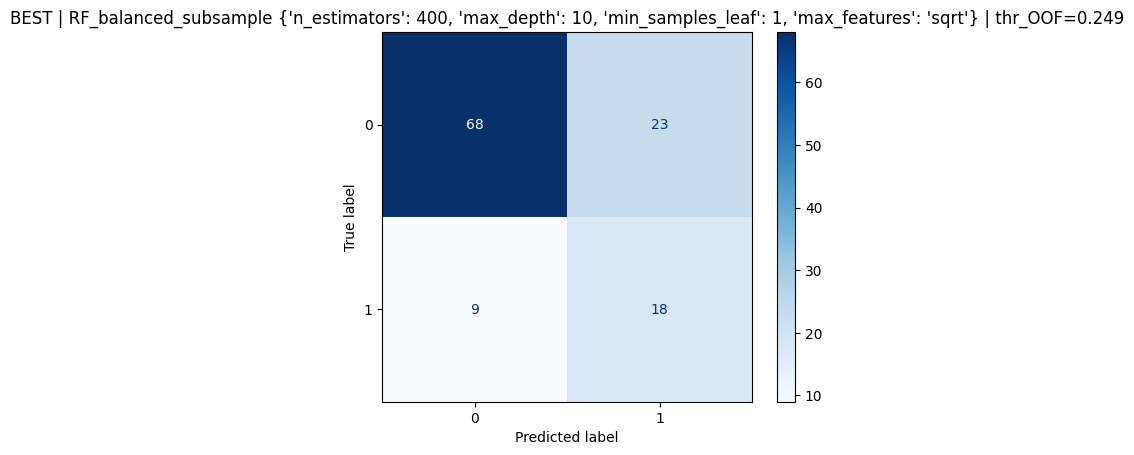

              precision    recall  f1-score   support

           0     0.8831    0.7473    0.8095        91
           1     0.4390    0.6667    0.5294        27

    accuracy                         0.7288       118
   macro avg     0.6611    0.7070    0.6695       118
weighted avg     0.7815    0.7288    0.7454       118

(pos_label=1)  Acc=0.7288 | Prec=0.4390 | Rec=0.6667 | F1=0.5294


In [11]:
# ============================================================
# RF (balanced_subsample) + variantes (grids) + SMOTETomek/ADASYN
# - OOF (por CV) para umbral global que MAXIMIZA F1 de la CLASE 1
# - Reentrena en todo el train y evalúa en TEST
# ============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, warnings
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (precision_recall_curve, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

warnings.filterwarnings("ignore")

# -------- Config --------
TARGET_CLASS = 1
SEED = 42
K_FOLDS = 5

# -------- Helpers --------
def best_thr_maximize_f1(y_true, p1, target_class=1):
    y_bin = (y_true == target_class).astype(int)
    s = p1 if target_class==1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, s)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (float(prec[k]), float(rec[k]))

def predict_with_threshold_for_class(p1, thr, target_class=1):
    s = p1 if target_class==1 else (1.0 - p1)
    yhat_t = (s >= thr).astype(int)
    return np.where(yhat_t==1, target_class, 1-target_class)

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

def oof_probas(estimator_maker, X, y, k_folds=5, seed=42):
    """OOF manual (sin fugas) para cualquier estimador que tenga predict_proba."""
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
    p1_oof = np.zeros(len(y), dtype=float)
    for tr_idx, va_idx in skf.split(X, y):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr      = y[tr_idx]
        est = estimator_maker()
        est.fit(Xtr, ytr)
        p1_oof[va_idx] = est.predict_proba(Xva)[:,1]
    return p1_oof

def eval_combo(name, estimator_maker, X_tr, y_tr, X_te, y_te):
    # 1) OOF → umbral global (max F1_1)
    p1_oof = oof_probas(estimator_maker, X_tr, y_tr, k_folds=K_FOLDS, seed=SEED)
    thr, f1oof, (precoof, recoof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=TARGET_CLASS)
    # 2) Reentrena en TODO el train
    est = estimator_maker().fit(X_tr, y_tr)
    # 3) Evalúa en test con ese umbral
    p1_test = est.predict_proba(X_te)[:,1]
    yhat = predict_with_threshold_for_class(p1_test, thr, target_class=TARGET_CLASS)
    acc  = accuracy_score(y_te, yhat)
    prec = precision_score(y_te, yhat, pos_label=1, zero_division=0)
    rec  = recall_score(y_te, yhat, pos_label=1, zero_division=0)
    f1   = f1_score(y_te, yhat, pos_label=1, zero_division=0)
    return dict(
        name=name, thr_oof=thr, F1_1_OOF=f1oof, Prec_1_OOF=precoof, Rec_1_OOF=recoof,
        acc_test=acc, prec1_test=prec, recall1_test=rec, f1_1_test=f1, est=est
    )

# -------- Datos / embeddings (se calculan si faltan) --------
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

if 'X_tr' not in globals() or 'X_te' not in globals() or 'y_tr' not in globals() or 'y_te' not in globals():
    train, test = train_test_split(
        data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
    )
    y_tr = train[TARGET].values
    y_te = test[TARGET].values
    print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
    print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))
    X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
    X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# ============================================================
# 1) Baseline alrededor de RF balanced_subsample (pequeño grid)
# ============================================================
def make_rf_balanced(n_estimators=400, max_depth=None, min_samples_leaf=1, max_features="sqrt"):
    return RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
    )

rf_grid = [
    dict(n_estimators=300, max_depth=None, min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=1, max_features="sqrt"),  # tu mejor actual
    dict(n_estimators=600, max_depth=None, min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=10,  min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=2, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=1, max_features=0.5),
]

# ============================================================
# 2) SMOTE+Tomek (SMOTETomek) + RF (sin class_weight)
#    - sampling_strategy en {0.5, 1.0}
#    - k_neighbors en {3,5}
#    - RF params cortos
# ============================================================
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks  # opcional, puedes dejar el default

def make_smotetomek_rf(ss=1.0, k=3, n_estimators=400, max_depth=None, min_samples_leaf=1):
    sm = SMOTE(k_neighbors=k, random_state=SEED)                      # aquí seteas k
    tl = TomekLinks(sampling_strategy="auto", n_jobs=-1)              # opcional
    return ImbPipeline(steps=[
        ("sampler", SMOTETomek(
            sampling_strategy=ss, random_state=SEED,
            smote=sm,            # ← pasamos el SMOTE ya configurado
            tomek=tl             # ← o elimina este arg para usar el default
        )),
        ("clf", RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
            n_jobs=-1, random_state=SEED  # sin class_weight (ya balanceado/limpio)
        ))
    ])

st_grid = [
    dict(ss=0.5, k=3, n_estimators=400, max_depth=None, min_samples_leaf=1),
    dict(ss=1.0, k=3, n_estimators=400, max_depth=None, min_samples_leaf=1),
    dict(ss=1.0, k=5, n_estimators=400, max_depth=None, min_samples_leaf=1),
    dict(ss=1.0, k=3, n_estimators=600, max_depth=None, min_samples_leaf=1),
]

# ============================================================
# 3) ADASYN (moderado) + RF (sin class_weight)
#    - sampling_strategy {0.5, 1.0}
#    - k_neighbors {3,5}
# ============================================================
def make_adasyn_rf(ss=0.5, k=3, n_estimators=400, max_depth=None, min_samples_leaf=1):
    return ImbPipeline(steps=[
        ("sampler", ADASYN(random_state=SEED, sampling_strategy=ss, n_neighbors=k)),
        ("clf", RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
            n_jobs=-1, random_state=SEED
        ))
    ])

adasyn_grid = [
    dict(ss=0.5, k=3, n_estimators=400),
    dict(ss=1.0, k=3, n_estimators=400),
    dict(ss=1.0, k=5, n_estimators=400),
]

# ============================================================
# Lanzamos todas las combinaciones
# ============================================================
resultados = []

# 1) RF balanced_subsample (tu baseline extendido)
for p in rf_grid:
    name = f"RF_balanced_subsample {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_rf_balanced(**p), X_tr, y_tr, X_te, y_te)
    )

# 2) SMOTETomek + RF
for p in st_grid:
    name = f"SMOTETomek+RF {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_smotetomek_rf(**p), X_tr, y_tr, X_te, y_te)
    )

# 3) ADASYN + RF
for p in adasyn_grid:
    name = f"ADASYN+RF {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_adasyn_rf(**p), X_tr, y_tr, X_te, y_te)
    )

df_res = pd.DataFrame(resultados).drop(columns=["est"])
df_res = df_res.sort_values(["f1_1_test","recall1_test","prec1_test"], ascending=[False, False, False]).reset_index(drop=True)

print("\n=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===")
display(df_res.head(15))

best_row = df_res.iloc[0]
print(f"\nMejor combinación:\n- name: {best_row['name']}\n- thr_OOF: {best_row['thr_oof']:.3f}\n- TEST: F1_1={best_row['f1_1_test']:.3f} | Rec_1={best_row['recall1_test']:.3f} | Prec_1={best_row['prec1_test']:.3f}")

# --- Reentrena el mejor y muestra matriz de confusión ---
# (volvemos a recrear el estimador por nombre —simple—)
def make_from_name(name):
    if name.startswith("RF_balanced_subsample"):
        # eval del dict dentro del nombre (solo lectura de str conocida por nosotros)
        params = eval(name.replace("RF_balanced_subsample ",""))
        return make_rf_balanced(**params)
    if name.startswith("SMOTETomek+RF"):
        params = eval(name.replace("SMOTETomek+RF ",""))
        return make_smotetomek_rf(**params)
    if name.startswith("ADASYN+RF"):
        params = eval(name.replace("ADASYN+RF ",""))
        return make_adasyn_rf(**params)
    raise ValueError("Nombre no reconocido")

best_est = make_from_name(best_row["name"]).fit(X_tr, y_tr)
p1_test = best_est.predict_proba(X_te)[:,1]
yhat_best = predict_with_threshold_for_class(p1_test, best_row["thr_oof"], target_class=TARGET_CLASS)
report_all(y_te, yhat_best, title=f"BEST | {best_row['name']} | thr_OOF={best_row['thr_oof']:.3f}")



=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===


,name,thr_oof,F1_1_OOF,Prec_1_OOF,Rec_1_OOF,acc_test,prec1_test,recall1_test,f1_1_test
0,"ADASYN+RF {'ss': 0.5, 'k': 3, 'n_estimators': ...",0.342400,0.511450,0.426752,0.638095,0.745763,0.461538,0.666667,0.545455
1,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.248855,0.498168,0.404762,0.647619,0.728814,0.439024,0.666667,0.529412
2,"ADASYN+RF {'ss': 1.0, 'k': 3, 'n_estimators': ...",0.384900,0.486891,0.401235,0.619048,0.728814,0.439024,0.666667,0.529412
3,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.230000,0.503356,0.388601,0.714286,0.711864,0.422222,0.703704,0.527778
4,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.242500,0.507143,0.405714,0.676190,0.720339,0.428571,0.666667,0.521739
5,"RF_balanced_subsample {'n_estimators': 600, 'm...",0.231667,0.498294,0.388298,0.695238,0.711864,0.418605,0.666667,0.514286
6,"SMOTETomek+RF {'ss': 0.5, 'k': 3, 'n_estimator...",0.371467,0.477612,0.392638,0.609524,0.694915,0.395349,0.629630,0.485714
7,"SMOTETomek+RF {'ss': 1.0, 'k': 3, 'n_estimator...",0.371467,0.477612,0.392638,0.609524,0.694915,0.395349,0.629630,0.485714
8,"RF_balanced_subsample {'n_estimators': 400, 'm...",0.275314,0.509653,0.428571,0.628571,0.728814,0.428571,0.555556,0.483871
9,"SMOTETomek+RF {'ss': 1.0, 'k': 5, 'n_estimator...",0.346633,0.493506,0.374384,0.723810,0.627119,0.350877,0.740741,0.476190



Mejor combinación:
- name: ADASYN+RF {'ss': 0.5, 'k': 3, 'n_estimators': 500}
- thr_OOF: 0.342
- TEST: F1_1=0.545 | Rec_1=0.667 | Prec_1=0.462

=== BEST | ADASYN+RF {'ss': 0.5, 'k': 3, 'n_estimators': 500} | thr_OOF=0.342 ===


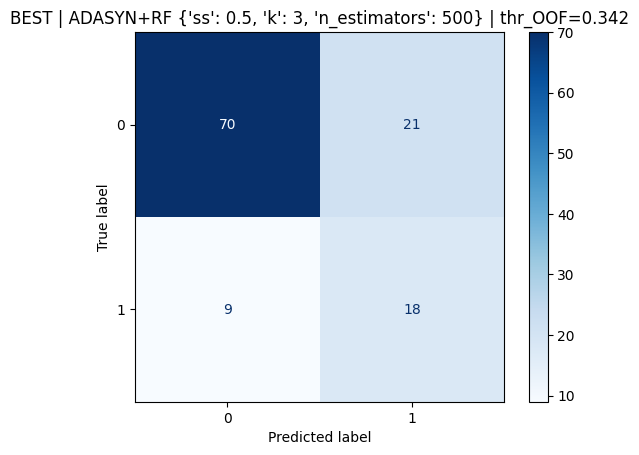

              precision    recall  f1-score   support

           0     0.8861    0.7692    0.8235        91
           1     0.4615    0.6667    0.5455        27

    accuracy                         0.7458       118
   macro avg     0.6738    0.7179    0.6845       118
weighted avg     0.7889    0.7458    0.7599       118

(pos_label=1)  Acc=0.7458 | Prec=0.4615 | Rec=0.6667 | F1=0.5455


In [12]:
# ============================================================
# RF (balanced_subsample) + variantes (grids) + SMOTETomek/ADASYN
# - OOF (por CV) para umbral global que MAXIMIZA F1 de la CLASE 1
# - Reentrena en todo el train y evalúa en TEST
# ============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, warnings
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (precision_recall_curve, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

warnings.filterwarnings("ignore")

# -------- Config --------
TARGET_CLASS = 1
SEED = 42
K_FOLDS = 5

# -------- Helpers --------
def best_thr_maximize_f1(y_true, p1, target_class=1):
    y_bin = (y_true == target_class).astype(int)
    s = p1 if target_class==1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, s)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (float(prec[k]), float(rec[k]))

def predict_with_threshold_for_class(p1, thr, target_class=1):
    s = p1 if target_class==1 else (1.0 - p1)
    yhat_t = (s >= thr).astype(int)
    return np.where(yhat_t==1, target_class, 1-target_class)

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

def oof_probas(estimator_maker, X, y, k_folds=5, seed=42):
    """OOF manual (sin fugas) para cualquier estimador que tenga predict_proba."""
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
    p1_oof = np.zeros(len(y), dtype=float)
    for tr_idx, va_idx in skf.split(X, y):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr      = y[tr_idx]
        est = estimator_maker()
        est.fit(Xtr, ytr)
        p1_oof[va_idx] = est.predict_proba(Xva)[:,1]
    return p1_oof

def eval_combo(name, estimator_maker, X_tr, y_tr, X_te, y_te):
    # 1) OOF → umbral global (max F1_1)
    p1_oof = oof_probas(estimator_maker, X_tr, y_tr, k_folds=K_FOLDS, seed=SEED)
    thr, f1oof, (precoof, recoof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=TARGET_CLASS)
    # 2) Reentrena en TODO el train
    est = estimator_maker().fit(X_tr, y_tr)
    # 3) Evalúa en test con ese umbral
    p1_test = est.predict_proba(X_te)[:,1]
    yhat = predict_with_threshold_for_class(p1_test, thr, target_class=TARGET_CLASS)
    acc  = accuracy_score(y_te, yhat)
    prec = precision_score(y_te, yhat, pos_label=1, zero_division=0)
    rec  = recall_score(y_te, yhat, pos_label=1, zero_division=0)
    f1   = f1_score(y_te, yhat, pos_label=1, zero_division=0)
    return dict(
        name=name, thr_oof=thr, F1_1_OOF=f1oof, Prec_1_OOF=precoof, Rec_1_OOF=recoof,
        acc_test=acc, prec1_test=prec, recall1_test=rec, f1_1_test=f1, est=est
    )

# -------- Datos / embeddings (se calculan si faltan) --------
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

if 'X_tr' not in globals() or 'X_te' not in globals() or 'y_tr' not in globals() or 'y_te' not in globals():
    train, test = train_test_split(
        data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET]
    )
    y_tr = train[TARGET].values
    y_te = test[TARGET].values
    print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
    print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))
    X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
    X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# ============================================================
# 1) Baseline alrededor de RF balanced_subsample (pequeño grid)
# ============================================================
def make_rf_balanced(n_estimators=500, max_depth=None, min_samples_leaf=2, max_features="sqrt"):
    return RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
    )

rf_grid = [
    dict(n_estimators=300, max_depth=None, min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=1, max_features="sqrt"),  # tu mejor actual
    dict(n_estimators=600, max_depth=None, min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=10,  min_samples_leaf=1, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=2, max_features="sqrt"),
    dict(n_estimators=400, max_depth=None, min_samples_leaf=1, max_features=0.5),
]

# ============================================================
# 2) SMOTE+Tomek (SMOTETomek) + RF (sin class_weight)
#    - sampling_strategy en {0.5, 1.0}
#    - k_neighbors en {3,5}
#    - RF params cortos
# ============================================================
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks  # opcional, puedes dejar el default

def make_smotetomek_rf(ss=1.0, k=3, n_estimators=400, max_depth=None, min_samples_leaf=1):
    sm = SMOTE(k_neighbors=k, random_state=SEED)                      # aquí seteas k
    tl = TomekLinks(sampling_strategy="auto", n_jobs=-1)              # opcional
    return ImbPipeline(steps=[
        ("sampler", SMOTETomek(
            sampling_strategy=ss, random_state=SEED,
            smote=sm,            # ← pasamos el SMOTE ya configurado
            tomek=tl             # ← o elimina este arg para usar el default
        )),
        ("clf", RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
            n_jobs=-1, random_state=SEED  # sin class_weight (ya balanceado/limpio)
        ))
    ])

st_grid = [
    dict(ss=0.5, k=3, n_estimators=500, max_depth=None, min_samples_leaf=2),
    dict(ss=1.0, k=3, n_estimators=500, max_depth=None, min_samples_leaf=2),
    dict(ss=1.0, k=5, n_estimators=500, max_depth=None, min_samples_leaf=2),
    dict(ss=1.0, k=3, n_estimators=800, max_depth=None, min_samples_leaf=2),
]

# ============================================================
# 3) ADASYN (moderado) + RF (sin class_weight)
#    - sampling_strategy {0.5, 1.0}
#    - k_neighbors {3,5}
# ============================================================
def make_adasyn_rf(ss=0.5, k=3, n_estimators=500, max_depth=None, min_samples_leaf=2):
    return ImbPipeline(steps=[
        ("sampler", ADASYN(random_state=SEED, sampling_strategy=ss, n_neighbors=k)),
        ("clf", RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
            n_jobs=-1, random_state=SEED
        ))
    ])

adasyn_grid = [
    dict(ss=0.5, k=3, n_estimators=500),
    dict(ss=1.0, k=3, n_estimators=500),
    dict(ss=1.0, k=5, n_estimators=500),
]

# ============================================================
# Lanzamos todas las combinaciones
# ============================================================
resultados = []

# 1) RF balanced_subsample (tu baseline extendido)
for p in rf_grid:
    name = f"RF_balanced_subsample {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_rf_balanced(**p), X_tr, y_tr, X_te, y_te)
    )

# 2) SMOTETomek + RF
for p in st_grid:
    name = f"SMOTETomek+RF {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_smotetomek_rf(**p), X_tr, y_tr, X_te, y_te)
    )

# 3) ADASYN + RF
for p in adasyn_grid:
    name = f"ADASYN+RF {p}"
    resultados.append(
        eval_combo(name, lambda p=p: make_adasyn_rf(**p), X_tr, y_tr, X_te, y_te)
    )

df_res = pd.DataFrame(resultados).drop(columns=["est"])
df_res = df_res.sort_values(["f1_1_test","recall1_test","prec1_test"], ascending=[False, False, False]).reset_index(drop=True)

print("\n=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===")
display(df_res.head(15))

best_row = df_res.iloc[0]
print(f"\nMejor combinación:\n- name: {best_row['name']}\n- thr_OOF: {best_row['thr_oof']:.3f}\n- TEST: F1_1={best_row['f1_1_test']:.3f} | Rec_1={best_row['recall1_test']:.3f} | Prec_1={best_row['prec1_test']:.3f}")

# --- Reentrena el mejor y muestra matriz de confusión ---
# (volvemos a recrear el estimador por nombre —simple—)
def make_from_name(name):
    if name.startswith("RF_balanced_subsample"):
        # eval del dict dentro del nombre (solo lectura de str conocida por nosotros)
        params = eval(name.replace("RF_balanced_subsample ",""))
        return make_rf_balanced(**params)
    if name.startswith("SMOTETomek+RF"):
        params = eval(name.replace("SMOTETomek+RF ",""))
        return make_smotetomek_rf(**params)
    if name.startswith("ADASYN+RF"):
        params = eval(name.replace("ADASYN+RF ",""))
        return make_adasyn_rf(**params)
    raise ValueError("Nombre no reconocido")

best_est = make_from_name(best_row["name"]).fit(X_tr, y_tr)
p1_test = best_est.predict_proba(X_te)[:,1]
yhat_best = predict_with_threshold_for_class(p1_test, best_row["thr_oof"], target_class=TARGET_CLASS)
report_all(y_te, yhat_best, title=f"BEST | {best_row['name']} | thr_OOF={best_row['thr_oof']:.3f}")



=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===


,name,thr_oof,F1_1_OOF,Prec_1_OOF,Rec_1_OOF,acc_test,prec1_test,recall1_test,f1_1_test
0,"XGB(md=4,lr=0.05,ne=800)",0.084824,0.489209,0.393064,0.647619,0.720339,0.431818,0.703704,0.535211
1,"BalancedRandomForest(min_leaf=2,800)",0.539167,0.500000,0.393443,0.685714,0.703390,0.416667,0.740741,0.533333
2,"XGB(md=3,lr=0.05,ne=800)",0.062245,0.490066,0.375635,0.704762,0.686441,0.400000,0.740741,0.519481
3,"LGBM(unbalance,ne=1200,lr=0.03)",0.000515,0.455927,0.334821,0.714286,0.669492,0.388889,0.777778,0.518519
4,"LGBM(unbalance,num_leaves=63)",0.000437,0.466667,0.342222,0.733333,0.661017,0.381818,0.777778,0.512195
5,"LGBM(unbalance,ne=800)",0.000517,0.464396,0.344037,0.714286,0.644068,0.368421,0.777778,0.500000
6,ExtraTrees(balanced_subsample),0.299745,0.489627,0.433824,0.561905,0.745763,0.454545,0.555556,0.500000
7,"XGB(md=4,lr=0.03,ne=1200)",0.080211,0.485915,0.385475,0.657143,0.686441,0.391304,0.666667,0.493151
8,"XGB(md=5,lr=0.05,ne=800,mcw=2)",0.160190,0.477733,0.415493,0.561905,0.720339,0.421053,0.592593,0.492308
9,Stacking(RFbest+LogReg),0.528576,0.511628,0.431373,0.628571,0.728814,0.428571,0.555556,0.483871



Mejor combinación:
- name: XGB(md=4,lr=0.05,ne=800)
- thr_OOF: 0.085
- TEST: F1_1=0.535 | Rec_1=0.704 | Prec_1=0.432

=== BEST | XGB(md=4,lr=0.05,ne=800) | thr_OOF=0.085 ===


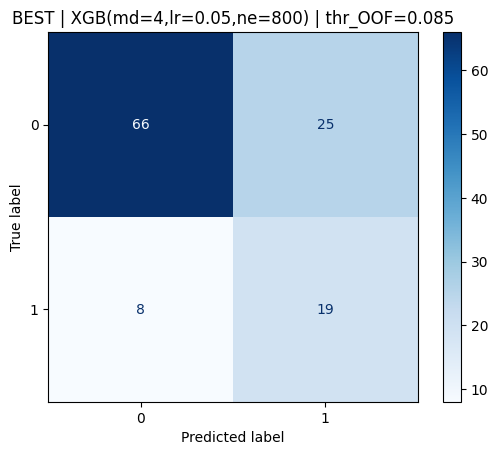

              precision    recall  f1-score   support

           0     0.8919    0.7253    0.8000        91
           1     0.4318    0.7037    0.5352        27

    accuracy                         0.7203       118
   macro avg     0.6619    0.7145    0.6676       118
weighted avg     0.7866    0.7203    0.7394       118

(pos_label=1)  Acc=0.7203 | Prec=0.4318 | Rec=0.7037 | F1=0.5352


In [13]:
# ============================================================
# EXPERIMENTOS: RF variantes + Boosting desbalance + Stacking
# Evaluación: OOF → umbral global (max F1 de clase 1) → TEST
# ============================================================
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

# XGBoost (requerido)
from xgboost import XGBClassifier

# LightGBM (opcional; si no está, se salta)
try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

# ================== CONFIG ==================
TARGET_CLASS = 1
SEED = 42
K_FOLDS = 5

# ============== HELPERS MÉTRICAS ==============
def best_thr_maximize_f1(y_true, p1, target_class=1):
    y_bin = (y_true == target_class).astype(int)
    s = p1 if target_class==1 else (1.0 - p1)
    prec, rec, thr = precision_recall_curve(y_bin, s)
    f1 = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
    k = f1.argmax()
    return float(thr[k]), float(f1[k]), (float(prec[k]), float(rec[k]))

def predict_with_threshold_for_class(p1, thr, target_class=1):
    s = p1 if target_class==1 else (1.0 - p1)
    yhat_t = (s >= thr).astype(int)
    return np.where(yhat_t==1, target_class, 1-target_class)

def report_all(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues", values_format="d")
    plt.title(title); plt.show()
    print(classification_report(y_true, y_pred, digits=4))
    print("(pos_label=1)  Acc={:.4f} | Prec={:.4f} | Rec={:.4f} | F1={:.4f}".format(
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        f1_score(y_true, y_pred, pos_label=1, zero_division=0),
    ))

def oof_probas(estimator_maker, X, y, k_folds=5, seed=42):
    """OOF manual (sin fugas) para cualquier estimador con predict_proba/decision_function."""
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
    p1_oof = np.zeros(len(y), dtype=float)
    for tr_idx, va_idx in skf.split(X, y):
        Xtr, Xva = X[tr_idx], X[va_idx]
        ytr      = y[tr_idx]
        est = estimator_maker()
        est.fit(Xtr, ytr)
        if hasattr(est, "predict_proba"):
            p1 = est.predict_proba(Xva)[:,1]
        elif hasattr(est, "decision_function"):
            s  = est.decision_function(Xva)
            p1 = (s - s.min())/(s.max()-s.min()+1e-12)
        else:
            p1 = (est.predict(Xva)==1).astype(float)
        p1_oof[va_idx] = p1
    return p1_oof

def eval_combo(name, estimator_maker, X_tr, y_tr, X_te, y_te):
    """OOF → umbral global (max F1_1) → reentrena → TEST."""
    p1_oof = oof_probas(estimator_maker, X_tr, y_tr, k_folds=K_FOLDS, seed=SEED)
    thr, f1oof, (precoof, recoof) = best_thr_maximize_f1(y_tr, p1_oof, target_class=TARGET_CLASS)
    est = estimator_maker().fit(X_tr, y_tr)
    if hasattr(est, "predict_proba"):
        p1_test = est.predict_proba(X_te)[:,1]
    elif hasattr(est, "decision_function"):
        s  = est.decision_function(X_te)
        p1_test = (s - s.min())/(s.max()-s.min()+1e-12)
    else:
        p1_test = (est.predict(X_te)==1).astype(float)
    yhat = predict_with_threshold_for_class(p1_test, thr, target_class=TARGET_CLASS)
    acc  = accuracy_score(y_te, yhat)
    prec = precision_score(y_te, yhat, pos_label=1, zero_division=0)
    rec  = recall_score(y_te, yhat, pos_label=1, zero_division=0)
    f1   = f1_score(y_te, yhat, pos_label=1, zero_division=0)
    return dict(
        name=name, thr_oof=thr, F1_1_OOF=f1oof, Prec_1_OOF=precoof, Rec_1_OOF=recoof,
        acc_test=acc, prec1_test=prec, recall1_test=rec, f1_1_test=f1
    )

# ================== DATOS / EMBEDDINGS ==================
assert TARGET in df.columns and TEXT in df.columns, "Revisa nombres de columnas."
data = df[[TEXT, TARGET]].dropna().copy()
data[TEXT] = data[TEXT].map(clean)
data[TARGET] = data[TARGET].astype(int)

if 'X_tr' not in globals() or 'X_te' not in globals() or 'y_tr' not in globals() or 'y_te' not in globals():
    train, test = train_test_split(data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET])
    y_tr = train[TARGET].values
    y_te = test[TARGET].values
    print("Distribución train:", dict(pd.Series(y_tr).value_counts().sort_index()))
    print("Distribución test :", dict(pd.Series(y_te).value_counts().sort_index()))
    # Usa tu helper de embeddings robusto:
    X_tr = np.vstack([embed_ultrasafe(t) for t in train[TEXT]])
    X_te = np.vstack([embed_ultrasafe(t) for t in test[TEXT]])

# ================== 1) VARIANTES RF ==================
def make_extratrees_balanced(n_estimators=500, max_depth=None, min_samples_leaf=2, max_features="sqrt"):
    return ExtraTreesClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
    )

def make_brf(n_estimators=800, max_depth=None, min_samples_leaf=2, max_features="sqrt"):
    return BalancedRandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
        max_features=max_features, sampling_strategy="auto",
        random_state=SEED, n_jobs=-1
    )

rf_variants = [
    ("ExtraTrees(balanced_subsample)", lambda: make_extratrees_balanced()),
    ("BalancedRandomForest(min_leaf=2,800)", lambda: make_brf()),
]

# ================== 2) BOOSTING DESBALANCE ==================
# XGBoost con scale_pos_weight ~ n_neg/n_pos
neg, pos = (y_tr==0).sum(), (y_tr==1).sum()
SPW = max(1.0, neg / max(1,pos))

def make_xgb(max_depth=4, lr=0.05, n_estimators=800, min_child_weight=1.0, subsample=0.8, colsample=0.8):
    return XGBClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=lr, subsample=subsample, colsample_bytree=colsample,
        min_child_weight=min_child_weight, gamma=0.0, reg_lambda=1.0,
        scale_pos_weight=SPW, eval_metric='logloss',
        tree_method='hist', n_jobs=-1, random_state=SEED
    )

xgb_grid = [
    ("XGB(md=3,lr=0.05,ne=800)", lambda: make_xgb(max_depth=3, lr=0.05, n_estimators=800)),
    ("XGB(md=4,lr=0.05,ne=800)", lambda: make_xgb(max_depth=4, lr=0.05, n_estimators=800)),
    ("XGB(md=4,lr=0.03,ne=1200)", lambda: make_xgb(max_depth=4, lr=0.03, n_estimators=1200)),
    ("XGB(md=5,lr=0.05,ne=800,mcw=2)", lambda: make_xgb(max_depth=5, lr=0.05, n_estimators=800, min_child_weight=2.0)),
]


# LightGBM (si está instalado)
def make_lgbm(num_leaves=31, max_depth=-1, lr=0.05, n_estimators=800, subsample=0.8, colsample=0.8):
    return LGBMClassifier(
        objective="binary",
        is_unbalance=True,          # maneja desbalance
        learning_rate=lr,
        n_estimators=n_estimators,
        num_leaves=num_leaves,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample,
        min_data_in_leaf=5,         # opcional: evita hojas diminutas
        verbose=-1,                 # << silencia logs
        # alternativamente: verbosity=-1,
        n_jobs=-1,
        random_state=SEED
    )


lgbm_grid = []
if HAS_LGBM:
    lgbm_grid = [
        ("LGBM(unbalance,ne=800)", lambda: make_lgbm()),
        ("LGBM(unbalance,ne=1200,lr=0.03)", lambda: make_lgbm(n_estimators=1200, lr=0.03)),
        ("LGBM(unbalance,num_leaves=63)", lambda: make_lgbm(num_leaves=63)),
    ]
else:
    print("LightGBM no está instalado; se omiten sus pruebas.")

# RUSBoost (submuestreo aleatorio de la mayoritaria + AdaBoost)
def make_rusboost(n_estimators=600, learning_rate=0.1, max_depth=3):
    from sklearn.tree import DecisionTreeClassifier
    base = DecisionTreeClassifier(max_depth=max_depth, random_state=SEED)
    return RUSBoostClassifier(
        estimator=base,            # << antes: base_estimator=...
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=SEED
    )

boost_variants = [
    *xgb_grid,
    *lgbm_grid,
    ("RUSBoost(ne=600,lr=0.1,md=3)", lambda: make_rusboost()),
]

# ================== 3) META-ENSEMBLE (RF ganador + LogReg) ==================
def make_stacking_rf_logreg():
    rf_best = RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_leaf=2, max_features="sqrt",
        class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
    )
    lr_meta = LogisticRegression(
        max_iter=5000, solver="liblinear", class_weight="balanced", random_state=SEED
    )
    base_lr = LogisticRegression(max_iter=5000, solver="liblinear", class_weight="balanced", random_state=SEED)
    return StackingClassifier(
        estimators=[("rf", rf_best), ("lr", base_lr)],
        final_estimator=lr_meta,
        passthrough=False, stack_method="predict_proba", n_jobs=-1
    )

# ================== LANZAR EXPERIMENTOS ==================
resultados = []

# 1) Variantes RF
for name, maker in rf_variants:
    resultados.append(eval_combo(name, maker, X_tr, y_tr, X_te, y_te))

# 2) Boosting
for name, maker in boost_variants:
    resultados.append(eval_combo(name, maker, X_tr, y_tr, X_te, y_te))

# 3) Stacking RF + LogReg
resultados.append(eval_combo("Stacking(RFbest+LogReg)", make_stacking_rf_logreg, X_tr, y_tr, X_te, y_te))

df_res = pd.DataFrame(resultados).sort_values(
    ["f1_1_test","recall1_test","prec1_test"], ascending=[False, False, False]
).reset_index(drop=True)

print("\n=== Ranking por TEST (F1_1, luego Recall_1, luego Prec_1) ===")
display(df_res.head(20))

top = df_res.iloc[0]
print(f"\nMejor combinación:\n- name: {top['name']}\n- thr_OOF: {top['thr_oof']:.3f}\n- TEST: F1_1={top['f1_1_test']:.3f} | Rec_1={top['recall1_test']:.3f} | Prec_1={top['prec1_test']:.3f}")

# Matriz del mejor
# Reconstrucción rápida del estimador por nombre (para mostrar matriz):
def remake(name):
    if name.startswith("ExtraTrees"):
        return make_extratrees_balanced()
    if name.startswith("BalancedRandomForest"):
        return make_brf()
    if name.startswith("XGB("):
        # elegir maker correspondiente (simplemente busco por nombre exacto)
        for nm, mk in xgb_grid:
            if nm == name: return mk()
    if name.startswith("LGBM(") and HAS_LGBM:
        for nm, mk in lgbm_grid:
            if nm == name: return mk()
    if name.startswith("RUSBoost"):
        return make_rusboost()
    if name.startswith("Stacking("):
        return make_stacking_rf_logreg()
    # fallback al RF ganador conocido
    return RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_leaf=2, max_features="sqrt",
        class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
    )

best_est = remake(top["name"]).fit(X_tr, y_tr)
if hasattr(best_est, "predict_proba"):
    p1_test = best_est.predict_proba(X_te)[:,1]
elif hasattr(best_est, "decision_function"):
    s = best_est.decision_function(X_te)
    p1_test = (s - s.min())/(s.max()-s.min()+1e-12)
else:
    p1_test = (best_est.predict(X_te)==1).astype(float)

yhat_best = predict_with_threshold_for_class(p1_test, float(top["thr_oof"]), target_class=TARGET_CLASS)
report_all(y_te, yhat_best, title=f"BEST | {top['name']} | thr_OOF={top['thr_oof']:.3f}")

# ============================================================
# (OPCIONAL) RF ganador + agregación top-k en CHUNKS por llamada
# — Usa chunking y topk_mean para decisión por llamada completa —
# ============================================================
RUN_CHUNK_TOPK = False  # pon True si quieres ejecutarlo ahora

if RUN_CHUNK_TOPK:
    from sentence_transformers import SentenceTransformer
    from transformers import AutoTokenizer

    EMB_MODEL = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
    CHUNK_TOKENS, CHUNK_STRIDE = 480, 64

    # Crea embedder/tok una vez
    if 'embedder' not in globals():
        embedder = SentenceTransformer(EMB_MODEL); embedder.max_seq_length = 510
    if 'tok' not in globals():
        tok = AutoTokenizer.from_pretrained(EMB_MODEL)

    def chunk_texts_ultrasafe(text, max_len=CHUNK_TOKENS, stride=CHUNK_STRIDE):
        enc = tok(text, add_special_tokens=False, truncation=False); ids = enc.get("input_ids", [])
        if len(ids)==0: return []
        if isinstance(ids[0], list): ids = ids[0]
        chunks, i = [], 0
        while i < len(ids):
            j = min(i + max_len, len(ids))
            piece = tok.decode(ids[i:j], skip_special_tokens=True, clean_up_tokenization_spaces=True)
            t2 = tok(piece, add_special_tokens=True, truncation=True, max_length=510)
            safe_txt = tok.decode(t2["input_ids"], skip_special_tokens=True, clean_up_tokenization_spaces=True)
            if safe_txt.strip(): chunks.append(safe_txt)
            if j == len(ids): break
            i = max(j - stride, 0)
        return chunks

    def embed_texts(list_txt):
        if len(list_txt)==0:
            dim = embedder.get_sentence_embedding_dimension()
            return np.zeros((0, dim), dtype=np.float32)
        E = embedder.encode(list_txt, normalize_embeddings=True, batch_size=64, show_progress_bar=False)
        return E

    def aggregate_topk_mean(df_pred_chunks, k=5):
        g = df_pred_chunks.groupby("call_id")["p_chunk"]
        def topk_mean(s):
            kk = min(k, len(s))
            return np.mean(np.sort(s.values)[-kk:])
        return g.apply(topk_mean)

    # Split por llamada
    train_df, test_df = train_test_split(data, test_size=TEST_SIZE, random_state=SEED, stratify=data[TARGET])
    y_tr_call = train_df[TARGET].values
    y_te_call = test_df[TARGET].values

    # Construye CHUNKS
    def build_chunk_table(split_df, start_call_id=0):
        rows, embs = [], []
        for i,(txt,y) in enumerate(zip(split_df[TEXT], split_df[TARGET])):
            call_id = start_call_id + i
            chunks = chunk_texts_ultrasafe(txt)
            if not chunks: chunks = [""]
            E = embed_texts(chunks); embs.append(E)
            for j in range(E.shape[0]):
                rows.append((call_id, j, int(y)))
        X = np.vstack(embs) if len(embs)>0 else np.zeros((0, embedder.get_sentence_embedding_dimension()), dtype=np.float32)
        dfc = pd.DataFrame(rows, columns=["call_id","chunk_idx","y_call"]); dfc["p_chunk"]=np.nan
        return X, dfc

    X_tr_chunks, df_tr_chunks = build_chunk_table(train_df, start_call_id=0)
    X_te_chunks, df_te_chunks = build_chunk_table(test_df, start_call_id=len(train_df))

    # OOF por llamada (CV) → probas por chunk → agregación topk → umbral F1
    skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED)
    chunk_idx_by_call = df_tr_chunks.groupby("call_id").indices
    p_chunk_oof = np.full(len(df_tr_chunks), np.nan)

    def rf_best_chunk():
        return RandomForestClassifier(
            n_estimators=400, max_depth=None, min_samples_leaf=2, max_features="sqrt",
            class_weight="balanced_subsample", n_jobs=-1, random_state=SEED
        )

    call_ids = train_df.reset_index(drop=True).index.values
    call_y   = train_df[TARGET].values

    for tr_c, va_c in skf.split(call_ids, call_y):
        tr_calls, va_calls = set(call_ids[tr_c]), set(call_ids[va_c])
        tr_idx = np.concatenate([chunk_idx_by_call[c] for c in tr_calls]) if tr_calls else np.array([], dtype=int)
        va_idx = np.concatenate([chunk_idx_by_call[c] for c in va_calls]) if va_calls else np.array([], dtype=int)
        clf = rf_best_chunk().fit(X_tr_chunks[tr_idx], df_tr_chunks.loc[tr_idx,"y_call"].values)
        p_chunk_oof[va_idx] = clf.predict_proba(X_tr_chunks[va_idx])[:,1]

    assert np.isfinite(p_chunk_oof).all()
    df_tr_chunks_oof = df_tr_chunks.copy(); df_tr_chunks_oof["p_chunk"] = p_chunk_oof

    # top-k mean (k=5 por defecto)
    p_call_tr = aggregate_topk_mean(df_tr_chunks_oof, k=5).reindex(range(len(train_df))).fillna(0.0).values
    thr_ok, f1_oof, _ = best_thr_maximize_f1(y_tr_call, p_call_tr, target_class=1)
    print(f"TOPK OOF (k=5): thr={thr_ok:.3f} | F1_1_OOF={f1_oof:.3f}")

    # Entrena en todos los chunks y evalúa en test
    clf_final = rf_best_chunk().fit(X_tr_chunks, df_tr_chunks["y_call"].values)
    df_te_chunks_pred = df_te_chunks.copy()
    df_te_chunks_pred["p_chunk"] = clf_final.predict_proba(X_te_chunks)[:,1]
    df_te_chunks_pred["call_id"] = df_te_chunks_pred["call_id"] - len(train_df)

    p_call_te = aggregate_topk_mean(df_te_chunks_pred, k=5).reindex(range(len(test_df))).fillna(0.0).values
    yhat_te = (p_call_te >= thr_ok).astype(int)
    report_all(y_te_call, yhat_te, title=f"RFbest + topk_mean(k=5) | thr={thr_ok:.3f}")
